In [1]:
import numpy as np
import pandas as pd
import tensorflow
from tensorflow import keras
from matplotlib import pyplot
import random as rd

In [2]:
from keras.datasets.mnist import load_data

(trainX,trainY),(testX,testY) = load_data()

print('Train',trainX.shape, trainY.shape)
print ('Test',testX.shape,testY.shape)

Train (60000, 28, 28) (60000,)
Test (10000, 28, 28) (10000,)


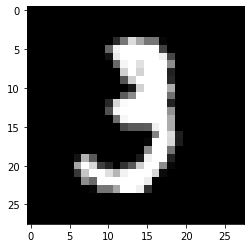

In [3]:
i =10
pyplot.imshow(trainX[i], cmap='gray')

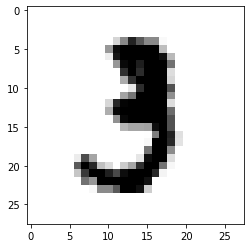

In [4]:
pyplot.imshow(trainX[i], cmap='gray_r')

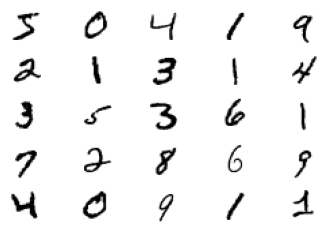

In [5]:
for i in range(25):
    pyplot.subplot(5,5,1+i)
    pyplot.axis('off')
    pyplot.imshow(trainX[i], cmap='gray_r')
pyplot.show()

In [6]:
from keras.models import Sequential
from keras.optimizers import Adam
from keras.layers import Dense
from keras.layers import Conv2D
from keras.layers import Flatten
from keras.layers import Dropout
from keras.layers import LeakyReLU
from keras.utils.vis_utils import plot_model

In [7]:
def define_discriminator(in_shape=(1,28,28)):
    model = Sequential()
    model.add(Conv2D(64,(3,3), strides = (2,2), padding='same', input_shape=in_shape))
    model.add(LeakyReLU(alpha=0.2))
    model.add(Dropout(0.4))
    model.add(Conv2D(64,(3,3),strides=(2,2),padding='same'))
    model.add(LeakyReLU(alpha=0.2))
    model.add(Dropout(0.4))
    model.add(Flatten())
    model.add(Dense(1,activation='sigmoid'))
    
    opt = Adam(lr=0.0002,beta_1=0.5)
    model.compile(loss='binary_crossentropy', optimizer=opt, metrics=['accuracy'])
    return model

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 1, 14, 64)         16192     
                                                                 
 leaky_re_lu (LeakyReLU)     (None, 1, 14, 64)         0         
                                                                 
 dropout (Dropout)           (None, 1, 14, 64)         0         
                                                                 
 conv2d_1 (Conv2D)           (None, 1, 7, 64)          36928     
                                                                 
 leaky_re_lu_1 (LeakyReLU)   (None, 1, 7, 64)          0         
                                                                 
 dropout_1 (Dropout)         (None, 1, 7, 64)          0         
                                                                 
 flatten (Flatten)           (None, 448)               0

D:\Anaconda3\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:110: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


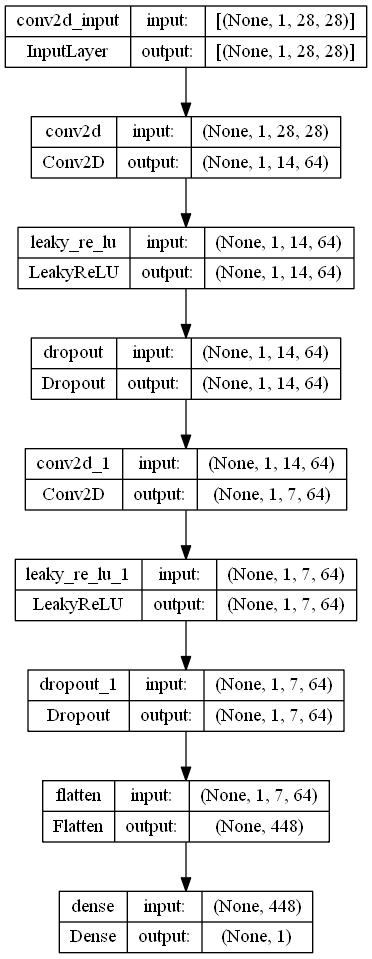

In [8]:
model = define_discriminator()
model.summary()
plot_model(model,to_file='discriminator_plot.png', show_shapes=True,show_layer_names=True)

In [9]:
(trainX,_),(_,_) = load_data()

In [10]:
X = np.expand_dims(trainX,axis=1)

In [11]:
X=X.astype('float32')
X=X/255.0

In [12]:
X

array([[[[0., 0., 0., ..., 0., 0., 0.],
         [0., 0., 0., ..., 0., 0., 0.],
         [0., 0., 0., ..., 0., 0., 0.],
         ...,
         [0., 0., 0., ..., 0., 0., 0.],
         [0., 0., 0., ..., 0., 0., 0.],
         [0., 0., 0., ..., 0., 0., 0.]]],


       [[[0., 0., 0., ..., 0., 0., 0.],
         [0., 0., 0., ..., 0., 0., 0.],
         [0., 0., 0., ..., 0., 0., 0.],
         ...,
         [0., 0., 0., ..., 0., 0., 0.],
         [0., 0., 0., ..., 0., 0., 0.],
         [0., 0., 0., ..., 0., 0., 0.]]],


       [[[0., 0., 0., ..., 0., 0., 0.],
         [0., 0., 0., ..., 0., 0., 0.],
         [0., 0., 0., ..., 0., 0., 0.],
         ...,
         [0., 0., 0., ..., 0., 0., 0.],
         [0., 0., 0., ..., 0., 0., 0.],
         [0., 0., 0., ..., 0., 0., 0.]]],


       ...,


       [[[0., 0., 0., ..., 0., 0., 0.],
         [0., 0., 0., ..., 0., 0., 0.],
         [0., 0., 0., ..., 0., 0., 0.],
         ...,
         [0., 0., 0., ..., 0., 0., 0.],
         [0., 0., 0., ..., 0., 0., 0.]

In [13]:
def load_real_samples():
    (trainX,_),(_,_) = load_data()
    X = np.expand_dims(trainX,axis=1)
    X=X.astype('float32')
    X=X/255.0
    return X

In [14]:
def generate_real_samples(dataset,n_samples):
    ix=[rd.randint(0,dataset.shape[0]-1) for i in range(n_samples)]
    X=dataset[ix]
    y=np.ones((n_samples,1))
    return X,y

In [15]:
def generate_fake_samples(n_samples):
    X= [rd.randint(0,1) for i in range(28*28*n_samples)]
    X=np.reshape(X,(n_samples,1, 28,28))
    y=np.zeros((n_samples,1))
    return X,y

In [16]:
def train_discriminator(model,dataset,n_iter=100,n_batch=256):
    half_batch = int(n_batch/2)
    for i in range(n_iter):
        X_real,y_real = generate_real_samples(dataset,half_batch)
        _,real_acc=model.train_on_batch(X_real,y_real)
        X_fake, y_fake = generate_fake_samples(half_batch)
        _,fake_acc=model.train_on_batch(X_fake,y_fake)
        print('>%d real = %.0f%% fake = %.0f%%' % (i+1, real_acc*100,fake_acc*100))

In [17]:
model = define_discriminator()

In [18]:
dataset = load_real_samples()

In [19]:
train_discriminator(model,dataset)

>1 real = 70% fake = 10%
>2 real = 63% fake = 12%
>3 real = 70% fake = 27%
>4 real = 74% fake = 30%
>5 real = 62% fake = 38%
>6 real = 69% fake = 39%
>7 real = 66% fake = 64%
>8 real = 68% fake = 66%
>9 real = 64% fake = 69%
>10 real = 59% fake = 83%
>11 real = 62% fake = 77%
>12 real = 65% fake = 89%
>13 real = 68% fake = 90%
>14 real = 66% fake = 96%
>15 real = 66% fake = 95%
>16 real = 64% fake = 98%
>17 real = 56% fake = 99%
>18 real = 55% fake = 99%
>19 real = 60% fake = 99%
>20 real = 59% fake = 100%
>21 real = 61% fake = 100%
>22 real = 55% fake = 100%
>23 real = 63% fake = 100%
>24 real = 65% fake = 100%
>25 real = 63% fake = 100%
>26 real = 54% fake = 100%
>27 real = 65% fake = 100%
>28 real = 64% fake = 100%
>29 real = 70% fake = 100%
>30 real = 67% fake = 100%
>31 real = 67% fake = 100%
>32 real = 65% fake = 100%
>33 real = 67% fake = 100%
>34 real = 73% fake = 100%
>35 real = 73% fake = 100%
>36 real = 84% fake = 100%
>37 real = 80% fake = 100%
>38 real = 86% fake = 100%
>3

In [20]:
dataset.shape[0]

60000

In [2]:
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import Reshape
from keras.layers import Conv2D
from keras.layers import Conv2DTranspose
from keras.layers import LeakyReLU
from keras.utils.vis_utils import plot_model

ModuleNotFoundError: No module named 'tensorflow.compat'

In [22]:
def define_generator(latent_dim):
    model = Sequential()
    n_nodes=128*7*7
    model.add(Dense(n_nodes,input_dim=latent_dim))
    model.add(LeakyReLU(alpha=0.2))
    model.add(Reshape((7,7,128)))
    #upsample to 14x14
    model.add(Conv2DTranspose(128,(4,4),strides=(2,2),padding='same'))
    model.add(LeakyReLU(alpha=0.2))
    #upsample to 28x28
    model.add(Conv2DTranspose(128,(4,4),strides=(2,2),padding='same'))
    model.add(LeakyReLU(alpha=0.2))
    model.add(Conv2D(1,(7,7),activation='sigmoid',padding='same'))
    return model

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_2 (Dense)             (None, 6272)              633472    
                                                                 
 leaky_re_lu_4 (LeakyReLU)   (None, 6272)              0         
                                                                 
 reshape (Reshape)           (None, 7, 7, 128)         0         
                                                                 
 conv2d_transpose (Conv2DTra  (None, 14, 14, 128)      262272    
 nspose)                                                         
                                                                 
 leaky_re_lu_5 (LeakyReLU)   (None, 14, 14, 128)       0         
                                                                 
 conv2d_transpose_1 (Conv2DT  (None, 28, 28, 128)      262272    
 ranspose)                                            

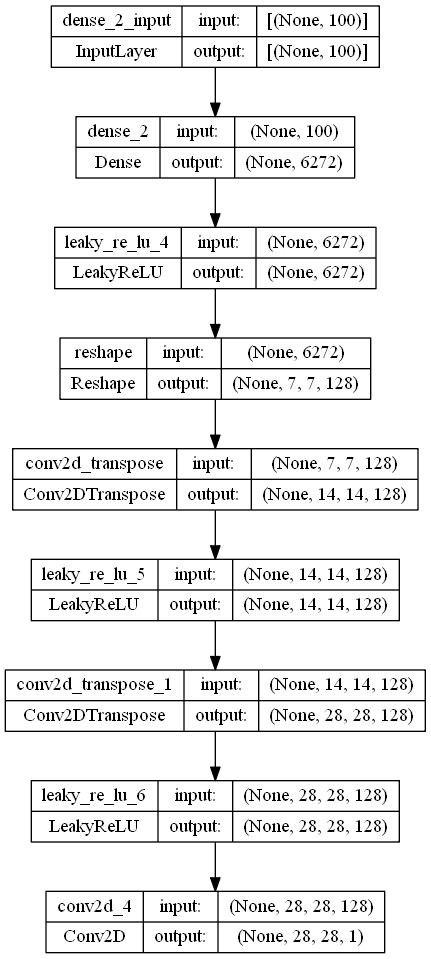

In [23]:
latent_dim =100
model = define_generator(latent_dim)
model.summary()
plot_model(model, to_file='generator_plot.png',show_shapes=True,show_layer_names=True)

In [24]:
def generate_latent_points(latent_dim, n_samples):
    x_input = np.random.randn(latent_dim*n_samples)
    x_input = x_input.reshape(n_samples,latent_dim)
    return x_input

In [25]:
def generate_fake_samples(g_model, latent_dim, n_samples):
    x_input = generate_latent_points(latent_dim, n_samples)
    X = g_model.predict(x_input)
    y = np.zeros((n_samples, 1))
    return X, y

In [26]:
latent_dim=100
model = define_generator(latent_dim)
n_samples=25
X,_ = generate_fake_samples(model,latent_dim,n_samples)

1/1 [==============================] - 0s 93ms/step


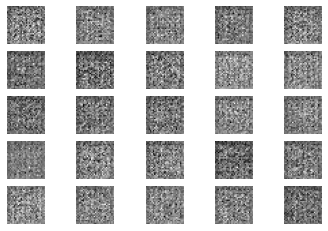

In [27]:
for i in range (n_samples):
    pyplot.subplot(5,5,1+i)
    pyplot.axis('off')
    pyplot.imshow(X[i,:,:,0], cmap='gray_r')
pyplot.show()

In [28]:
def define_gan(g_model,d_model):
    d_model.trainable=False
    model = Sequential()
    model.add(g_model)
    model.add(d_model)
    opt = Adam(lr=0.0002, beta_1=0.5)
    model.compile(loss='binary_crossentropy',optimizer=opt)
    return model

In [1]:
# define the standalone discriminator model
def define_discriminator1(in_shape=(28,28,1)):
	model = Sequential()
	model.add(Conv2D(64, (3,3), strides=(2, 2), padding='same', input_shape=in_shape))
	model.add(LeakyReLU(alpha=0.2))
	model.add(Dropout(0.4))
	model.add(Conv2D(64, (3,3), strides=(2, 2), padding='same'))
	model.add(LeakyReLU(alpha=0.2))
	model.add(Dropout(0.4))
	model.add(Flatten())
	model.add(Dense(1, activation='sigmoid'))
	# compile model
	opt = Adam(lr=0.0002, beta_1=0.5)
	model.compile(loss='binary_crossentropy', optimizer=opt, metrics=['accuracy'])
	return model
 
# define the standalone generator model
def define_generator1(latent_dim):
	model = Sequential()
	# foundation for 7x7 image
	n_nodes = 128 * 7 * 7
	model.add(Dense(n_nodes, input_dim=latent_dim))
	model.add(LeakyReLU(alpha=0.2))
	model.add(Reshape((7, 7, 128)))
	# upsample to 14x14
	model.add(Conv2DTranspose(128, (4,4), strides=(2,2), padding='same'))
	model.add(LeakyReLU(alpha=0.2))
	# upsample to 28x28
	model.add(Conv2DTranspose(128, (4,4), strides=(2,2), padding='same'))
	model.add(LeakyReLU(alpha=0.2))
	model.add(Conv2D(1, (7,7), activation='sigmoid', padding='same'))
	return model

In [2]:
latent_dim =100
d_model = define_discriminator1()
g_model = define_generator1(latent_dim)
gan_model = define_gan(g_model,d_model)
gan_model.summary()
plot_model(gan_model,to_file='gan_plot.png',show_shapes=True,show_layer_names=True)

NameError: name 'Sequential' is not defined

In [43]:
# train the generator and discriminator
def train(g_model, d_model, gan_model, dataset, latent_dim, n_epochs=100, n_batch=256):
    bat_per_epo = int(dataset.shape[0] / n_batch)
    half_batch = int(n_batch / 2)
    # manually enumerate epochs
    for i in range(n_epochs):
        # enumerate batches over the training set
        for j in range(bat_per_epo):
            # get randomly selected 'real' samples
            X_real, y_real = generate_real_samples(dataset, half_batch)
            # generate 'fake' examples
            X_fake, y_fake = generate_fake_samples(g_model, latent_dim, half_batch)
            # create training set for the discriminator
            X, y = np.vstack((X_real, X_fake)), np.vstack((y_real, y_fake))
            # update discriminator model weights
            d_loss, _ = d_model.train_on_batch(X, y)
            # prepare points in latent space as input for the generator
            X_gan = generate_latent_points(latent_dim, n_batch)
            # create inverted labels for the fake samples
            y_gan = ones((n_batch, 1))
            # update the generator via the discriminator's error
            g_loss = gan_model.train_on_batch(X_gan, y_gan)
            # summarize loss on this batch
            print('>%d, %d/%d, d=%.3f, g=%.3f' % (i+1, j+1, bat_per_epo, d_loss, g_loss))
    if (i+1) % 10 == 0:
        summarize_performance(i, g_model, d_model, dataset, latent_dim)

In [38]:
# evaluate the discriminator, plot generated images, save generator model
def summarize_performance(epoch, g_model, d_model, dataset, latent_dim, n_samples=100):
	# prepare real samples
	X_real, y_real = generate_real_samples(dataset, n_samples)
	# evaluate discriminator on real examples
	_, acc_real = d_model.evaluate(X_real, y_real, verbose=0)
	# prepare fake examples
	x_fake, y_fake = generate_fake_samples(g_model, latent_dim, n_samples)
	# evaluate discriminator on fake examples
	_, acc_fake = d_model.evaluate(x_fake, y_fake, verbose=0)
	# summarize discriminator performance
	print('>Accuracy real: %.0f%%, fake: %.0f%%' % (acc_real*100, acc_fake*100))
	# save plot
	save_plot(x_fake, epoch)
	# save the generator model tile file
	filename = 'generator_model_%03d.h5' % (epoch + 1)
	g_model.save(filename)

In [3]:
from numpy import expand_dims
from numpy import zeros
from numpy import ones
from numpy import vstack
from numpy.random import randn
from numpy.random import randint
from keras.datasets.mnist import load_data
from keras.optimizers import Adam
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import Reshape
from keras.layers import Flatten
from keras.layers import Conv2D
from keras.layers import Conv2DTranspose
from keras.layers import LeakyReLU
from keras.layers import Dropout
from matplotlib import pyplot
 
# define the standalone discriminator model
def define_discriminator(in_shape=(28,28,1)):
	model = Sequential()
	model.add(Conv2D(64, (3,3), strides=(2, 2), padding='same', input_shape=in_shape))
	model.add(LeakyReLU(alpha=0.2))
	model.add(Dropout(0.4))
	model.add(Conv2D(64, (3,3), strides=(2, 2), padding='same'))
	model.add(LeakyReLU(alpha=0.2))
	model.add(Dropout(0.4))
	model.add(Flatten())
	model.add(Dense(1, activation='sigmoid'))
	# compile model
	opt = Adam(lr=0.0002, beta_1=0.5)
	model.compile(loss='binary_crossentropy', optimizer=opt, metrics=['accuracy'])
	return model
 
# define the standalone generator model
def define_generator(latent_dim):
	model = Sequential()
	# foundation for 7x7 image
	n_nodes = 128 * 7 * 7
	model.add(Dense(n_nodes, input_dim=latent_dim))
	model.add(LeakyReLU(alpha=0.2))
	model.add(Reshape((7, 7, 128)))
	# upsample to 14x14
	model.add(Conv2DTranspose(128, (4,4), strides=(2,2), padding='same'))
	model.add(LeakyReLU(alpha=0.2))
	# upsample to 28x28
	model.add(Conv2DTranspose(128, (4,4), strides=(2,2), padding='same'))
	model.add(LeakyReLU(alpha=0.2))
	model.add(Conv2D(1, (7,7), activation='sigmoid', padding='same'))
	return model
 
# define the combined generator and discriminator model, for updating the generator
def define_gan(g_model, d_model):
	# make weights in the discriminator not trainable
	d_model.trainable = False
	# connect them
	model = Sequential()
	# add generator
	model.add(g_model)
	# add the discriminator
	model.add(d_model)
	# compile model
	opt = Adam(lr=0.0002, beta_1=0.5)
	model.compile(loss='binary_crossentropy', optimizer=opt)
	return model
 
# load and prepare mnist training images
def load_real_samples():
	# load mnist dataset
	(trainX, _), (_, _) = load_data()
	# expand to 3d, e.g. add channels dimension
	X = expand_dims(trainX, axis=-1)
	# convert from unsigned ints to floats
	X = X.astype('float32')
	# scale from [0,255] to [0,1]
	X = X / 255.0
	return X
 
# select real samples
def generate_real_samples(dataset, n_samples):
	# choose random instances
	ix = randint(0, dataset.shape[0], n_samples)
	# retrieve selected images
	X = dataset[ix]
	# generate 'real' class labels (1)
	y = ones((n_samples, 1))
	return X, y
 
# generate points in latent space as input for the generator
def generate_latent_points(latent_dim, n_samples):
	# generate points in the latent space
	x_input = randn(latent_dim * n_samples)
	# reshape into a batch of inputs for the network
	x_input = x_input.reshape(n_samples, latent_dim)
	return x_input
 
# use the generator to generate n fake examples, with class labels
def generate_fake_samples(g_model, latent_dim, n_samples):
	# generate points in latent space
	x_input = generate_latent_points(latent_dim, n_samples)
	# predict outputs
	X = g_model.predict(x_input)
	# create 'fake' class labels (0)
	y = zeros((n_samples, 1))
	return X, y
 
# create and save a plot of generated images (reversed grayscale)
def save_plot(examples, epoch, n=10):
	# plot images
	for i in range(n * n):
		# define subplot
		pyplot.subplot(n, n, 1 + i)
		# turn off axis
		pyplot.axis('off')
		# plot raw pixel data
		pyplot.imshow(examples[i, :, :, 0], cmap='gray_r')
	# save plot to file
	filename = 'generated_plot_e%03d.png' % (epoch+1)
	pyplot.savefig(filename)
	pyplot.close()
 
# evaluate the discriminator, plot generated images, save generator model
def summarize_performance(epoch, g_model, d_model, dataset, latent_dim, n_samples=100):
	# prepare real samples
	X_real, y_real = generate_real_samples(dataset, n_samples)
	# evaluate discriminator on real examples
	_, acc_real = d_model.evaluate(X_real, y_real, verbose=0)
	# prepare fake examples
	x_fake, y_fake = generate_fake_samples(g_model, latent_dim, n_samples)
	# evaluate discriminator on fake examples
	_, acc_fake = d_model.evaluate(x_fake, y_fake, verbose=0)
	# summarize discriminator performance
	print('>Accuracy real: %.0f%%, fake: %.0f%%' % (acc_real*100, acc_fake*100))
	# save plot
	save_plot(x_fake, epoch)
	# save the generator model tile file
	filename = 'generator_model_%03d.h5' % (epoch + 1)
	g_model.save(filename)
 
# train the generator and discriminator
def train(g_model, d_model, gan_model, dataset, latent_dim, n_epochs=70, n_batch=256):
	bat_per_epo = int(dataset.shape[0] / n_batch)
	half_batch = int(n_batch / 2)
	# manually enumerate epochs
	for i in range(n_epochs):
		# enumerate batches over the training set
		for j in range(bat_per_epo):
			# get randomly selected 'real' samples
			X_real, y_real = generate_real_samples(dataset, half_batch)
			# generate 'fake' examples
			X_fake, y_fake = generate_fake_samples(g_model, latent_dim, half_batch)
			# create training set for the discriminator
			X, y = vstack((X_real, X_fake)), vstack((y_real, y_fake))
			# update discriminator model weights
			d_loss, _ = d_model.train_on_batch(X, y)
			# prepare points in latent space as input for the generator
			X_gan = generate_latent_points(latent_dim, n_batch)
			# create inverted labels for the fake samples
			y_gan = ones((n_batch, 1))
			# update the generator via the discriminator's error
			g_loss = gan_model.train_on_batch(X_gan, y_gan)
			# summarize loss on this batch
			print('>%d, %d/%d, d=%.3f, g=%.3f' % (i+1, j+1, bat_per_epo, d_loss, g_loss))
		# evaluate the model performance, sometimes
		if (i+1) % 10 == 0:
			summarize_performance(i, g_model, d_model, dataset, latent_dim)
 

In [5]:
import tensorflow as tf

In [6]:
latent_dim =100
d_model = define_discriminator()
g_model = tf.keras.models.load_model("generator_model_030.h5")
gan_model = define_gan(g_model,d_model)
dataset=load_real_samples()

In [7]:
train(g_model,d_model,gan_model,dataset,latent_dim)

4/4 [==============================] - 5s 13ms/step
>1, 1/234, d=0.695, g=0.694
4/4 [==============================] - 0s 4ms/step
>1, 2/234, d=0.698, g=0.687
4/4 [==============================] - 0s 3ms/step
>1, 3/234, d=0.692, g=0.684
4/4 [==============================] - 0s 4ms/step
>1, 4/234, d=0.695, g=0.680
4/4 [==============================] - 0s 3ms/step
>1, 5/234, d=0.692, g=0.676
4/4 [==============================] - 0s 3ms/step
>1, 6/234, d=0.696, g=0.673
4/4 [==============================] - 0s 3ms/step
>1, 7/234, d=0.698, g=0.673
4/4 [==============================] - 0s 4ms/step
>1, 8/234, d=0.696, g=0.673
4/4 [==============================] - 0s 3ms/step
>1, 9/234, d=0.697, g=0.675
4/4 [==============================] - 0s 4ms/step
>1, 10/234, d=0.698, g=0.676
4/4 [==============================] - 0s 4ms/step
>1, 11/234, d=0.696, g=0.676
4/4 [==============================] - 0s 4ms/step
>1, 12/234, d=0.700, g=0.684
4/4 [==============================] - 0s 4ms/st

4/4 [==============================] - 0s 3ms/step
>1, 103/234, d=0.697, g=0.709
4/4 [==============================] - 0s 4ms/step
>1, 104/234, d=0.698, g=0.704
4/4 [==============================] - 0s 3ms/step
>1, 105/234, d=0.696, g=0.701
4/4 [==============================] - 0s 4ms/step
>1, 106/234, d=0.697, g=0.699
4/4 [==============================] - 0s 3ms/step
>1, 107/234, d=0.696, g=0.697
4/4 [==============================] - 0s 4ms/step
>1, 108/234, d=0.697, g=0.691
4/4 [==============================] - 0s 4ms/step
>1, 109/234, d=0.696, g=0.691
4/4 [==============================] - 0s 3ms/step
>1, 110/234, d=0.695, g=0.689
4/4 [==============================] - 0s 4ms/step
>1, 111/234, d=0.694, g=0.686
4/4 [==============================] - 0s 3ms/step
>1, 112/234, d=0.693, g=0.686
4/4 [==============================] - 0s 3ms/step
>1, 113/234, d=0.698, g=0.682
4/4 [==============================] - 0s 4ms/step
>1, 114/234, d=0.694, g=0.681
4/4 [=======================

4/4 [==============================] - 0s 4ms/step
>1, 204/234, d=0.693, g=0.695
4/4 [==============================] - 0s 4ms/step
>1, 205/234, d=0.693, g=0.694
4/4 [==============================] - 0s 4ms/step
>1, 206/234, d=0.692, g=0.692
4/4 [==============================] - 0s 3ms/step
>1, 207/234, d=0.691, g=0.693
4/4 [==============================] - 0s 4ms/step
>1, 208/234, d=0.692, g=0.691
4/4 [==============================] - 0s 3ms/step
>1, 209/234, d=0.691, g=0.691
4/4 [==============================] - 0s 4ms/step
>1, 210/234, d=0.693, g=0.691
4/4 [==============================] - 0s 3ms/step
>1, 211/234, d=0.694, g=0.688
4/4 [==============================] - 0s 3ms/step
>1, 212/234, d=0.691, g=0.688
4/4 [==============================] - 0s 4ms/step
>1, 213/234, d=0.695, g=0.691
4/4 [==============================] - 0s 3ms/step
>1, 214/234, d=0.694, g=0.690
4/4 [==============================] - 0s 3ms/step
>1, 215/234, d=0.693, g=0.692
4/4 [=======================

4/4 [==============================] - 0s 4ms/step
>2, 72/234, d=0.697, g=0.689
4/4 [==============================] - 0s 3ms/step
>2, 73/234, d=0.699, g=0.688
4/4 [==============================] - 0s 3ms/step
>2, 74/234, d=0.698, g=0.688
4/4 [==============================] - 0s 4ms/step
>2, 75/234, d=0.697, g=0.687
4/4 [==============================] - 0s 4ms/step
>2, 76/234, d=0.696, g=0.686
4/4 [==============================] - 0s 4ms/step
>2, 77/234, d=0.698, g=0.687
4/4 [==============================] - 0s 3ms/step
>2, 78/234, d=0.697, g=0.687
4/4 [==============================] - 0s 4ms/step
>2, 79/234, d=0.695, g=0.688
4/4 [==============================] - 0s 3ms/step
>2, 80/234, d=0.696, g=0.689
4/4 [==============================] - 0s 4ms/step
>2, 81/234, d=0.695, g=0.690
4/4 [==============================] - 0s 3ms/step
>2, 82/234, d=0.695, g=0.688
4/4 [==============================] - 0s 4ms/step
>2, 83/234, d=0.696, g=0.691
4/4 [==============================] - 0

4/4 [==============================] - 0s 3ms/step
>2, 173/234, d=0.694, g=0.694
4/4 [==============================] - 0s 4ms/step
>2, 174/234, d=0.691, g=0.697
4/4 [==============================] - 0s 4ms/step
>2, 175/234, d=0.693, g=0.697
4/4 [==============================] - 0s 4ms/step
>2, 176/234, d=0.694, g=0.698
4/4 [==============================] - 0s 3ms/step
>2, 177/234, d=0.694, g=0.698
4/4 [==============================] - 0s 4ms/step
>2, 178/234, d=0.693, g=0.701
4/4 [==============================] - 0s 3ms/step
>2, 179/234, d=0.693, g=0.702
4/4 [==============================] - 0s 3ms/step
>2, 180/234, d=0.694, g=0.701
4/4 [==============================] - 0s 3ms/step
>2, 181/234, d=0.694, g=0.703
4/4 [==============================] - 0s 4ms/step
>2, 182/234, d=0.692, g=0.703
4/4 [==============================] - 0s 3ms/step
>2, 183/234, d=0.693, g=0.703
4/4 [==============================] - 0s 3ms/step
>2, 184/234, d=0.692, g=0.706
4/4 [=======================

4/4 [==============================] - 0s 4ms/step
>3, 41/234, d=0.692, g=0.692
4/4 [==============================] - 0s 3ms/step
>3, 42/234, d=0.694, g=0.691
4/4 [==============================] - 0s 3ms/step
>3, 43/234, d=0.693, g=0.690
4/4 [==============================] - 0s 4ms/step
>3, 44/234, d=0.694, g=0.689
4/4 [==============================] - 0s 3ms/step
>3, 45/234, d=0.694, g=0.687
4/4 [==============================] - 0s 4ms/step
>3, 46/234, d=0.692, g=0.686
4/4 [==============================] - 0s 3ms/step
>3, 47/234, d=0.694, g=0.685
4/4 [==============================] - 0s 3ms/step
>3, 48/234, d=0.694, g=0.684
4/4 [==============================] - 0s 4ms/step
>3, 49/234, d=0.695, g=0.685
4/4 [==============================] - 0s 4ms/step
>3, 50/234, d=0.695, g=0.685
4/4 [==============================] - 0s 3ms/step
>3, 51/234, d=0.697, g=0.685
4/4 [==============================] - 0s 4ms/step
>3, 52/234, d=0.696, g=0.687
4/4 [==============================] - 0

4/4 [==============================] - 0s 3ms/step
>3, 143/234, d=0.694, g=0.702
4/4 [==============================] - 0s 4ms/step
>3, 144/234, d=0.694, g=0.700
4/4 [==============================] - 0s 4ms/step
>3, 145/234, d=0.693, g=0.699
4/4 [==============================] - 0s 3ms/step
>3, 146/234, d=0.695, g=0.700
4/4 [==============================] - 0s 4ms/step
>3, 147/234, d=0.694, g=0.700
4/4 [==============================] - 0s 3ms/step
>3, 148/234, d=0.693, g=0.699
4/4 [==============================] - 0s 4ms/step
>3, 149/234, d=0.693, g=0.698
4/4 [==============================] - 0s 3ms/step
>3, 150/234, d=0.693, g=0.697
4/4 [==============================] - 0s 4ms/step
>3, 151/234, d=0.695, g=0.696
4/4 [==============================] - 0s 3ms/step
>3, 152/234, d=0.693, g=0.694
4/4 [==============================] - 0s 4ms/step
>3, 153/234, d=0.693, g=0.692
4/4 [==============================] - 0s 4ms/step
>3, 154/234, d=0.693, g=0.691
4/4 [=======================

4/4 [==============================] - 0s 4ms/step
>4, 10/234, d=0.694, g=0.691
4/4 [==============================] - 0s 4ms/step
>4, 11/234, d=0.693, g=0.692
4/4 [==============================] - 0s 3ms/step
>4, 12/234, d=0.693, g=0.691
4/4 [==============================] - 0s 4ms/step
>4, 13/234, d=0.693, g=0.692
4/4 [==============================] - 0s 4ms/step
>4, 14/234, d=0.693, g=0.692
4/4 [==============================] - 0s 4ms/step
>4, 15/234, d=0.692, g=0.693
4/4 [==============================] - 0s 4ms/step
>4, 16/234, d=0.693, g=0.693
4/4 [==============================] - 0s 4ms/step
>4, 17/234, d=0.693, g=0.696
4/4 [==============================] - 0s 3ms/step
>4, 18/234, d=0.694, g=0.696
4/4 [==============================] - 0s 4ms/step
>4, 19/234, d=0.692, g=0.697
4/4 [==============================] - 0s 4ms/step
>4, 20/234, d=0.691, g=0.697
4/4 [==============================] - 0s 3ms/step
>4, 21/234, d=0.692, g=0.697
4/4 [==============================] - 0

4/4 [==============================] - 0s 4ms/step
>4, 112/234, d=0.694, g=0.695
4/4 [==============================] - 0s 3ms/step
>4, 113/234, d=0.693, g=0.694
4/4 [==============================] - 0s 3ms/step
>4, 114/234, d=0.693, g=0.695
4/4 [==============================] - 0s 3ms/step
>4, 115/234, d=0.693, g=0.695
4/4 [==============================] - 0s 4ms/step
>4, 116/234, d=0.693, g=0.696
4/4 [==============================] - 0s 3ms/step
>4, 117/234, d=0.693, g=0.695
4/4 [==============================] - 0s 4ms/step
>4, 118/234, d=0.694, g=0.693
4/4 [==============================] - 0s 4ms/step
>4, 119/234, d=0.694, g=0.695
4/4 [==============================] - 0s 3ms/step
>4, 120/234, d=0.692, g=0.693
4/4 [==============================] - 0s 3ms/step
>4, 121/234, d=0.693, g=0.692
4/4 [==============================] - 0s 4ms/step
>4, 122/234, d=0.693, g=0.692
4/4 [==============================] - 0s 4ms/step
>4, 123/234, d=0.694, g=0.691
4/4 [=======================

4/4 [==============================] - 0s 3ms/step
>4, 213/234, d=0.693, g=0.694
4/4 [==============================] - 0s 4ms/step
>4, 214/234, d=0.693, g=0.694
4/4 [==============================] - 0s 3ms/step
>4, 215/234, d=0.694, g=0.695
4/4 [==============================] - 0s 3ms/step
>4, 216/234, d=0.694, g=0.694
4/4 [==============================] - 0s 4ms/step
>4, 217/234, d=0.694, g=0.694
4/4 [==============================] - 0s 4ms/step
>4, 218/234, d=0.695, g=0.693
4/4 [==============================] - 0s 3ms/step
>4, 219/234, d=0.695, g=0.694
4/4 [==============================] - 0s 4ms/step
>4, 220/234, d=0.694, g=0.694
4/4 [==============================] - 0s 3ms/step
>4, 221/234, d=0.693, g=0.693
4/4 [==============================] - 0s 4ms/step
>4, 222/234, d=0.694, g=0.693
4/4 [==============================] - 0s 3ms/step
>4, 223/234, d=0.694, g=0.692
4/4 [==============================] - 0s 4ms/step
>4, 224/234, d=0.695, g=0.691
4/4 [=======================

4/4 [==============================] - 0s 3ms/step
>5, 81/234, d=0.694, g=0.690
4/4 [==============================] - 0s 4ms/step
>5, 82/234, d=0.694, g=0.690
4/4 [==============================] - 0s 3ms/step
>5, 83/234, d=0.696, g=0.689
4/4 [==============================] - 0s 4ms/step
>5, 84/234, d=0.694, g=0.691
4/4 [==============================] - 0s 4ms/step
>5, 85/234, d=0.694, g=0.692
4/4 [==============================] - 0s 3ms/step
>5, 86/234, d=0.694, g=0.694
4/4 [==============================] - 0s 3ms/step
>5, 87/234, d=0.694, g=0.695
4/4 [==============================] - 0s 4ms/step
>5, 88/234, d=0.694, g=0.696
4/4 [==============================] - 0s 3ms/step
>5, 89/234, d=0.693, g=0.696
4/4 [==============================] - 0s 3ms/step
>5, 90/234, d=0.693, g=0.696
4/4 [==============================] - 0s 4ms/step
>5, 91/234, d=0.695, g=0.696
4/4 [==============================] - 0s 4ms/step
>5, 92/234, d=0.693, g=0.696
4/4 [==============================] - 0

4/4 [==============================] - 0s 4ms/step
>5, 182/234, d=0.693, g=0.692
4/4 [==============================] - 0s 4ms/step
>5, 183/234, d=0.692, g=0.694
4/4 [==============================] - 0s 3ms/step
>5, 184/234, d=0.695, g=0.693
4/4 [==============================] - 0s 4ms/step
>5, 185/234, d=0.693, g=0.694
4/4 [==============================] - 0s 4ms/step
>5, 186/234, d=0.693, g=0.693
4/4 [==============================] - 0s 3ms/step
>5, 187/234, d=0.693, g=0.694
4/4 [==============================] - 0s 4ms/step
>5, 188/234, d=0.692, g=0.694
4/4 [==============================] - 0s 4ms/step
>5, 189/234, d=0.693, g=0.695
4/4 [==============================] - 0s 4ms/step
>5, 190/234, d=0.693, g=0.695
4/4 [==============================] - 0s 4ms/step
>5, 191/234, d=0.693, g=0.696
4/4 [==============================] - 0s 4ms/step
>5, 192/234, d=0.693, g=0.694
4/4 [==============================] - 0s 4ms/step
>5, 193/234, d=0.694, g=0.694
4/4 [=======================

4/4 [==============================] - 0s 3ms/step
>6, 50/234, d=0.694, g=0.699
4/4 [==============================] - 0s 3ms/step
>6, 51/234, d=0.693, g=0.699
4/4 [==============================] - 0s 4ms/step
>6, 52/234, d=0.694, g=0.699
4/4 [==============================] - 0s 3ms/step
>6, 53/234, d=0.692, g=0.699
4/4 [==============================] - 0s 3ms/step
>6, 54/234, d=0.693, g=0.698
4/4 [==============================] - 0s 4ms/step
>6, 55/234, d=0.693, g=0.698
4/4 [==============================] - 0s 3ms/step
>6, 56/234, d=0.692, g=0.695
4/4 [==============================] - 0s 3ms/step
>6, 57/234, d=0.693, g=0.695
4/4 [==============================] - 0s 4ms/step
>6, 58/234, d=0.693, g=0.695
4/4 [==============================] - 0s 3ms/step
>6, 59/234, d=0.693, g=0.694
4/4 [==============================] - 0s 4ms/step
>6, 60/234, d=0.693, g=0.691
4/4 [==============================] - 0s 4ms/step
>6, 61/234, d=0.693, g=0.692
4/4 [==============================] - 0

4/4 [==============================] - 0s 4ms/step
>6, 152/234, d=0.693, g=0.687
4/4 [==============================] - 0s 4ms/step
>6, 153/234, d=0.692, g=0.687
4/4 [==============================] - 0s 4ms/step
>6, 154/234, d=0.693, g=0.688
4/4 [==============================] - 0s 3ms/step
>6, 155/234, d=0.692, g=0.687
4/4 [==============================] - 0s 3ms/step
>6, 156/234, d=0.693, g=0.689
4/4 [==============================] - 0s 4ms/step
>6, 157/234, d=0.693, g=0.689
4/4 [==============================] - 0s 3ms/step
>6, 158/234, d=0.694, g=0.690
4/4 [==============================] - 0s 3ms/step
>6, 159/234, d=0.693, g=0.692
4/4 [==============================] - 0s 4ms/step
>6, 160/234, d=0.693, g=0.693
4/4 [==============================] - 0s 3ms/step
>6, 161/234, d=0.692, g=0.695
4/4 [==============================] - 0s 4ms/step
>6, 162/234, d=0.693, g=0.696
4/4 [==============================] - 0s 3ms/step
>6, 163/234, d=0.692, g=0.697
4/4 [=======================

4/4 [==============================] - 0s 4ms/step
>7, 19/234, d=0.693, g=0.687
4/4 [==============================] - 0s 3ms/step
>7, 20/234, d=0.692, g=0.686
4/4 [==============================] - 0s 4ms/step
>7, 21/234, d=0.693, g=0.686
4/4 [==============================] - 0s 3ms/step
>7, 22/234, d=0.694, g=0.686
4/4 [==============================] - 0s 3ms/step
>7, 23/234, d=0.694, g=0.686
4/4 [==============================] - 0s 4ms/step
>7, 24/234, d=0.695, g=0.688
4/4 [==============================] - 0s 3ms/step
>7, 25/234, d=0.694, g=0.690
4/4 [==============================] - 0s 4ms/step
>7, 26/234, d=0.694, g=0.692
4/4 [==============================] - 0s 4ms/step
>7, 27/234, d=0.693, g=0.693
4/4 [==============================] - 0s 4ms/step
>7, 28/234, d=0.694, g=0.695
4/4 [==============================] - 0s 4ms/step
>7, 29/234, d=0.693, g=0.697
4/4 [==============================] - 0s 3ms/step
>7, 30/234, d=0.693, g=0.698
4/4 [==============================] - 0

4/4 [==============================] - 0s 3ms/step
>7, 121/234, d=0.693, g=0.690
4/4 [==============================] - 0s 4ms/step
>7, 122/234, d=0.695, g=0.688
4/4 [==============================] - 0s 4ms/step
>7, 123/234, d=0.693, g=0.687
4/4 [==============================] - 0s 3ms/step
>7, 124/234, d=0.694, g=0.687
4/4 [==============================] - 0s 3ms/step
>7, 125/234, d=0.693, g=0.686
4/4 [==============================] - 0s 4ms/step
>7, 126/234, d=0.693, g=0.685
4/4 [==============================] - 0s 4ms/step
>7, 127/234, d=0.693, g=0.684
4/4 [==============================] - 0s 4ms/step
>7, 128/234, d=0.694, g=0.683
4/4 [==============================] - 0s 3ms/step
>7, 129/234, d=0.692, g=0.683
4/4 [==============================] - 0s 4ms/step
>7, 130/234, d=0.694, g=0.684
4/4 [==============================] - 0s 4ms/step
>7, 131/234, d=0.694, g=0.683
4/4 [==============================] - 0s 3ms/step
>7, 132/234, d=0.695, g=0.683
4/4 [=======================

4/4 [==============================] - 0s 3ms/step
>7, 222/234, d=0.693, g=0.697
4/4 [==============================] - 0s 3ms/step
>7, 223/234, d=0.694, g=0.698
4/4 [==============================] - 0s 4ms/step
>7, 224/234, d=0.693, g=0.698
4/4 [==============================] - 0s 3ms/step
>7, 225/234, d=0.694, g=0.698
4/4 [==============================] - 0s 4ms/step
>7, 226/234, d=0.693, g=0.698
4/4 [==============================] - 0s 4ms/step
>7, 227/234, d=0.693, g=0.698
4/4 [==============================] - 0s 3ms/step
>7, 228/234, d=0.693, g=0.698
4/4 [==============================] - 0s 3ms/step
>7, 229/234, d=0.693, g=0.695
4/4 [==============================] - 0s 3ms/step
>7, 230/234, d=0.693, g=0.695
4/4 [==============================] - 0s 3ms/step
>7, 231/234, d=0.694, g=0.695
4/4 [==============================] - 0s 3ms/step
>7, 232/234, d=0.693, g=0.695
4/4 [==============================] - 0s 4ms/step
>7, 233/234, d=0.693, g=0.694
4/4 [=======================

4/4 [==============================] - 0s 4ms/step
>8, 90/234, d=0.693, g=0.697
4/4 [==============================] - 0s 3ms/step
>8, 91/234, d=0.693, g=0.697
4/4 [==============================] - 0s 4ms/step
>8, 92/234, d=0.694, g=0.697
4/4 [==============================] - 0s 3ms/step
>8, 93/234, d=0.693, g=0.698
4/4 [==============================] - 0s 3ms/step
>8, 94/234, d=0.693, g=0.697
4/4 [==============================] - 0s 4ms/step
>8, 95/234, d=0.692, g=0.697
4/4 [==============================] - 0s 3ms/step
>8, 96/234, d=0.693, g=0.696
4/4 [==============================] - 0s 3ms/step
>8, 97/234, d=0.694, g=0.696
4/4 [==============================] - 0s 4ms/step
>8, 98/234, d=0.693, g=0.695
4/4 [==============================] - 0s 4ms/step
>8, 99/234, d=0.693, g=0.695
4/4 [==============================] - 0s 4ms/step
>8, 100/234, d=0.693, g=0.694
4/4 [==============================] - 0s 3ms/step
>8, 101/234, d=0.693, g=0.694
4/4 [==============================] -

4/4 [==============================] - 0s 4ms/step
>8, 191/234, d=0.692, g=0.704
4/4 [==============================] - 0s 3ms/step
>8, 192/234, d=0.693, g=0.704
4/4 [==============================] - 0s 3ms/step
>8, 193/234, d=0.693, g=0.703
4/4 [==============================] - 0s 4ms/step
>8, 194/234, d=0.692, g=0.701
4/4 [==============================] - 0s 3ms/step
>8, 195/234, d=0.694, g=0.702
4/4 [==============================] - 0s 3ms/step
>8, 196/234, d=0.694, g=0.700
4/4 [==============================] - 0s 3ms/step
>8, 197/234, d=0.695, g=0.699
4/4 [==============================] - 0s 3ms/step
>8, 198/234, d=0.694, g=0.698
4/4 [==============================] - 0s 3ms/step
>8, 199/234, d=0.694, g=0.697
4/4 [==============================] - 0s 4ms/step
>8, 200/234, d=0.694, g=0.693
4/4 [==============================] - 0s 3ms/step
>8, 201/234, d=0.693, g=0.693
4/4 [==============================] - 0s 4ms/step
>8, 202/234, d=0.694, g=0.692
4/4 [=======================

4/4 [==============================] - 0s 4ms/step
>9, 59/234, d=0.695, g=0.693
4/4 [==============================] - 0s 4ms/step
>9, 60/234, d=0.694, g=0.695
4/4 [==============================] - 0s 4ms/step
>9, 61/234, d=0.694, g=0.696
4/4 [==============================] - 0s 3ms/step
>9, 62/234, d=0.693, g=0.698
4/4 [==============================] - 0s 3ms/step
>9, 63/234, d=0.694, g=0.701
4/4 [==============================] - 0s 3ms/step
>9, 64/234, d=0.694, g=0.702
4/4 [==============================] - 0s 3ms/step
>9, 65/234, d=0.693, g=0.704
4/4 [==============================] - 0s 4ms/step
>9, 66/234, d=0.694, g=0.703
4/4 [==============================] - 0s 3ms/step
>9, 67/234, d=0.693, g=0.705
4/4 [==============================] - 0s 4ms/step
>9, 68/234, d=0.693, g=0.705
4/4 [==============================] - 0s 4ms/step
>9, 69/234, d=0.693, g=0.703
4/4 [==============================] - 0s 4ms/step
>9, 70/234, d=0.694, g=0.704
4/4 [==============================] - 0

4/4 [==============================] - 0s 3ms/step
>9, 161/234, d=0.692, g=0.684
4/4 [==============================] - 0s 3ms/step
>9, 162/234, d=0.693, g=0.682
4/4 [==============================] - 0s 4ms/step
>9, 163/234, d=0.692, g=0.682
4/4 [==============================] - 0s 4ms/step
>9, 164/234, d=0.693, g=0.680
4/4 [==============================] - 0s 4ms/step
>9, 165/234, d=0.693, g=0.680
4/4 [==============================] - 0s 3ms/step
>9, 166/234, d=0.693, g=0.679
4/4 [==============================] - 0s 4ms/step
>9, 167/234, d=0.694, g=0.680
4/4 [==============================] - 0s 4ms/step
>9, 168/234, d=0.694, g=0.680
4/4 [==============================] - 0s 4ms/step
>9, 169/234, d=0.694, g=0.682
4/4 [==============================] - 0s 3ms/step
>9, 170/234, d=0.694, g=0.683
4/4 [==============================] - 0s 3ms/step
>9, 171/234, d=0.695, g=0.685
4/4 [==============================] - 0s 4ms/step
>9, 172/234, d=0.695, g=0.687
4/4 [=======================

4/4 [==============================] - 0s 3ms/step
>10, 28/234, d=0.694, g=0.691
4/4 [==============================] - 0s 3ms/step
>10, 29/234, d=0.694, g=0.692
4/4 [==============================] - 0s 4ms/step
>10, 30/234, d=0.694, g=0.693
4/4 [==============================] - 0s 4ms/step
>10, 31/234, d=0.694, g=0.695
4/4 [==============================] - 0s 4ms/step
>10, 32/234, d=0.694, g=0.696
4/4 [==============================] - 0s 4ms/step
>10, 33/234, d=0.693, g=0.696
4/4 [==============================] - 0s 3ms/step
>10, 34/234, d=0.694, g=0.697
4/4 [==============================] - 0s 3ms/step
>10, 35/234, d=0.693, g=0.698
4/4 [==============================] - 0s 4ms/step
>10, 36/234, d=0.693, g=0.699
4/4 [==============================] - 0s 4ms/step
>10, 37/234, d=0.694, g=0.699
4/4 [==============================] - 0s 4ms/step
>10, 38/234, d=0.694, g=0.699
4/4 [==============================] - 0s 4ms/step
>10, 39/234, d=0.693, g=0.699
4/4 [=======================

4/4 [==============================] - 0s 4ms/step
>10, 129/234, d=0.694, g=0.693
4/4 [==============================] - 0s 4ms/step
>10, 130/234, d=0.694, g=0.693
4/4 [==============================] - 0s 4ms/step
>10, 131/234, d=0.695, g=0.691
4/4 [==============================] - 0s 3ms/step
>10, 132/234, d=0.695, g=0.692
4/4 [==============================] - 0s 3ms/step
>10, 133/234, d=0.695, g=0.691
4/4 [==============================] - 0s 3ms/step
>10, 134/234, d=0.694, g=0.691
4/4 [==============================] - 0s 3ms/step
>10, 135/234, d=0.693, g=0.690
4/4 [==============================] - 0s 3ms/step
>10, 136/234, d=0.693, g=0.691
4/4 [==============================] - 0s 3ms/step
>10, 137/234, d=0.694, g=0.691
4/4 [==============================] - 0s 3ms/step
>10, 138/234, d=0.693, g=0.690
4/4 [==============================] - 0s 3ms/step
>10, 139/234, d=0.694, g=0.691
4/4 [==============================] - 0s 4ms/step
>10, 140/234, d=0.693, g=0.691
4/4 [===========

4/4 [==============================] - 0s 4ms/step
>10, 229/234, d=0.693, g=0.692
4/4 [==============================] - 0s 4ms/step
>10, 230/234, d=0.693, g=0.692
4/4 [==============================] - 0s 4ms/step
>10, 231/234, d=0.692, g=0.691
4/4 [==============================] - 0s 3ms/step
>10, 232/234, d=0.693, g=0.690
4/4 [==============================] - 0s 4ms/step
>10, 233/234, d=0.693, g=0.691
4/4 [==============================] - 0s 3ms/step
>10, 234/234, d=0.694, g=0.690
4/4 [==============================] - 0s 14ms/step
>Accuracy real: 56%, fake: 29%
4/4 [==============================] - 0s 11ms/step
>11, 1/234, d=0.693, g=0.690
4/4 [==============================] - 0s 10ms/step
>11, 2/234, d=0.693, g=0.691
4/4 [==============================] - 0s 4ms/step
>11, 3/234, d=0.694, g=0.690
4/4 [==============================] - 0s 4ms/step
>11, 4/234, d=0.694, g=0.691
4/4 [==============================] - 0s 4ms/step
>11, 5/234, d=0.695, g=0.691
4/4 [==================

4/4 [==============================] - 0s 3ms/step
>11, 93/234, d=0.693, g=0.693
4/4 [==============================] - 0s 3ms/step
>11, 94/234, d=0.693, g=0.692
4/4 [==============================] - 0s 4ms/step
>11, 95/234, d=0.693, g=0.692
4/4 [==============================] - 0s 3ms/step
>11, 96/234, d=0.693, g=0.691
4/4 [==============================] - 0s 3ms/step
>11, 97/234, d=0.693, g=0.691
4/4 [==============================] - 0s 3ms/step
>11, 98/234, d=0.693, g=0.691
4/4 [==============================] - 0s 4ms/step
>11, 99/234, d=0.694, g=0.691
4/4 [==============================] - 0s 3ms/step
>11, 100/234, d=0.693, g=0.690
4/4 [==============================] - 0s 3ms/step
>11, 101/234, d=0.693, g=0.690
4/4 [==============================] - 0s 3ms/step
>11, 102/234, d=0.693, g=0.690
4/4 [==============================] - 0s 3ms/step
>11, 103/234, d=0.693, g=0.691
4/4 [==============================] - 0s 3ms/step
>11, 104/234, d=0.692, g=0.691
4/4 [==================

4/4 [==============================] - 0s 4ms/step
>11, 193/234, d=0.693, g=0.698
4/4 [==============================] - 0s 3ms/step
>11, 194/234, d=0.694, g=0.697
4/4 [==============================] - 0s 4ms/step
>11, 195/234, d=0.694, g=0.696
4/4 [==============================] - 0s 4ms/step
>11, 196/234, d=0.695, g=0.697
4/4 [==============================] - 0s 4ms/step
>11, 197/234, d=0.695, g=0.696
4/4 [==============================] - 0s 3ms/step
>11, 198/234, d=0.693, g=0.696
4/4 [==============================] - 0s 3ms/step
>11, 199/234, d=0.694, g=0.696
4/4 [==============================] - 0s 3ms/step
>11, 200/234, d=0.694, g=0.696
4/4 [==============================] - 0s 3ms/step
>11, 201/234, d=0.694, g=0.696
4/4 [==============================] - 0s 3ms/step
>11, 202/234, d=0.694, g=0.695
4/4 [==============================] - 0s 3ms/step
>11, 203/234, d=0.693, g=0.695
4/4 [==============================] - 0s 3ms/step
>11, 204/234, d=0.693, g=0.694
4/4 [===========

4/4 [==============================] - 0s 3ms/step
>12, 60/234, d=0.694, g=0.690
4/4 [==============================] - 0s 4ms/step
>12, 61/234, d=0.694, g=0.689
4/4 [==============================] - 0s 3ms/step
>12, 62/234, d=0.694, g=0.690
4/4 [==============================] - 0s 4ms/step
>12, 63/234, d=0.694, g=0.690
4/4 [==============================] - 0s 3ms/step
>12, 64/234, d=0.694, g=0.691
4/4 [==============================] - 0s 3ms/step
>12, 65/234, d=0.695, g=0.692
4/4 [==============================] - 0s 3ms/step
>12, 66/234, d=0.693, g=0.693
4/4 [==============================] - 0s 4ms/step
>12, 67/234, d=0.694, g=0.693
4/4 [==============================] - 0s 4ms/step
>12, 68/234, d=0.693, g=0.695
4/4 [==============================] - 0s 4ms/step
>12, 69/234, d=0.693, g=0.694
4/4 [==============================] - 0s 3ms/step
>12, 70/234, d=0.693, g=0.695
4/4 [==============================] - 0s 3ms/step
>12, 71/234, d=0.693, g=0.695
4/4 [=======================

4/4 [==============================] - 0s 3ms/step
>12, 160/234, d=0.693, g=0.693
4/4 [==============================] - 0s 3ms/step
>12, 161/234, d=0.693, g=0.692
4/4 [==============================] - 0s 4ms/step
>12, 162/234, d=0.694, g=0.691
4/4 [==============================] - 0s 4ms/step
>12, 163/234, d=0.693, g=0.690
4/4 [==============================] - 0s 3ms/step
>12, 164/234, d=0.693, g=0.691
4/4 [==============================] - 0s 3ms/step
>12, 165/234, d=0.693, g=0.690
4/4 [==============================] - 0s 3ms/step
>12, 166/234, d=0.693, g=0.689
4/4 [==============================] - 0s 3ms/step
>12, 167/234, d=0.693, g=0.689
4/4 [==============================] - 0s 3ms/step
>12, 168/234, d=0.693, g=0.688
4/4 [==============================] - 0s 3ms/step
>12, 169/234, d=0.693, g=0.689
4/4 [==============================] - 0s 4ms/step
>12, 170/234, d=0.693, g=0.689
4/4 [==============================] - 0s 3ms/step
>12, 171/234, d=0.693, g=0.689
4/4 [===========

4/4 [==============================] - 0s 3ms/step
>13, 26/234, d=0.694, g=0.695
4/4 [==============================] - 0s 3ms/step
>13, 27/234, d=0.693, g=0.694
4/4 [==============================] - 0s 3ms/step
>13, 28/234, d=0.694, g=0.694
4/4 [==============================] - 0s 3ms/step
>13, 29/234, d=0.693, g=0.694
4/4 [==============================] - 0s 3ms/step
>13, 30/234, d=0.694, g=0.694
4/4 [==============================] - 0s 3ms/step
>13, 31/234, d=0.694, g=0.694
4/4 [==============================] - 0s 3ms/step
>13, 32/234, d=0.694, g=0.694
4/4 [==============================] - 0s 3ms/step
>13, 33/234, d=0.693, g=0.693
4/4 [==============================] - 0s 3ms/step
>13, 34/234, d=0.693, g=0.693
4/4 [==============================] - 0s 3ms/step
>13, 35/234, d=0.693, g=0.693
4/4 [==============================] - 0s 3ms/step
>13, 36/234, d=0.692, g=0.692
4/4 [==============================] - 0s 4ms/step
>13, 37/234, d=0.693, g=0.693
4/4 [=======================

4/4 [==============================] - 0s 3ms/step
>13, 127/234, d=0.693, g=0.694
4/4 [==============================] - 0s 3ms/step
>13, 128/234, d=0.694, g=0.694
4/4 [==============================] - 0s 3ms/step
>13, 129/234, d=0.694, g=0.694
4/4 [==============================] - 0s 3ms/step
>13, 130/234, d=0.694, g=0.695
4/4 [==============================] - 0s 4ms/step
>13, 131/234, d=0.693, g=0.694
4/4 [==============================] - 0s 3ms/step
>13, 132/234, d=0.694, g=0.694
4/4 [==============================] - 0s 3ms/step
>13, 133/234, d=0.693, g=0.694
4/4 [==============================] - 0s 3ms/step
>13, 134/234, d=0.693, g=0.694
4/4 [==============================] - 0s 3ms/step
>13, 135/234, d=0.693, g=0.693
4/4 [==============================] - 0s 3ms/step
>13, 136/234, d=0.693, g=0.693
4/4 [==============================] - 0s 3ms/step
>13, 137/234, d=0.692, g=0.692
4/4 [==============================] - 0s 3ms/step
>13, 138/234, d=0.693, g=0.692
4/4 [===========

4/4 [==============================] - 0s 3ms/step
>13, 227/234, d=0.695, g=0.695
4/4 [==============================] - 0s 4ms/step
>13, 228/234, d=0.695, g=0.696
4/4 [==============================] - 0s 3ms/step
>13, 229/234, d=0.694, g=0.697
4/4 [==============================] - 0s 3ms/step
>13, 230/234, d=0.693, g=0.699
4/4 [==============================] - 0s 3ms/step
>13, 231/234, d=0.693, g=0.699
4/4 [==============================] - 0s 3ms/step
>13, 232/234, d=0.693, g=0.700
4/4 [==============================] - 0s 3ms/step
>13, 233/234, d=0.692, g=0.701
4/4 [==============================] - 0s 3ms/step
>13, 234/234, d=0.692, g=0.701
4/4 [==============================] - 0s 3ms/step
>14, 1/234, d=0.692, g=0.702
4/4 [==============================] - 0s 3ms/step
>14, 2/234, d=0.691, g=0.702
4/4 [==============================] - 0s 4ms/step
>14, 3/234, d=0.692, g=0.702
4/4 [==============================] - 0s 4ms/step
>14, 4/234, d=0.692, g=0.701
4/4 [===================

4/4 [==============================] - 0s 3ms/step
>14, 94/234, d=0.693, g=0.691
4/4 [==============================] - 0s 3ms/step
>14, 95/234, d=0.693, g=0.691
4/4 [==============================] - 0s 4ms/step
>14, 96/234, d=0.693, g=0.692
4/4 [==============================] - 0s 3ms/step
>14, 97/234, d=0.693, g=0.692
4/4 [==============================] - 0s 4ms/step
>14, 98/234, d=0.693, g=0.691
4/4 [==============================] - 0s 3ms/step
>14, 99/234, d=0.693, g=0.691
4/4 [==============================] - 0s 3ms/step
>14, 100/234, d=0.693, g=0.690
4/4 [==============================] - 0s 3ms/step
>14, 101/234, d=0.693, g=0.690
4/4 [==============================] - 0s 4ms/step
>14, 102/234, d=0.694, g=0.690
4/4 [==============================] - 0s 3ms/step
>14, 103/234, d=0.694, g=0.691
4/4 [==============================] - 0s 4ms/step
>14, 104/234, d=0.693, g=0.690
4/4 [==============================] - 0s 3ms/step
>14, 105/234, d=0.694, g=0.691
4/4 [=================

4/4 [==============================] - 0s 4ms/step
>14, 194/234, d=0.693, g=0.691
4/4 [==============================] - 0s 3ms/step
>14, 195/234, d=0.694, g=0.691
4/4 [==============================] - 0s 3ms/step
>14, 196/234, d=0.693, g=0.690
4/4 [==============================] - 0s 4ms/step
>14, 197/234, d=0.694, g=0.691
4/4 [==============================] - 0s 3ms/step
>14, 198/234, d=0.692, g=0.691
4/4 [==============================] - 0s 3ms/step
>14, 199/234, d=0.694, g=0.691
4/4 [==============================] - 0s 3ms/step
>14, 200/234, d=0.693, g=0.691
4/4 [==============================] - 0s 4ms/step
>14, 201/234, d=0.694, g=0.690
4/4 [==============================] - 0s 4ms/step
>14, 202/234, d=0.694, g=0.690
4/4 [==============================] - 0s 4ms/step
>14, 203/234, d=0.693, g=0.691
4/4 [==============================] - 0s 3ms/step
>14, 204/234, d=0.693, g=0.690
4/4 [==============================] - 0s 3ms/step
>14, 205/234, d=0.693, g=0.691
4/4 [===========

4/4 [==============================] - 0s 3ms/step
>15, 61/234, d=0.694, g=0.695
4/4 [==============================] - 0s 4ms/step
>15, 62/234, d=0.694, g=0.696
4/4 [==============================] - 0s 3ms/step
>15, 63/234, d=0.694, g=0.695
4/4 [==============================] - 0s 4ms/step
>15, 64/234, d=0.693, g=0.695
4/4 [==============================] - 0s 3ms/step
>15, 65/234, d=0.693, g=0.694
4/4 [==============================] - 0s 3ms/step
>15, 66/234, d=0.693, g=0.694
4/4 [==============================] - 0s 3ms/step
>15, 67/234, d=0.693, g=0.692
4/4 [==============================] - 0s 3ms/step
>15, 68/234, d=0.693, g=0.692
4/4 [==============================] - 0s 3ms/step
>15, 69/234, d=0.692, g=0.691
4/4 [==============================] - 0s 3ms/step
>15, 70/234, d=0.693, g=0.691
4/4 [==============================] - 0s 3ms/step
>15, 71/234, d=0.693, g=0.690
4/4 [==============================] - 0s 4ms/step
>15, 72/234, d=0.694, g=0.689
4/4 [=======================

4/4 [==============================] - 0s 4ms/step
>15, 161/234, d=0.694, g=0.694
4/4 [==============================] - 0s 4ms/step
>15, 162/234, d=0.693, g=0.692
4/4 [==============================] - 0s 3ms/step
>15, 163/234, d=0.694, g=0.692
4/4 [==============================] - 0s 3ms/step
>15, 164/234, d=0.694, g=0.692
4/4 [==============================] - 0s 4ms/step
>15, 165/234, d=0.694, g=0.691
4/4 [==============================] - 0s 4ms/step
>15, 166/234, d=0.693, g=0.692
4/4 [==============================] - 0s 4ms/step
>15, 167/234, d=0.693, g=0.691
4/4 [==============================] - 0s 3ms/step
>15, 168/234, d=0.692, g=0.692
4/4 [==============================] - 0s 3ms/step
>15, 169/234, d=0.692, g=0.690
4/4 [==============================] - 0s 3ms/step
>15, 170/234, d=0.693, g=0.690
4/4 [==============================] - 0s 3ms/step
>15, 171/234, d=0.692, g=0.690
4/4 [==============================] - 0s 3ms/step
>15, 172/234, d=0.692, g=0.689
4/4 [===========

4/4 [==============================] - 0s 3ms/step
>16, 27/234, d=0.693, g=0.696
4/4 [==============================] - 0s 4ms/step
>16, 28/234, d=0.693, g=0.695
4/4 [==============================] - 0s 4ms/step
>16, 29/234, d=0.693, g=0.695
4/4 [==============================] - 0s 3ms/step
>16, 30/234, d=0.692, g=0.694
4/4 [==============================] - 0s 3ms/step
>16, 31/234, d=0.693, g=0.693
4/4 [==============================] - 0s 3ms/step
>16, 32/234, d=0.693, g=0.693
4/4 [==============================] - 0s 4ms/step
>16, 33/234, d=0.693, g=0.693
4/4 [==============================] - 0s 3ms/step
>16, 34/234, d=0.693, g=0.690
4/4 [==============================] - 0s 4ms/step
>16, 35/234, d=0.694, g=0.692
4/4 [==============================] - 0s 3ms/step
>16, 36/234, d=0.694, g=0.691
4/4 [==============================] - 0s 3ms/step
>16, 37/234, d=0.693, g=0.691
4/4 [==============================] - 0s 4ms/step
>16, 38/234, d=0.695, g=0.692
4/4 [=======================

4/4 [==============================] - 0s 3ms/step
>16, 128/234, d=0.693, g=0.691
4/4 [==============================] - 0s 3ms/step
>16, 129/234, d=0.693, g=0.691
4/4 [==============================] - 0s 4ms/step
>16, 130/234, d=0.694, g=0.692
4/4 [==============================] - 0s 4ms/step
>16, 131/234, d=0.693, g=0.692
4/4 [==============================] - 0s 4ms/step
>16, 132/234, d=0.693, g=0.693
4/4 [==============================] - 0s 3ms/step
>16, 133/234, d=0.693, g=0.695
4/4 [==============================] - 0s 3ms/step
>16, 134/234, d=0.694, g=0.697
4/4 [==============================] - 0s 3ms/step
>16, 135/234, d=0.693, g=0.697
4/4 [==============================] - 0s 3ms/step
>16, 136/234, d=0.694, g=0.698
4/4 [==============================] - 0s 3ms/step
>16, 137/234, d=0.693, g=0.699
4/4 [==============================] - 0s 4ms/step
>16, 138/234, d=0.692, g=0.698
4/4 [==============================] - 0s 3ms/step
>16, 139/234, d=0.693, g=0.699
4/4 [===========

4/4 [==============================] - 0s 3ms/step
>16, 228/234, d=0.693, g=0.693
4/4 [==============================] - 0s 3ms/step
>16, 229/234, d=0.694, g=0.693
4/4 [==============================] - 0s 3ms/step
>16, 230/234, d=0.693, g=0.694
4/4 [==============================] - 0s 4ms/step
>16, 231/234, d=0.693, g=0.694
4/4 [==============================] - 0s 3ms/step
>16, 232/234, d=0.693, g=0.695
4/4 [==============================] - 0s 3ms/step
>16, 233/234, d=0.693, g=0.695
4/4 [==============================] - 0s 3ms/step
>16, 234/234, d=0.693, g=0.695
4/4 [==============================] - 0s 3ms/step
>17, 1/234, d=0.693, g=0.697
4/4 [==============================] - 0s 4ms/step
>17, 2/234, d=0.693, g=0.696
4/4 [==============================] - 0s 3ms/step
>17, 3/234, d=0.692, g=0.696
4/4 [==============================] - 0s 3ms/step
>17, 4/234, d=0.693, g=0.696
4/4 [==============================] - 0s 3ms/step
>17, 5/234, d=0.693, g=0.696
4/4 [=====================

4/4 [==============================] - 0s 3ms/step
>17, 95/234, d=0.692, g=0.696
4/4 [==============================] - 0s 4ms/step
>17, 96/234, d=0.692, g=0.695
4/4 [==============================] - 0s 3ms/step
>17, 97/234, d=0.694, g=0.694
4/4 [==============================] - 0s 3ms/step
>17, 98/234, d=0.693, g=0.692
4/4 [==============================] - 0s 3ms/step
>17, 99/234, d=0.695, g=0.691
4/4 [==============================] - 0s 4ms/step
>17, 100/234, d=0.695, g=0.692
4/4 [==============================] - 0s 3ms/step
>17, 101/234, d=0.694, g=0.693
4/4 [==============================] - 0s 3ms/step
>17, 102/234, d=0.694, g=0.693
4/4 [==============================] - 0s 3ms/step
>17, 103/234, d=0.694, g=0.693
4/4 [==============================] - 0s 3ms/step
>17, 104/234, d=0.693, g=0.694
4/4 [==============================] - 0s 4ms/step
>17, 105/234, d=0.693, g=0.693
4/4 [==============================] - 0s 3ms/step
>17, 106/234, d=0.692, g=0.694
4/4 [================

4/4 [==============================] - 0s 3ms/step
>17, 195/234, d=0.693, g=0.693
4/4 [==============================] - 0s 3ms/step
>17, 196/234, d=0.694, g=0.693
4/4 [==============================] - 0s 4ms/step
>17, 197/234, d=0.694, g=0.694
4/4 [==============================] - 0s 3ms/step
>17, 198/234, d=0.693, g=0.693
4/4 [==============================] - 0s 3ms/step
>17, 199/234, d=0.693, g=0.694
4/4 [==============================] - 0s 4ms/step
>17, 200/234, d=0.693, g=0.693
4/4 [==============================] - 0s 3ms/step
>17, 201/234, d=0.692, g=0.693
4/4 [==============================] - 0s 3ms/step
>17, 202/234, d=0.693, g=0.694
4/4 [==============================] - 0s 3ms/step
>17, 203/234, d=0.693, g=0.695
4/4 [==============================] - 0s 4ms/step
>17, 204/234, d=0.692, g=0.695
4/4 [==============================] - 0s 4ms/step
>17, 205/234, d=0.693, g=0.693
4/4 [==============================] - 0s 4ms/step
>17, 206/234, d=0.693, g=0.693
4/4 [===========

4/4 [==============================] - 0s 3ms/step
>18, 62/234, d=0.693, g=0.695
4/4 [==============================] - 0s 3ms/step
>18, 63/234, d=0.694, g=0.696
4/4 [==============================] - 0s 3ms/step
>18, 64/234, d=0.695, g=0.696
4/4 [==============================] - 0s 3ms/step
>18, 65/234, d=0.695, g=0.695
4/4 [==============================] - 0s 4ms/step
>18, 66/234, d=0.693, g=0.694
4/4 [==============================] - 0s 4ms/step
>18, 67/234, d=0.694, g=0.695
4/4 [==============================] - 0s 3ms/step
>18, 68/234, d=0.694, g=0.694
4/4 [==============================] - 0s 3ms/step
>18, 69/234, d=0.693, g=0.693
4/4 [==============================] - 0s 3ms/step
>18, 70/234, d=0.693, g=0.693
4/4 [==============================] - 0s 3ms/step
>18, 71/234, d=0.693, g=0.692
4/4 [==============================] - 0s 3ms/step
>18, 72/234, d=0.692, g=0.692
4/4 [==============================] - 0s 3ms/step
>18, 73/234, d=0.692, g=0.691
4/4 [=======================

4/4 [==============================] - 0s 3ms/step
>18, 162/234, d=0.694, g=0.695
4/4 [==============================] - 0s 4ms/step
>18, 163/234, d=0.694, g=0.694
4/4 [==============================] - 0s 3ms/step
>18, 164/234, d=0.694, g=0.694
4/4 [==============================] - 0s 4ms/step
>18, 165/234, d=0.693, g=0.695
4/4 [==============================] - 0s 4ms/step
>18, 166/234, d=0.693, g=0.695
4/4 [==============================] - 0s 3ms/step
>18, 167/234, d=0.693, g=0.694
4/4 [==============================] - 0s 3ms/step
>18, 168/234, d=0.694, g=0.694
4/4 [==============================] - 0s 3ms/step
>18, 169/234, d=0.693, g=0.694
4/4 [==============================] - 0s 3ms/step
>18, 170/234, d=0.693, g=0.693
4/4 [==============================] - 0s 4ms/step
>18, 171/234, d=0.693, g=0.694
4/4 [==============================] - 0s 3ms/step
>18, 172/234, d=0.692, g=0.692
4/4 [==============================] - 0s 3ms/step
>18, 173/234, d=0.692, g=0.692
4/4 [===========

4/4 [==============================] - 0s 4ms/step
>19, 28/234, d=0.693, g=0.698
4/4 [==============================] - 0s 3ms/step
>19, 29/234, d=0.692, g=0.700
4/4 [==============================] - 0s 4ms/step
>19, 30/234, d=0.693, g=0.699
4/4 [==============================] - 0s 3ms/step
>19, 31/234, d=0.693, g=0.699
4/4 [==============================] - 0s 3ms/step
>19, 32/234, d=0.693, g=0.698
4/4 [==============================] - 0s 4ms/step
>19, 33/234, d=0.694, g=0.696
4/4 [==============================] - 0s 4ms/step
>19, 34/234, d=0.694, g=0.693
4/4 [==============================] - 0s 4ms/step
>19, 35/234, d=0.693, g=0.692
4/4 [==============================] - 0s 3ms/step
>19, 36/234, d=0.693, g=0.693
4/4 [==============================] - 0s 3ms/step
>19, 37/234, d=0.694, g=0.693
4/4 [==============================] - 0s 4ms/step
>19, 38/234, d=0.694, g=0.693
4/4 [==============================] - 0s 3ms/step
>19, 39/234, d=0.692, g=0.693
4/4 [=======================

4/4 [==============================] - 0s 3ms/step
>19, 129/234, d=0.692, g=0.693
4/4 [==============================] - 0s 3ms/step
>19, 130/234, d=0.693, g=0.693
4/4 [==============================] - 0s 3ms/step
>19, 131/234, d=0.693, g=0.692
4/4 [==============================] - 0s 3ms/step
>19, 132/234, d=0.692, g=0.691
4/4 [==============================] - 0s 4ms/step
>19, 133/234, d=0.692, g=0.690
4/4 [==============================] - 0s 3ms/step
>19, 134/234, d=0.693, g=0.692
4/4 [==============================] - 0s 4ms/step
>19, 135/234, d=0.692, g=0.691
4/4 [==============================] - 0s 4ms/step
>19, 136/234, d=0.693, g=0.691
4/4 [==============================] - 0s 3ms/step
>19, 137/234, d=0.693, g=0.691
4/4 [==============================] - 0s 4ms/step
>19, 138/234, d=0.694, g=0.691
4/4 [==============================] - 0s 3ms/step
>19, 139/234, d=0.693, g=0.691
4/4 [==============================] - 0s 3ms/step
>19, 140/234, d=0.694, g=0.691
4/4 [===========

4/4 [==============================] - 0s 3ms/step
>19, 229/234, d=0.694, g=0.692
4/4 [==============================] - 0s 3ms/step
>19, 230/234, d=0.694, g=0.692
4/4 [==============================] - 0s 3ms/step
>19, 231/234, d=0.694, g=0.696
4/4 [==============================] - 0s 4ms/step
>19, 232/234, d=0.692, g=0.698
4/4 [==============================] - 0s 4ms/step
>19, 233/234, d=0.691, g=0.697
4/4 [==============================] - 0s 3ms/step
>19, 234/234, d=0.692, g=0.699
4/4 [==============================] - 0s 3ms/step
>20, 1/234, d=0.692, g=0.698
4/4 [==============================] - 0s 4ms/step
>20, 2/234, d=0.692, g=0.697
4/4 [==============================] - 0s 3ms/step
>20, 3/234, d=0.692, g=0.695
4/4 [==============================] - 0s 3ms/step
>20, 4/234, d=0.693, g=0.694
4/4 [==============================] - 0s 3ms/step
>20, 5/234, d=0.693, g=0.692
4/4 [==============================] - 0s 4ms/step
>20, 6/234, d=0.693, g=0.689
4/4 [=======================

4/4 [==============================] - 0s 3ms/step
>20, 96/234, d=0.694, g=0.693
4/4 [==============================] - 0s 3ms/step
>20, 97/234, d=0.693, g=0.693
4/4 [==============================] - 0s 4ms/step
>20, 98/234, d=0.693, g=0.694
4/4 [==============================] - 0s 3ms/step
>20, 99/234, d=0.694, g=0.695
4/4 [==============================] - 0s 3ms/step
>20, 100/234, d=0.693, g=0.694
4/4 [==============================] - 0s 4ms/step
>20, 101/234, d=0.693, g=0.696
4/4 [==============================] - 0s 3ms/step
>20, 102/234, d=0.692, g=0.696
4/4 [==============================] - 0s 3ms/step
>20, 103/234, d=0.692, g=0.697
4/4 [==============================] - 0s 3ms/step
>20, 104/234, d=0.692, g=0.695
4/4 [==============================] - 0s 3ms/step
>20, 105/234, d=0.694, g=0.695
4/4 [==============================] - 0s 3ms/step
>20, 106/234, d=0.692, g=0.695
4/4 [==============================] - 0s 3ms/step
>20, 107/234, d=0.693, g=0.693
4/4 [===============

4/4 [==============================] - 0s 3ms/step
>20, 196/234, d=0.693, g=0.697
4/4 [==============================] - 0s 4ms/step
>20, 197/234, d=0.693, g=0.699
4/4 [==============================] - 0s 3ms/step
>20, 198/234, d=0.694, g=0.701
4/4 [==============================] - 0s 3ms/step
>20, 199/234, d=0.691, g=0.704
4/4 [==============================] - 0s 3ms/step
>20, 200/234, d=0.692, g=0.704
4/4 [==============================] - 0s 4ms/step
>20, 201/234, d=0.691, g=0.704
4/4 [==============================] - 0s 3ms/step
>20, 202/234, d=0.692, g=0.702
4/4 [==============================] - 0s 3ms/step
>20, 203/234, d=0.690, g=0.698
4/4 [==============================] - 0s 4ms/step
>20, 204/234, d=0.691, g=0.695
4/4 [==============================] - 0s 3ms/step
>20, 205/234, d=0.693, g=0.691
4/4 [==============================] - 0s 4ms/step
>20, 206/234, d=0.695, g=0.688
4/4 [==============================] - 0s 4ms/step
>20, 207/234, d=0.693, g=0.685
4/4 [===========

4/4 [==============================] - 0s 3ms/step
>21, 60/234, d=0.693, g=0.696
4/4 [==============================] - 0s 3ms/step
>21, 61/234, d=0.694, g=0.694
4/4 [==============================] - 0s 3ms/step
>21, 62/234, d=0.695, g=0.696
4/4 [==============================] - 0s 3ms/step
>21, 63/234, d=0.695, g=0.693
4/4 [==============================] - 0s 3ms/step
>21, 64/234, d=0.695, g=0.693
4/4 [==============================] - 0s 3ms/step
>21, 65/234, d=0.695, g=0.693
4/4 [==============================] - 0s 3ms/step
>21, 66/234, d=0.695, g=0.693
4/4 [==============================] - 0s 3ms/step
>21, 67/234, d=0.694, g=0.692
4/4 [==============================] - 0s 3ms/step
>21, 68/234, d=0.693, g=0.690
4/4 [==============================] - 0s 4ms/step
>21, 69/234, d=0.693, g=0.691
4/4 [==============================] - 0s 3ms/step
>21, 70/234, d=0.691, g=0.690
4/4 [==============================] - 0s 3ms/step
>21, 71/234, d=0.693, g=0.690
4/4 [=======================

4/4 [==============================] - 0s 3ms/step
>21, 160/234, d=0.693, g=0.695
4/4 [==============================] - 0s 3ms/step
>21, 161/234, d=0.693, g=0.693
4/4 [==============================] - 0s 3ms/step
>21, 162/234, d=0.693, g=0.692
4/4 [==============================] - 0s 4ms/step
>21, 163/234, d=0.693, g=0.692
4/4 [==============================] - 0s 3ms/step
>21, 164/234, d=0.692, g=0.690
4/4 [==============================] - 0s 3ms/step
>21, 165/234, d=0.694, g=0.692
4/4 [==============================] - 0s 3ms/step
>21, 166/234, d=0.693, g=0.691
4/4 [==============================] - 0s 4ms/step
>21, 167/234, d=0.693, g=0.693
4/4 [==============================] - 0s 3ms/step
>21, 168/234, d=0.692, g=0.694
4/4 [==============================] - 0s 3ms/step
>21, 169/234, d=0.693, g=0.694
4/4 [==============================] - 0s 3ms/step
>21, 170/234, d=0.693, g=0.695
4/4 [==============================] - 0s 3ms/step
>21, 171/234, d=0.692, g=0.694
4/4 [===========

4/4 [==============================] - 0s 4ms/step
>22, 26/234, d=0.694, g=0.695
4/4 [==============================] - 0s 3ms/step
>22, 27/234, d=0.693, g=0.697
4/4 [==============================] - 0s 3ms/step
>22, 28/234, d=0.693, g=0.698
4/4 [==============================] - 0s 3ms/step
>22, 29/234, d=0.692, g=0.698
4/4 [==============================] - 0s 3ms/step
>22, 30/234, d=0.692, g=0.696
4/4 [==============================] - 0s 3ms/step
>22, 31/234, d=0.692, g=0.697
4/4 [==============================] - 0s 4ms/step
>22, 32/234, d=0.692, g=0.696
4/4 [==============================] - 0s 3ms/step
>22, 33/234, d=0.693, g=0.695
4/4 [==============================] - 0s 3ms/step
>22, 34/234, d=0.693, g=0.694
4/4 [==============================] - 0s 4ms/step
>22, 35/234, d=0.693, g=0.693
4/4 [==============================] - 0s 3ms/step
>22, 36/234, d=0.694, g=0.691
4/4 [==============================] - 0s 3ms/step
>22, 37/234, d=0.691, g=0.689
4/4 [=======================

4/4 [==============================] - 0s 4ms/step
>22, 127/234, d=0.693, g=0.689
4/4 [==============================] - 0s 4ms/step
>22, 128/234, d=0.693, g=0.688
4/4 [==============================] - 0s 4ms/step
>22, 129/234, d=0.693, g=0.685
4/4 [==============================] - 0s 3ms/step
>22, 130/234, d=0.695, g=0.688
4/4 [==============================] - 0s 3ms/step
>22, 131/234, d=0.693, g=0.689
4/4 [==============================] - 0s 3ms/step
>22, 132/234, d=0.696, g=0.691
4/4 [==============================] - 0s 3ms/step
>22, 133/234, d=0.693, g=0.695
4/4 [==============================] - 0s 4ms/step
>22, 134/234, d=0.694, g=0.698
4/4 [==============================] - 0s 3ms/step
>22, 135/234, d=0.693, g=0.701
4/4 [==============================] - 0s 4ms/step
>22, 136/234, d=0.693, g=0.706
4/4 [==============================] - 0s 3ms/step
>22, 137/234, d=0.692, g=0.707
4/4 [==============================] - 0s 3ms/step
>22, 138/234, d=0.690, g=0.707
4/4 [===========

4/4 [==============================] - 0s 3ms/step
>22, 227/234, d=0.694, g=0.693
4/4 [==============================] - 0s 3ms/step
>22, 228/234, d=0.695, g=0.692
4/4 [==============================] - 0s 3ms/step
>22, 229/234, d=0.694, g=0.690
4/4 [==============================] - 0s 3ms/step
>22, 230/234, d=0.695, g=0.689
4/4 [==============================] - 0s 3ms/step
>22, 231/234, d=0.693, g=0.687
4/4 [==============================] - 0s 3ms/step
>22, 232/234, d=0.693, g=0.687
4/4 [==============================] - 0s 3ms/step
>22, 233/234, d=0.692, g=0.687
4/4 [==============================] - 0s 3ms/step
>22, 234/234, d=0.692, g=0.687
4/4 [==============================] - 0s 3ms/step
>23, 1/234, d=0.693, g=0.688
4/4 [==============================] - 0s 3ms/step
>23, 2/234, d=0.693, g=0.689
4/4 [==============================] - 0s 3ms/step
>23, 3/234, d=0.692, g=0.693
4/4 [==============================] - 0s 3ms/step
>23, 4/234, d=0.694, g=0.695
4/4 [===================

4/4 [==============================] - 0s 3ms/step
>23, 94/234, d=0.693, g=0.706
4/4 [==============================] - 0s 3ms/step
>23, 95/234, d=0.693, g=0.704
4/4 [==============================] - 0s 3ms/step
>23, 96/234, d=0.693, g=0.703
4/4 [==============================] - 0s 3ms/step
>23, 97/234, d=0.693, g=0.700
4/4 [==============================] - 0s 3ms/step
>23, 98/234, d=0.692, g=0.699
4/4 [==============================] - 0s 4ms/step
>23, 99/234, d=0.694, g=0.697
4/4 [==============================] - 0s 3ms/step
>23, 100/234, d=0.693, g=0.697
4/4 [==============================] - 0s 4ms/step
>23, 101/234, d=0.694, g=0.698
4/4 [==============================] - 0s 4ms/step
>23, 102/234, d=0.692, g=0.698
4/4 [==============================] - 0s 3ms/step
>23, 103/234, d=0.693, g=0.699
4/4 [==============================] - 0s 3ms/step
>23, 104/234, d=0.692, g=0.699
4/4 [==============================] - 0s 3ms/step
>23, 105/234, d=0.692, g=0.701
4/4 [=================

4/4 [==============================] - 0s 3ms/step
>23, 194/234, d=0.692, g=0.694
4/4 [==============================] - 0s 3ms/step
>23, 195/234, d=0.692, g=0.698
4/4 [==============================] - 0s 3ms/step
>23, 196/234, d=0.692, g=0.700
4/4 [==============================] - 0s 4ms/step
>23, 197/234, d=0.692, g=0.700
4/4 [==============================] - 0s 3ms/step
>23, 198/234, d=0.692, g=0.699
4/4 [==============================] - 0s 3ms/step
>23, 199/234, d=0.694, g=0.697
4/4 [==============================] - 0s 3ms/step
>23, 200/234, d=0.691, g=0.697
4/4 [==============================] - 0s 4ms/step
>23, 201/234, d=0.692, g=0.693
4/4 [==============================] - 0s 3ms/step
>23, 202/234, d=0.693, g=0.691
4/4 [==============================] - 0s 3ms/step
>23, 203/234, d=0.693, g=0.690
4/4 [==============================] - 0s 3ms/step
>23, 204/234, d=0.693, g=0.692
4/4 [==============================] - 0s 3ms/step
>23, 205/234, d=0.692, g=0.691
4/4 [===========

4/4 [==============================] - 0s 3ms/step
>24, 61/234, d=0.691, g=0.706
4/4 [==============================] - 0s 3ms/step
>24, 62/234, d=0.690, g=0.701
4/4 [==============================] - 0s 3ms/step
>24, 63/234, d=0.692, g=0.697
4/4 [==============================] - 0s 4ms/step
>24, 64/234, d=0.694, g=0.691
4/4 [==============================] - 0s 3ms/step
>24, 65/234, d=0.696, g=0.685
4/4 [==============================] - 0s 3ms/step
>24, 66/234, d=0.697, g=0.681
4/4 [==============================] - 0s 3ms/step
>24, 67/234, d=0.693, g=0.680
4/4 [==============================] - 0s 3ms/step
>24, 68/234, d=0.694, g=0.676
4/4 [==============================] - 0s 3ms/step
>24, 69/234, d=0.693, g=0.677
4/4 [==============================] - 0s 3ms/step
>24, 70/234, d=0.693, g=0.680
4/4 [==============================] - 0s 4ms/step
>24, 71/234, d=0.690, g=0.682
4/4 [==============================] - 0s 3ms/step
>24, 72/234, d=0.693, g=0.684
4/4 [=======================

4/4 [==============================] - 0s 4ms/step
>24, 161/234, d=0.692, g=0.704
4/4 [==============================] - 0s 4ms/step
>24, 162/234, d=0.691, g=0.710
4/4 [==============================] - 0s 3ms/step
>24, 163/234, d=0.691, g=0.709
4/4 [==============================] - 0s 4ms/step
>24, 164/234, d=0.692, g=0.709
4/4 [==============================] - 0s 3ms/step
>24, 165/234, d=0.691, g=0.709
4/4 [==============================] - 0s 4ms/step
>24, 166/234, d=0.689, g=0.709
4/4 [==============================] - 0s 3ms/step
>24, 167/234, d=0.691, g=0.704
4/4 [==============================] - 0s 3ms/step
>24, 168/234, d=0.692, g=0.697
4/4 [==============================] - 0s 3ms/step
>24, 169/234, d=0.694, g=0.689
4/4 [==============================] - 0s 3ms/step
>24, 170/234, d=0.695, g=0.683
4/4 [==============================] - 0s 4ms/step
>24, 171/234, d=0.694, g=0.683
4/4 [==============================] - 0s 4ms/step
>24, 172/234, d=0.693, g=0.681
4/4 [===========

4/4 [==============================] - 0s 4ms/step
>25, 27/234, d=0.692, g=0.701
4/4 [==============================] - 0s 3ms/step
>25, 28/234, d=0.692, g=0.701
4/4 [==============================] - 0s 4ms/step
>25, 29/234, d=0.693, g=0.702
4/4 [==============================] - 0s 3ms/step
>25, 30/234, d=0.694, g=0.701
4/4 [==============================] - 0s 3ms/step
>25, 31/234, d=0.693, g=0.702
4/4 [==============================] - 0s 4ms/step
>25, 32/234, d=0.693, g=0.702
4/4 [==============================] - 0s 3ms/step
>25, 33/234, d=0.692, g=0.701
4/4 [==============================] - 0s 4ms/step
>25, 34/234, d=0.691, g=0.698
4/4 [==============================] - 0s 3ms/step
>25, 35/234, d=0.691, g=0.698
4/4 [==============================] - 0s 3ms/step
>25, 36/234, d=0.694, g=0.694
4/4 [==============================] - 0s 4ms/step
>25, 37/234, d=0.692, g=0.692
4/4 [==============================] - 0s 4ms/step
>25, 38/234, d=0.692, g=0.692
4/4 [=======================

4/4 [==============================] - 0s 3ms/step
>25, 128/234, d=0.694, g=0.678
4/4 [==============================] - 0s 4ms/step
>25, 129/234, d=0.692, g=0.681
4/4 [==============================] - 0s 4ms/step
>25, 130/234, d=0.693, g=0.682
4/4 [==============================] - 0s 3ms/step
>25, 131/234, d=0.692, g=0.686
4/4 [==============================] - 0s 4ms/step
>25, 132/234, d=0.692, g=0.688
4/4 [==============================] - 0s 3ms/step
>25, 133/234, d=0.693, g=0.692
4/4 [==============================] - 0s 3ms/step
>25, 134/234, d=0.693, g=0.698
4/4 [==============================] - 0s 3ms/step
>25, 135/234, d=0.693, g=0.702
4/4 [==============================] - 0s 3ms/step
>25, 136/234, d=0.692, g=0.705
4/4 [==============================] - 0s 4ms/step
>25, 137/234, d=0.693, g=0.704
4/4 [==============================] - 0s 4ms/step
>25, 138/234, d=0.692, g=0.706
4/4 [==============================] - 0s 4ms/step
>25, 139/234, d=0.691, g=0.704
4/4 [===========

4/4 [==============================] - 0s 3ms/step
>25, 228/234, d=0.690, g=0.718
4/4 [==============================] - 0s 4ms/step
>25, 229/234, d=0.691, g=0.719
4/4 [==============================] - 0s 4ms/step
>25, 230/234, d=0.691, g=0.720
4/4 [==============================] - 0s 4ms/step
>25, 231/234, d=0.689, g=0.719
4/4 [==============================] - 0s 3ms/step
>25, 232/234, d=0.690, g=0.712
4/4 [==============================] - 0s 3ms/step
>25, 233/234, d=0.693, g=0.701
4/4 [==============================] - 0s 4ms/step
>25, 234/234, d=0.695, g=0.691
4/4 [==============================] - 0s 3ms/step
>26, 1/234, d=0.696, g=0.683
4/4 [==============================] - 0s 3ms/step
>26, 2/234, d=0.694, g=0.679
4/4 [==============================] - 0s 3ms/step
>26, 3/234, d=0.691, g=0.675
4/4 [==============================] - 0s 3ms/step
>26, 4/234, d=0.691, g=0.670
4/4 [==============================] - 0s 3ms/step
>26, 5/234, d=0.691, g=0.669
4/4 [=====================

4/4 [==============================] - 0s 4ms/step
>26, 95/234, d=0.692, g=0.703
4/4 [==============================] - 0s 4ms/step
>26, 96/234, d=0.694, g=0.696
4/4 [==============================] - 0s 3ms/step
>26, 97/234, d=0.692, g=0.693
4/4 [==============================] - 0s 4ms/step
>26, 98/234, d=0.691, g=0.689
4/4 [==============================] - 0s 4ms/step
>26, 99/234, d=0.692, g=0.686
4/4 [==============================] - 0s 3ms/step
>26, 100/234, d=0.691, g=0.683
4/4 [==============================] - 0s 3ms/step
>26, 101/234, d=0.693, g=0.688
4/4 [==============================] - 0s 3ms/step
>26, 102/234, d=0.693, g=0.689
4/4 [==============================] - 0s 4ms/step
>26, 103/234, d=0.693, g=0.695
4/4 [==============================] - 0s 4ms/step
>26, 104/234, d=0.691, g=0.699
4/4 [==============================] - 0s 3ms/step
>26, 105/234, d=0.693, g=0.701
4/4 [==============================] - 0s 3ms/step
>26, 106/234, d=0.692, g=0.703
4/4 [================

4/4 [==============================] - 0s 4ms/step
>26, 195/234, d=0.691, g=0.684
4/4 [==============================] - 0s 3ms/step
>26, 196/234, d=0.693, g=0.693
4/4 [==============================] - 0s 4ms/step
>26, 197/234, d=0.691, g=0.701
4/4 [==============================] - 0s 4ms/step
>26, 198/234, d=0.693, g=0.710
4/4 [==============================] - 0s 3ms/step
>26, 199/234, d=0.691, g=0.718
4/4 [==============================] - 0s 3ms/step
>26, 200/234, d=0.691, g=0.719
4/4 [==============================] - 0s 3ms/step
>26, 201/234, d=0.689, g=0.720
4/4 [==============================] - 0s 4ms/step
>26, 202/234, d=0.690, g=0.719
4/4 [==============================] - 0s 4ms/step
>26, 203/234, d=0.688, g=0.710
4/4 [==============================] - 0s 4ms/step
>26, 204/234, d=0.691, g=0.706
4/4 [==============================] - 0s 3ms/step
>26, 205/234, d=0.693, g=0.696
4/4 [==============================] - 0s 3ms/step
>26, 206/234, d=0.696, g=0.691
4/4 [===========

4/4 [==============================] - 0s 3ms/step
>27, 62/234, d=0.693, g=0.699
4/4 [==============================] - 0s 4ms/step
>27, 63/234, d=0.691, g=0.695
4/4 [==============================] - 0s 3ms/step
>27, 64/234, d=0.691, g=0.689
4/4 [==============================] - 0s 4ms/step
>27, 65/234, d=0.691, g=0.688
4/4 [==============================] - 0s 4ms/step
>27, 66/234, d=0.692, g=0.686
4/4 [==============================] - 0s 3ms/step
>27, 67/234, d=0.692, g=0.682
4/4 [==============================] - 0s 4ms/step
>27, 68/234, d=0.692, g=0.685
4/4 [==============================] - 0s 4ms/step
>27, 69/234, d=0.691, g=0.687
4/4 [==============================] - 0s 4ms/step
>27, 70/234, d=0.690, g=0.687
4/4 [==============================] - 0s 4ms/step
>27, 71/234, d=0.694, g=0.693
4/4 [==============================] - 0s 4ms/step
>27, 72/234, d=0.693, g=0.694
4/4 [==============================] - 0s 3ms/step
>27, 73/234, d=0.691, g=0.697
4/4 [=======================

4/4 [==============================] - 0s 4ms/step
>27, 162/234, d=0.695, g=0.680
4/4 [==============================] - 0s 4ms/step
>27, 163/234, d=0.695, g=0.676
4/4 [==============================] - 0s 3ms/step
>27, 164/234, d=0.696, g=0.674
4/4 [==============================] - 0s 4ms/step
>27, 165/234, d=0.693, g=0.672
4/4 [==============================] - 0s 4ms/step
>27, 166/234, d=0.691, g=0.671
4/4 [==============================] - 0s 4ms/step
>27, 167/234, d=0.693, g=0.678
4/4 [==============================] - 0s 4ms/step
>27, 168/234, d=0.692, g=0.684
4/4 [==============================] - 0s 3ms/step
>27, 169/234, d=0.692, g=0.691
4/4 [==============================] - 0s 4ms/step
>27, 170/234, d=0.692, g=0.699
4/4 [==============================] - 0s 4ms/step
>27, 171/234, d=0.692, g=0.709
4/4 [==============================] - 0s 4ms/step
>27, 172/234, d=0.693, g=0.712
4/4 [==============================] - 0s 4ms/step
>27, 173/234, d=0.694, g=0.714
4/4 [===========

4/4 [==============================] - 0s 3ms/step
>28, 28/234, d=0.694, g=0.706
4/4 [==============================] - 0s 3ms/step
>28, 29/234, d=0.694, g=0.710
4/4 [==============================] - 0s 3ms/step
>28, 30/234, d=0.694, g=0.716
4/4 [==============================] - 0s 3ms/step
>28, 31/234, d=0.693, g=0.722
4/4 [==============================] - 0s 3ms/step
>28, 32/234, d=0.690, g=0.724
4/4 [==============================] - 0s 4ms/step
>28, 33/234, d=0.692, g=0.726
4/4 [==============================] - 0s 4ms/step
>28, 34/234, d=0.693, g=0.723
4/4 [==============================] - 0s 4ms/step
>28, 35/234, d=0.691, g=0.709
4/4 [==============================] - 0s 3ms/step
>28, 36/234, d=0.695, g=0.698
4/4 [==============================] - 0s 4ms/step
>28, 37/234, d=0.694, g=0.690
4/4 [==============================] - 0s 4ms/step
>28, 38/234, d=0.692, g=0.684
4/4 [==============================] - 0s 4ms/step
>28, 39/234, d=0.689, g=0.673
4/4 [=======================

4/4 [==============================] - 0s 4ms/step
>28, 129/234, d=0.693, g=0.682
4/4 [==============================] - 0s 3ms/step
>28, 130/234, d=0.693, g=0.678
4/4 [==============================] - 0s 4ms/step
>28, 131/234, d=0.692, g=0.677
4/4 [==============================] - 0s 3ms/step
>28, 132/234, d=0.690, g=0.679
4/4 [==============================] - 0s 3ms/step
>28, 133/234, d=0.693, g=0.682
4/4 [==============================] - 0s 4ms/step
>28, 134/234, d=0.695, g=0.686
4/4 [==============================] - 0s 3ms/step
>28, 135/234, d=0.695, g=0.689
4/4 [==============================] - 0s 3ms/step
>28, 136/234, d=0.694, g=0.696
4/4 [==============================] - 0s 4ms/step
>28, 137/234, d=0.694, g=0.701
4/4 [==============================] - 0s 4ms/step
>28, 138/234, d=0.689, g=0.707
4/4 [==============================] - 0s 3ms/step
>28, 139/234, d=0.691, g=0.711
4/4 [==============================] - 0s 3ms/step
>28, 140/234, d=0.690, g=0.717
4/4 [===========

4/4 [==============================] - 0s 4ms/step
>28, 229/234, d=0.694, g=0.694
4/4 [==============================] - 0s 4ms/step
>28, 230/234, d=0.692, g=0.696
4/4 [==============================] - 0s 3ms/step
>28, 231/234, d=0.692, g=0.693
4/4 [==============================] - 0s 4ms/step
>28, 232/234, d=0.693, g=0.693
4/4 [==============================] - 0s 3ms/step
>28, 233/234, d=0.692, g=0.695
4/4 [==============================] - 0s 4ms/step
>28, 234/234, d=0.695, g=0.696
4/4 [==============================] - 0s 3ms/step
>29, 1/234, d=0.693, g=0.696
4/4 [==============================] - 0s 4ms/step
>29, 2/234, d=0.692, g=0.696
4/4 [==============================] - 0s 4ms/step
>29, 3/234, d=0.690, g=0.691
4/4 [==============================] - 0s 4ms/step
>29, 4/234, d=0.691, g=0.695
4/4 [==============================] - 0s 4ms/step
>29, 5/234, d=0.691, g=0.694
4/4 [==============================] - 0s 4ms/step
>29, 6/234, d=0.691, g=0.698
4/4 [=======================

4/4 [==============================] - 0s 3ms/step
>29, 96/234, d=0.691, g=0.684
4/4 [==============================] - 0s 3ms/step
>29, 97/234, d=0.693, g=0.682
4/4 [==============================] - 0s 3ms/step
>29, 98/234, d=0.691, g=0.686
4/4 [==============================] - 0s 4ms/step
>29, 99/234, d=0.691, g=0.690
4/4 [==============================] - 0s 3ms/step
>29, 100/234, d=0.693, g=0.689
4/4 [==============================] - 0s 4ms/step
>29, 101/234, d=0.692, g=0.690
4/4 [==============================] - 0s 3ms/step
>29, 102/234, d=0.693, g=0.693
4/4 [==============================] - 0s 4ms/step
>29, 103/234, d=0.690, g=0.696
4/4 [==============================] - 0s 4ms/step
>29, 104/234, d=0.692, g=0.709
4/4 [==============================] - 0s 3ms/step
>29, 105/234, d=0.691, g=0.713
4/4 [==============================] - 0s 4ms/step
>29, 106/234, d=0.688, g=0.716
4/4 [==============================] - 0s 3ms/step
>29, 107/234, d=0.692, g=0.712
4/4 [===============

4/4 [==============================] - 0s 3ms/step
>29, 196/234, d=0.691, g=0.671
4/4 [==============================] - 0s 3ms/step
>29, 197/234, d=0.692, g=0.671
4/4 [==============================] - 0s 4ms/step
>29, 198/234, d=0.691, g=0.673
4/4 [==============================] - 0s 4ms/step
>29, 199/234, d=0.692, g=0.678
4/4 [==============================] - 0s 3ms/step
>29, 200/234, d=0.691, g=0.688
4/4 [==============================] - 0s 4ms/step
>29, 201/234, d=0.691, g=0.698
4/4 [==============================] - 0s 3ms/step
>29, 202/234, d=0.696, g=0.706
4/4 [==============================] - 0s 4ms/step
>29, 203/234, d=0.694, g=0.717
4/4 [==============================] - 0s 4ms/step
>29, 204/234, d=0.691, g=0.715
4/4 [==============================] - 0s 4ms/step
>29, 205/234, d=0.692, g=0.718
4/4 [==============================] - 0s 4ms/step
>29, 206/234, d=0.690, g=0.715
4/4 [==============================] - 0s 3ms/step
>29, 207/234, d=0.691, g=0.713
4/4 [===========

4/4 [==============================] - 0s 4ms/step
>30, 63/234, d=0.691, g=0.695
4/4 [==============================] - 0s 4ms/step
>30, 64/234, d=0.695, g=0.687
4/4 [==============================] - 0s 4ms/step
>30, 65/234, d=0.692, g=0.679
4/4 [==============================] - 0s 3ms/step
>30, 66/234, d=0.691, g=0.672
4/4 [==============================] - 0s 4ms/step
>30, 67/234, d=0.691, g=0.666
4/4 [==============================] - 0s 4ms/step
>30, 68/234, d=0.690, g=0.667
4/4 [==============================] - 0s 4ms/step
>30, 69/234, d=0.691, g=0.674
4/4 [==============================] - 0s 4ms/step
>30, 70/234, d=0.694, g=0.680
4/4 [==============================] - 0s 3ms/step
>30, 71/234, d=0.692, g=0.695
4/4 [==============================] - 0s 4ms/step
>30, 72/234, d=0.696, g=0.708
4/4 [==============================] - 0s 3ms/step
>30, 73/234, d=0.692, g=0.715
4/4 [==============================] - 0s 4ms/step
>30, 74/234, d=0.693, g=0.722
4/4 [=======================

4/4 [==============================] - 0s 3ms/step
>30, 163/234, d=0.690, g=0.704
4/4 [==============================] - 0s 4ms/step
>30, 164/234, d=0.693, g=0.704
4/4 [==============================] - 0s 4ms/step
>30, 165/234, d=0.690, g=0.701
4/4 [==============================] - 0s 4ms/step
>30, 166/234, d=0.691, g=0.692
4/4 [==============================] - 0s 3ms/step
>30, 167/234, d=0.691, g=0.689
4/4 [==============================] - 0s 4ms/step
>30, 168/234, d=0.691, g=0.686
4/4 [==============================] - 0s 4ms/step
>30, 169/234, d=0.694, g=0.684
4/4 [==============================] - 0s 4ms/step
>30, 170/234, d=0.691, g=0.687
4/4 [==============================] - 0s 4ms/step
>30, 171/234, d=0.690, g=0.691
4/4 [==============================] - 0s 4ms/step
>30, 172/234, d=0.690, g=0.694
4/4 [==============================] - 0s 4ms/step
>30, 173/234, d=0.693, g=0.702
4/4 [==============================] - 0s 4ms/step
>30, 174/234, d=0.693, g=0.714
4/4 [===========

4/4 [==============================] - 0s 4ms/step
>31, 26/234, d=0.692, g=0.714
4/4 [==============================] - 0s 4ms/step
>31, 27/234, d=0.693, g=0.710
4/4 [==============================] - 0s 3ms/step
>31, 28/234, d=0.694, g=0.707
4/4 [==============================] - 0s 4ms/step
>31, 29/234, d=0.691, g=0.704
4/4 [==============================] - 0s 4ms/step
>31, 30/234, d=0.691, g=0.698
4/4 [==============================] - 0s 4ms/step
>31, 31/234, d=0.693, g=0.685
4/4 [==============================] - 0s 4ms/step
>31, 32/234, d=0.692, g=0.680
4/4 [==============================] - 0s 3ms/step
>31, 33/234, d=0.688, g=0.680
4/4 [==============================] - 0s 4ms/step
>31, 34/234, d=0.693, g=0.682
4/4 [==============================] - 0s 4ms/step
>31, 35/234, d=0.693, g=0.684
4/4 [==============================] - 0s 3ms/step
>31, 36/234, d=0.689, g=0.693
4/4 [==============================] - 0s 4ms/step
>31, 37/234, d=0.692, g=0.705
4/4 [=======================

4/4 [==============================] - 0s 4ms/step
>31, 127/234, d=0.692, g=0.705
4/4 [==============================] - 0s 4ms/step
>31, 128/234, d=0.690, g=0.704
4/4 [==============================] - 0s 4ms/step
>31, 129/234, d=0.687, g=0.702
4/4 [==============================] - 0s 3ms/step
>31, 130/234, d=0.693, g=0.698
4/4 [==============================] - 0s 3ms/step
>31, 131/234, d=0.693, g=0.698
4/4 [==============================] - 0s 4ms/step
>31, 132/234, d=0.693, g=0.691
4/4 [==============================] - 0s 4ms/step
>31, 133/234, d=0.691, g=0.697
4/4 [==============================] - 0s 4ms/step
>31, 134/234, d=0.690, g=0.699
4/4 [==============================] - 0s 4ms/step
>31, 135/234, d=0.689, g=0.701
4/4 [==============================] - 0s 3ms/step
>31, 136/234, d=0.694, g=0.699
4/4 [==============================] - 0s 3ms/step
>31, 137/234, d=0.692, g=0.701
4/4 [==============================] - 0s 3ms/step
>31, 138/234, d=0.693, g=0.696
4/4 [===========

4/4 [==============================] - 0s 3ms/step
>31, 227/234, d=0.692, g=0.687
4/4 [==============================] - 0s 3ms/step
>31, 228/234, d=0.689, g=0.690
4/4 [==============================] - 0s 3ms/step
>31, 229/234, d=0.692, g=0.689
4/4 [==============================] - 0s 3ms/step
>31, 230/234, d=0.691, g=0.687
4/4 [==============================] - 0s 3ms/step
>31, 231/234, d=0.689, g=0.688
4/4 [==============================] - 0s 4ms/step
>31, 232/234, d=0.691, g=0.692
4/4 [==============================] - 0s 4ms/step
>31, 233/234, d=0.694, g=0.694
4/4 [==============================] - 0s 3ms/step
>31, 234/234, d=0.691, g=0.697
4/4 [==============================] - 0s 4ms/step
>32, 1/234, d=0.689, g=0.702
4/4 [==============================] - 0s 4ms/step
>32, 2/234, d=0.689, g=0.700
4/4 [==============================] - 0s 3ms/step
>32, 3/234, d=0.692, g=0.693
4/4 [==============================] - 0s 3ms/step
>32, 4/234, d=0.692, g=0.691
4/4 [===================

4/4 [==============================] - 0s 4ms/step
>32, 94/234, d=0.693, g=0.723
4/4 [==============================] - 0s 3ms/step
>32, 95/234, d=0.688, g=0.715
4/4 [==============================] - 0s 4ms/step
>32, 96/234, d=0.691, g=0.702
4/4 [==============================] - 0s 3ms/step
>32, 97/234, d=0.693, g=0.688
4/4 [==============================] - 0s 4ms/step
>32, 98/234, d=0.690, g=0.685
4/4 [==============================] - 0s 3ms/step
>32, 99/234, d=0.691, g=0.679
4/4 [==============================] - 0s 4ms/step
>32, 100/234, d=0.691, g=0.679
4/4 [==============================] - 0s 4ms/step
>32, 101/234, d=0.692, g=0.678
4/4 [==============================] - 0s 4ms/step
>32, 102/234, d=0.690, g=0.681
4/4 [==============================] - 0s 3ms/step
>32, 103/234, d=0.690, g=0.686
4/4 [==============================] - 0s 4ms/step
>32, 104/234, d=0.690, g=0.700
4/4 [==============================] - 0s 3ms/step
>32, 105/234, d=0.694, g=0.712
4/4 [=================

4/4 [==============================] - 0s 4ms/step
>32, 194/234, d=0.693, g=0.707
4/4 [==============================] - 0s 4ms/step
>32, 195/234, d=0.689, g=0.709
4/4 [==============================] - 0s 4ms/step
>32, 196/234, d=0.691, g=0.703
4/4 [==============================] - 0s 3ms/step
>32, 197/234, d=0.689, g=0.689
4/4 [==============================] - 0s 3ms/step
>32, 198/234, d=0.691, g=0.687
4/4 [==============================] - 0s 4ms/step
>32, 199/234, d=0.691, g=0.692
4/4 [==============================] - 0s 4ms/step
>32, 200/234, d=0.693, g=0.700
4/4 [==============================] - 0s 3ms/step
>32, 201/234, d=0.693, g=0.705
4/4 [==============================] - 0s 4ms/step
>32, 202/234, d=0.692, g=0.710
4/4 [==============================] - 0s 3ms/step
>32, 203/234, d=0.692, g=0.711
4/4 [==============================] - 0s 4ms/step
>32, 204/234, d=0.689, g=0.707
4/4 [==============================] - 0s 4ms/step
>32, 205/234, d=0.689, g=0.695
4/4 [===========

4/4 [==============================] - 0s 4ms/step
>33, 61/234, d=0.689, g=0.695
4/4 [==============================] - 0s 4ms/step
>33, 62/234, d=0.690, g=0.694
4/4 [==============================] - 0s 3ms/step
>33, 63/234, d=0.690, g=0.702
4/4 [==============================] - 0s 3ms/step
>33, 64/234, d=0.688, g=0.706
4/4 [==============================] - 0s 3ms/step
>33, 65/234, d=0.691, g=0.704
4/4 [==============================] - 0s 3ms/step
>33, 66/234, d=0.691, g=0.711
4/4 [==============================] - 0s 4ms/step
>33, 67/234, d=0.695, g=0.707
4/4 [==============================] - 0s 4ms/step
>33, 68/234, d=0.688, g=0.703
4/4 [==============================] - 0s 4ms/step
>33, 69/234, d=0.690, g=0.694
4/4 [==============================] - 0s 3ms/step
>33, 70/234, d=0.696, g=0.676
4/4 [==============================] - 0s 3ms/step
>33, 71/234, d=0.690, g=0.672
4/4 [==============================] - 0s 3ms/step
>33, 72/234, d=0.690, g=0.678
4/4 [=======================

4/4 [==============================] - 0s 3ms/step
>33, 161/234, d=0.694, g=0.702
4/4 [==============================] - 0s 3ms/step
>33, 162/234, d=0.693, g=0.709
4/4 [==============================] - 0s 3ms/step
>33, 163/234, d=0.689, g=0.701
4/4 [==============================] - 0s 4ms/step
>33, 164/234, d=0.690, g=0.695
4/4 [==============================] - 0s 3ms/step
>33, 165/234, d=0.687, g=0.690
4/4 [==============================] - 0s 3ms/step
>33, 166/234, d=0.685, g=0.694
4/4 [==============================] - 0s 3ms/step
>33, 167/234, d=0.689, g=0.691
4/4 [==============================] - 0s 3ms/step
>33, 168/234, d=0.687, g=0.694
4/4 [==============================] - 0s 4ms/step
>33, 169/234, d=0.695, g=0.695
4/4 [==============================] - 0s 4ms/step
>33, 170/234, d=0.692, g=0.704
4/4 [==============================] - 0s 4ms/step
>33, 171/234, d=0.689, g=0.712
4/4 [==============================] - 0s 3ms/step
>33, 172/234, d=0.694, g=0.718
4/4 [===========

4/4 [==============================] - 0s 3ms/step
>34, 27/234, d=0.691, g=0.717
4/4 [==============================] - 0s 4ms/step
>34, 28/234, d=0.692, g=0.712
4/4 [==============================] - 0s 4ms/step
>34, 29/234, d=0.695, g=0.698
4/4 [==============================] - 0s 4ms/step
>34, 30/234, d=0.691, g=0.684
4/4 [==============================] - 0s 3ms/step
>34, 31/234, d=0.692, g=0.681
4/4 [==============================] - 0s 4ms/step
>34, 32/234, d=0.690, g=0.691
4/4 [==============================] - 0s 3ms/step
>34, 33/234, d=0.690, g=0.694
4/4 [==============================] - 0s 4ms/step
>34, 34/234, d=0.692, g=0.698
4/4 [==============================] - 0s 4ms/step
>34, 35/234, d=0.692, g=0.705
4/4 [==============================] - 0s 3ms/step
>34, 36/234, d=0.691, g=0.717
4/4 [==============================] - 0s 3ms/step
>34, 37/234, d=0.692, g=0.717
4/4 [==============================] - 0s 3ms/step
>34, 38/234, d=0.687, g=0.706
4/4 [=======================

4/4 [==============================] - 0s 4ms/step
>34, 128/234, d=0.691, g=0.713
4/4 [==============================] - 0s 4ms/step
>34, 129/234, d=0.689, g=0.710
4/4 [==============================] - 0s 4ms/step
>34, 130/234, d=0.692, g=0.705
4/4 [==============================] - 0s 3ms/step
>34, 131/234, d=0.688, g=0.693
4/4 [==============================] - 0s 4ms/step
>34, 132/234, d=0.692, g=0.689
4/4 [==============================] - 0s 4ms/step
>34, 133/234, d=0.693, g=0.691
4/4 [==============================] - 0s 3ms/step
>34, 134/234, d=0.692, g=0.695
4/4 [==============================] - 0s 4ms/step
>34, 135/234, d=0.689, g=0.694
4/4 [==============================] - 0s 4ms/step
>34, 136/234, d=0.689, g=0.709
4/4 [==============================] - 0s 4ms/step
>34, 137/234, d=0.690, g=0.712
4/4 [==============================] - 0s 3ms/step
>34, 138/234, d=0.691, g=0.709
4/4 [==============================] - 0s 3ms/step
>34, 139/234, d=0.692, g=0.712
4/4 [===========

4/4 [==============================] - 0s 4ms/step
>34, 228/234, d=0.689, g=0.697
4/4 [==============================] - 0s 3ms/step
>34, 229/234, d=0.694, g=0.694
4/4 [==============================] - 0s 4ms/step
>34, 230/234, d=0.692, g=0.684
4/4 [==============================] - 0s 4ms/step
>34, 231/234, d=0.694, g=0.681
4/4 [==============================] - 0s 4ms/step
>34, 232/234, d=0.692, g=0.686
4/4 [==============================] - 0s 4ms/step
>34, 233/234, d=0.692, g=0.705
4/4 [==============================] - 0s 3ms/step
>34, 234/234, d=0.692, g=0.704
4/4 [==============================] - 0s 3ms/step
>35, 1/234, d=0.690, g=0.702
4/4 [==============================] - 0s 3ms/step
>35, 2/234, d=0.693, g=0.705
4/4 [==============================] - 0s 3ms/step
>35, 3/234, d=0.689, g=0.713
4/4 [==============================] - 0s 4ms/step
>35, 4/234, d=0.692, g=0.719
4/4 [==============================] - 0s 3ms/step
>35, 5/234, d=0.690, g=0.710
4/4 [=====================

4/4 [==============================] - 0s 3ms/step
>35, 95/234, d=0.690, g=0.709
4/4 [==============================] - 0s 3ms/step
>35, 96/234, d=0.688, g=0.704
4/4 [==============================] - 0s 3ms/step
>35, 97/234, d=0.690, g=0.702
4/4 [==============================] - 0s 4ms/step
>35, 98/234, d=0.694, g=0.690
4/4 [==============================] - 0s 4ms/step
>35, 99/234, d=0.691, g=0.692
4/4 [==============================] - 0s 3ms/step
>35, 100/234, d=0.686, g=0.687
4/4 [==============================] - 0s 3ms/step
>35, 101/234, d=0.690, g=0.692
4/4 [==============================] - 0s 3ms/step
>35, 102/234, d=0.690, g=0.698
4/4 [==============================] - 0s 3ms/step
>35, 103/234, d=0.691, g=0.704
4/4 [==============================] - 0s 3ms/step
>35, 104/234, d=0.693, g=0.705
4/4 [==============================] - 0s 4ms/step
>35, 105/234, d=0.691, g=0.699
4/4 [==============================] - 0s 4ms/step
>35, 106/234, d=0.690, g=0.695
4/4 [================

4/4 [==============================] - 0s 3ms/step
>35, 195/234, d=0.694, g=0.679
4/4 [==============================] - 0s 4ms/step
>35, 196/234, d=0.697, g=0.680
4/4 [==============================] - 0s 4ms/step
>35, 197/234, d=0.695, g=0.687
4/4 [==============================] - 0s 3ms/step
>35, 198/234, d=0.685, g=0.689
4/4 [==============================] - 0s 3ms/step
>35, 199/234, d=0.688, g=0.689
4/4 [==============================] - 0s 4ms/step
>35, 200/234, d=0.689, g=0.700
4/4 [==============================] - 0s 4ms/step
>35, 201/234, d=0.691, g=0.714
4/4 [==============================] - 0s 4ms/step
>35, 202/234, d=0.687, g=0.713
4/4 [==============================] - 0s 4ms/step
>35, 203/234, d=0.689, g=0.712
4/4 [==============================] - 0s 4ms/step
>35, 204/234, d=0.691, g=0.705
4/4 [==============================] - 0s 4ms/step
>35, 205/234, d=0.689, g=0.692
4/4 [==============================] - 0s 4ms/step
>35, 206/234, d=0.688, g=0.678
4/4 [===========

4/4 [==============================] - 0s 3ms/step
>36, 62/234, d=0.691, g=0.694
4/4 [==============================] - 0s 4ms/step
>36, 63/234, d=0.690, g=0.679
4/4 [==============================] - 0s 4ms/step
>36, 64/234, d=0.689, g=0.695
4/4 [==============================] - 0s 4ms/step
>36, 65/234, d=0.689, g=0.703
4/4 [==============================] - 0s 4ms/step
>36, 66/234, d=0.689, g=0.717
4/4 [==============================] - 0s 3ms/step
>36, 67/234, d=0.692, g=0.709
4/4 [==============================] - 0s 3ms/step
>36, 68/234, d=0.694, g=0.700
4/4 [==============================] - 0s 3ms/step
>36, 69/234, d=0.693, g=0.683
4/4 [==============================] - 0s 4ms/step
>36, 70/234, d=0.689, g=0.683
4/4 [==============================] - 0s 4ms/step
>36, 71/234, d=0.690, g=0.694
4/4 [==============================] - 0s 4ms/step
>36, 72/234, d=0.689, g=0.700
4/4 [==============================] - 0s 3ms/step
>36, 73/234, d=0.689, g=0.707
4/4 [=======================

4/4 [==============================] - 0s 3ms/step
>36, 162/234, d=0.695, g=0.678
4/4 [==============================] - 0s 4ms/step
>36, 163/234, d=0.689, g=0.677
4/4 [==============================] - 0s 4ms/step
>36, 164/234, d=0.691, g=0.703
4/4 [==============================] - 0s 4ms/step
>36, 165/234, d=0.690, g=0.718
4/4 [==============================] - 0s 4ms/step
>36, 166/234, d=0.689, g=0.706
4/4 [==============================] - 0s 4ms/step
>36, 167/234, d=0.689, g=0.704
4/4 [==============================] - 0s 4ms/step
>36, 168/234, d=0.693, g=0.701
4/4 [==============================] - 0s 4ms/step
>36, 169/234, d=0.690, g=0.695
4/4 [==============================] - 0s 3ms/step
>36, 170/234, d=0.688, g=0.694
4/4 [==============================] - 0s 4ms/step
>36, 171/234, d=0.692, g=0.710
4/4 [==============================] - 0s 3ms/step
>36, 172/234, d=0.693, g=0.715
4/4 [==============================] - 0s 4ms/step
>36, 173/234, d=0.691, g=0.721
4/4 [===========

4/4 [==============================] - 0s 4ms/step
>37, 28/234, d=0.686, g=0.677
4/4 [==============================] - 0s 3ms/step
>37, 29/234, d=0.689, g=0.691
4/4 [==============================] - 0s 4ms/step
>37, 30/234, d=0.693, g=0.707
4/4 [==============================] - 0s 4ms/step
>37, 31/234, d=0.692, g=0.732
4/4 [==============================] - 0s 4ms/step
>37, 32/234, d=0.691, g=0.733
4/4 [==============================] - 0s 3ms/step
>37, 33/234, d=0.689, g=0.713
4/4 [==============================] - 0s 4ms/step
>37, 34/234, d=0.687, g=0.685
4/4 [==============================] - 0s 4ms/step
>37, 35/234, d=0.695, g=0.676
4/4 [==============================] - 0s 4ms/step
>37, 36/234, d=0.691, g=0.680
4/4 [==============================] - 0s 3ms/step
>37, 37/234, d=0.689, g=0.684
4/4 [==============================] - 0s 4ms/step
>37, 38/234, d=0.690, g=0.701
4/4 [==============================] - 0s 4ms/step
>37, 39/234, d=0.685, g=0.708
4/4 [=======================

4/4 [==============================] - 0s 4ms/step
>37, 129/234, d=0.690, g=0.709
4/4 [==============================] - 0s 4ms/step
>37, 130/234, d=0.688, g=0.705
4/4 [==============================] - 0s 4ms/step
>37, 131/234, d=0.693, g=0.691
4/4 [==============================] - 0s 4ms/step
>37, 132/234, d=0.690, g=0.694
4/4 [==============================] - 0s 3ms/step
>37, 133/234, d=0.689, g=0.709
4/4 [==============================] - 0s 4ms/step
>37, 134/234, d=0.693, g=0.721
4/4 [==============================] - 0s 4ms/step
>37, 135/234, d=0.691, g=0.723
4/4 [==============================] - 0s 4ms/step
>37, 136/234, d=0.686, g=0.707
4/4 [==============================] - 0s 4ms/step
>37, 137/234, d=0.690, g=0.699
4/4 [==============================] - 0s 3ms/step
>37, 138/234, d=0.689, g=0.695
4/4 [==============================] - 0s 4ms/step
>37, 139/234, d=0.689, g=0.696
4/4 [==============================] - 0s 4ms/step
>37, 140/234, d=0.695, g=0.696
4/4 [===========

4/4 [==============================] - 0s 4ms/step
>37, 229/234, d=0.693, g=0.672
4/4 [==============================] - 0s 4ms/step
>37, 230/234, d=0.690, g=0.670
4/4 [==============================] - 0s 4ms/step
>37, 231/234, d=0.688, g=0.689
4/4 [==============================] - 0s 4ms/step
>37, 232/234, d=0.687, g=0.721
4/4 [==============================] - 0s 4ms/step
>37, 233/234, d=0.689, g=0.727
4/4 [==============================] - 0s 4ms/step
>37, 234/234, d=0.696, g=0.713
4/4 [==============================] - 0s 4ms/step
>38, 1/234, d=0.687, g=0.706
4/4 [==============================] - 0s 4ms/step
>38, 2/234, d=0.696, g=0.706
4/4 [==============================] - 0s 4ms/step
>38, 3/234, d=0.687, g=0.687
4/4 [==============================] - 0s 4ms/step
>38, 4/234, d=0.693, g=0.684
4/4 [==============================] - 0s 4ms/step
>38, 5/234, d=0.691, g=0.697
4/4 [==============================] - 0s 3ms/step
>38, 6/234, d=0.694, g=0.709
4/4 [=======================

4/4 [==============================] - 0s 4ms/step
>38, 96/234, d=0.692, g=0.698
4/4 [==============================] - 0s 4ms/step
>38, 97/234, d=0.686, g=0.711
4/4 [==============================] - 0s 4ms/step
>38, 98/234, d=0.691, g=0.714
4/4 [==============================] - 0s 3ms/step
>38, 99/234, d=0.688, g=0.710
4/4 [==============================] - 0s 4ms/step
>38, 100/234, d=0.692, g=0.689
4/4 [==============================] - 0s 4ms/step
>38, 101/234, d=0.690, g=0.683
4/4 [==============================] - 0s 4ms/step
>38, 102/234, d=0.690, g=0.675
4/4 [==============================] - 0s 4ms/step
>38, 103/234, d=0.689, g=0.685
4/4 [==============================] - 0s 3ms/step
>38, 104/234, d=0.686, g=0.689
4/4 [==============================] - 0s 4ms/step
>38, 105/234, d=0.694, g=0.699
4/4 [==============================] - 0s 4ms/step
>38, 106/234, d=0.693, g=0.713
4/4 [==============================] - 0s 4ms/step
>38, 107/234, d=0.690, g=0.720
4/4 [===============

4/4 [==============================] - 0s 5ms/step
>38, 196/234, d=0.690, g=0.721
4/4 [==============================] - 0s 4ms/step
>38, 197/234, d=0.689, g=0.709
4/4 [==============================] - 0s 4ms/step
>38, 198/234, d=0.694, g=0.703
4/4 [==============================] - 0s 4ms/step
>38, 199/234, d=0.683, g=0.707
4/4 [==============================] - 0s 4ms/step
>38, 200/234, d=0.687, g=0.710
4/4 [==============================] - 0s 4ms/step
>38, 201/234, d=0.690, g=0.701
4/4 [==============================] - 0s 4ms/step
>38, 202/234, d=0.691, g=0.685
4/4 [==============================] - 0s 3ms/step
>38, 203/234, d=0.687, g=0.681
4/4 [==============================] - 0s 4ms/step
>38, 204/234, d=0.690, g=0.683
4/4 [==============================] - 0s 5ms/step
>38, 205/234, d=0.690, g=0.713
4/4 [==============================] - 0s 4ms/step
>38, 206/234, d=0.694, g=0.705
4/4 [==============================] - 0s 4ms/step
>38, 207/234, d=0.690, g=0.712
4/4 [===========

4/4 [==============================] - 0s 4ms/step
>39, 63/234, d=0.695, g=0.702
4/4 [==============================] - 0s 4ms/step
>39, 64/234, d=0.691, g=0.698
4/4 [==============================] - 0s 4ms/step
>39, 65/234, d=0.688, g=0.702
4/4 [==============================] - 0s 4ms/step
>39, 66/234, d=0.691, g=0.694
4/4 [==============================] - 0s 4ms/step
>39, 67/234, d=0.690, g=0.694
4/4 [==============================] - 0s 4ms/step
>39, 68/234, d=0.697, g=0.700
4/4 [==============================] - 0s 4ms/step
>39, 69/234, d=0.689, g=0.696
4/4 [==============================] - 0s 4ms/step
>39, 70/234, d=0.683, g=0.707
4/4 [==============================] - 0s 4ms/step
>39, 71/234, d=0.688, g=0.702
4/4 [==============================] - 0s 4ms/step
>39, 72/234, d=0.689, g=0.694
4/4 [==============================] - 0s 4ms/step
>39, 73/234, d=0.684, g=0.693
4/4 [==============================] - 0s 4ms/step
>39, 74/234, d=0.691, g=0.698
4/4 [=======================

4/4 [==============================] - 0s 4ms/step
>39, 163/234, d=0.682, g=0.679
4/4 [==============================] - 0s 4ms/step
>39, 164/234, d=0.694, g=0.688
4/4 [==============================] - 0s 4ms/step
>39, 165/234, d=0.691, g=0.712
4/4 [==============================] - 0s 4ms/step
>39, 166/234, d=0.693, g=0.720
4/4 [==============================] - 0s 4ms/step
>39, 167/234, d=0.691, g=0.721
4/4 [==============================] - 0s 4ms/step
>39, 168/234, d=0.692, g=0.697
4/4 [==============================] - 0s 4ms/step
>39, 169/234, d=0.692, g=0.676
4/4 [==============================] - 0s 4ms/step
>39, 170/234, d=0.697, g=0.687
4/4 [==============================] - 0s 4ms/step
>39, 171/234, d=0.693, g=0.697
4/4 [==============================] - 0s 4ms/step
>39, 172/234, d=0.687, g=0.704
4/4 [==============================] - 0s 4ms/step
>39, 173/234, d=0.681, g=0.706
4/4 [==============================] - 0s 4ms/step
>39, 174/234, d=0.686, g=0.703
4/4 [===========

4/4 [==============================] - 0s 4ms/step
>40, 29/234, d=0.684, g=0.698
4/4 [==============================] - 0s 3ms/step
>40, 30/234, d=0.687, g=0.700
4/4 [==============================] - 0s 3ms/step
>40, 31/234, d=0.684, g=0.698
4/4 [==============================] - 0s 3ms/step
>40, 32/234, d=0.693, g=0.692
4/4 [==============================] - 0s 4ms/step
>40, 33/234, d=0.691, g=0.696
4/4 [==============================] - 0s 4ms/step
>40, 34/234, d=0.692, g=0.688
4/4 [==============================] - 0s 4ms/step
>40, 35/234, d=0.691, g=0.698
4/4 [==============================] - 0s 4ms/step
>40, 36/234, d=0.691, g=0.697
4/4 [==============================] - 0s 3ms/step
>40, 37/234, d=0.686, g=0.707
4/4 [==============================] - 0s 3ms/step
>40, 38/234, d=0.693, g=0.721
4/4 [==============================] - 0s 4ms/step
>40, 39/234, d=0.691, g=0.711
4/4 [==============================] - 0s 3ms/step
>40, 40/234, d=0.689, g=0.713
4/4 [=======================

4/4 [==============================] - 0s 3ms/step
>40, 130/234, d=0.688, g=0.689
4/4 [==============================] - 0s 4ms/step
>40, 131/234, d=0.691, g=0.716
4/4 [==============================] - 0s 4ms/step
>40, 132/234, d=0.693, g=0.717
4/4 [==============================] - 0s 3ms/step
>40, 133/234, d=0.691, g=0.702
4/4 [==============================] - 0s 3ms/step
>40, 134/234, d=0.692, g=0.688
4/4 [==============================] - 0s 4ms/step
>40, 135/234, d=0.697, g=0.685
4/4 [==============================] - 0s 3ms/step
>40, 136/234, d=0.692, g=0.690
4/4 [==============================] - 0s 3ms/step
>40, 137/234, d=0.686, g=0.694
4/4 [==============================] - 0s 3ms/step
>40, 138/234, d=0.688, g=0.709
4/4 [==============================] - 0s 4ms/step
>40, 139/234, d=0.683, g=0.730
4/4 [==============================] - 0s 3ms/step
>40, 140/234, d=0.690, g=0.742
4/4 [==============================] - 0s 3ms/step
>40, 141/234, d=0.690, g=0.727
4/4 [===========

4/4 [==============================] - 0s 3ms/step
>40, 230/234, d=0.689, g=0.685
4/4 [==============================] - 0s 3ms/step
>40, 231/234, d=0.693, g=0.707
4/4 [==============================] - 0s 4ms/step
>40, 232/234, d=0.694, g=0.680
4/4 [==============================] - 0s 3ms/step
>40, 233/234, d=0.693, g=0.695
4/4 [==============================] - 0s 4ms/step
>40, 234/234, d=0.693, g=0.718
4/4 [==============================] - 0s 4ms/step
>Accuracy real: 29%, fake: 92%
4/4 [==============================] - 0s 3ms/step
>41, 1/234, d=0.697, g=0.719
4/4 [==============================] - 0s 3ms/step
>41, 2/234, d=0.685, g=0.721
4/4 [==============================] - 0s 4ms/step
>41, 3/234, d=0.694, g=0.711
4/4 [==============================] - 0s 4ms/step
>41, 4/234, d=0.695, g=0.692
4/4 [==============================] - 0s 4ms/step
>41, 5/234, d=0.690, g=0.679
4/4 [==============================] - 0s 3ms/step
>41, 6/234, d=0.687, g=0.699
4/4 [=======================

4/4 [==============================] - 0s 3ms/step
>41, 94/234, d=0.686, g=0.712
4/4 [==============================] - 0s 3ms/step
>41, 95/234, d=0.690, g=0.687
4/4 [==============================] - 0s 3ms/step
>41, 96/234, d=0.689, g=0.682
4/4 [==============================] - 0s 4ms/step
>41, 97/234, d=0.690, g=0.684
4/4 [==============================] - 0s 4ms/step
>41, 98/234, d=0.687, g=0.703
4/4 [==============================] - 0s 3ms/step
>41, 99/234, d=0.686, g=0.720
4/4 [==============================] - 0s 4ms/step
>41, 100/234, d=0.695, g=0.720
4/4 [==============================] - 0s 4ms/step
>41, 101/234, d=0.687, g=0.714
4/4 [==============================] - 0s 4ms/step
>41, 102/234, d=0.694, g=0.709
4/4 [==============================] - 0s 3ms/step
>41, 103/234, d=0.694, g=0.705
4/4 [==============================] - 0s 3ms/step
>41, 104/234, d=0.689, g=0.710
4/4 [==============================] - 0s 3ms/step
>41, 105/234, d=0.690, g=0.709
4/4 [=================

4/4 [==============================] - 0s 4ms/step
>41, 194/234, d=0.695, g=0.723
4/4 [==============================] - 0s 3ms/step
>41, 195/234, d=0.684, g=0.712
4/4 [==============================] - 0s 3ms/step
>41, 196/234, d=0.690, g=0.702
4/4 [==============================] - 0s 3ms/step
>41, 197/234, d=0.693, g=0.691
4/4 [==============================] - 0s 3ms/step
>41, 198/234, d=0.693, g=0.694
4/4 [==============================] - 0s 4ms/step
>41, 199/234, d=0.696, g=0.685
4/4 [==============================] - 0s 4ms/step
>41, 200/234, d=0.692, g=0.690
4/4 [==============================] - 0s 3ms/step
>41, 201/234, d=0.690, g=0.694
4/4 [==============================] - 0s 4ms/step
>41, 202/234, d=0.689, g=0.689
4/4 [==============================] - 0s 4ms/step
>41, 203/234, d=0.685, g=0.699
4/4 [==============================] - 0s 3ms/step
>41, 204/234, d=0.687, g=0.703
4/4 [==============================] - 0s 4ms/step
>41, 205/234, d=0.689, g=0.717
4/4 [===========

4/4 [==============================] - 0s 3ms/step
>42, 61/234, d=0.694, g=0.676
4/4 [==============================] - 0s 4ms/step
>42, 62/234, d=0.690, g=0.704
4/4 [==============================] - 0s 3ms/step
>42, 63/234, d=0.686, g=0.722
4/4 [==============================] - 0s 4ms/step
>42, 64/234, d=0.690, g=0.700
4/4 [==============================] - 0s 3ms/step
>42, 65/234, d=0.690, g=0.687
4/4 [==============================] - 0s 3ms/step
>42, 66/234, d=0.693, g=0.711
4/4 [==============================] - 0s 4ms/step
>42, 67/234, d=0.691, g=0.715
4/4 [==============================] - 0s 4ms/step
>42, 68/234, d=0.693, g=0.710
4/4 [==============================] - 0s 4ms/step
>42, 69/234, d=0.689, g=0.696
4/4 [==============================] - 0s 3ms/step
>42, 70/234, d=0.686, g=0.678
4/4 [==============================] - 0s 3ms/step
>42, 71/234, d=0.696, g=0.687
4/4 [==============================] - 0s 3ms/step
>42, 72/234, d=0.691, g=0.704
4/4 [=======================

4/4 [==============================] - 0s 4ms/step
>42, 161/234, d=0.693, g=0.690
4/4 [==============================] - 0s 3ms/step
>42, 162/234, d=0.686, g=0.694
4/4 [==============================] - 0s 3ms/step
>42, 163/234, d=0.691, g=0.692
4/4 [==============================] - 0s 3ms/step
>42, 164/234, d=0.691, g=0.685
4/4 [==============================] - 0s 3ms/step
>42, 165/234, d=0.686, g=0.688
4/4 [==============================] - 0s 3ms/step
>42, 166/234, d=0.691, g=0.694
4/4 [==============================] - 0s 3ms/step
>42, 167/234, d=0.692, g=0.710
4/4 [==============================] - 0s 3ms/step
>42, 168/234, d=0.695, g=0.719
4/4 [==============================] - 0s 3ms/step
>42, 169/234, d=0.692, g=0.708
4/4 [==============================] - 0s 3ms/step
>42, 170/234, d=0.692, g=0.681
4/4 [==============================] - 0s 3ms/step
>42, 171/234, d=0.687, g=0.678
4/4 [==============================] - 0s 3ms/step
>42, 172/234, d=0.690, g=0.701
4/4 [===========

4/4 [==============================] - 0s 4ms/step
>43, 27/234, d=0.687, g=0.691
4/4 [==============================] - 0s 4ms/step
>43, 28/234, d=0.687, g=0.698
4/4 [==============================] - 0s 3ms/step
>43, 29/234, d=0.691, g=0.708
4/4 [==============================] - 0s 3ms/step
>43, 30/234, d=0.687, g=0.712
4/4 [==============================] - 0s 3ms/step
>43, 31/234, d=0.686, g=0.693
4/4 [==============================] - 0s 4ms/step
>43, 32/234, d=0.690, g=0.689
4/4 [==============================] - 0s 3ms/step
>43, 33/234, d=0.692, g=0.675
4/4 [==============================] - 0s 3ms/step
>43, 34/234, d=0.689, g=0.698
4/4 [==============================] - 0s 3ms/step
>43, 35/234, d=0.692, g=0.713
4/4 [==============================] - 0s 3ms/step
>43, 36/234, d=0.695, g=0.714
4/4 [==============================] - 0s 3ms/step
>43, 37/234, d=0.693, g=0.697
4/4 [==============================] - 0s 4ms/step
>43, 38/234, d=0.688, g=0.692
4/4 [=======================

4/4 [==============================] - 0s 3ms/step
>43, 128/234, d=0.690, g=0.702
4/4 [==============================] - 0s 3ms/step
>43, 129/234, d=0.694, g=0.677
4/4 [==============================] - 0s 3ms/step
>43, 130/234, d=0.692, g=0.693
4/4 [==============================] - 0s 4ms/step
>43, 131/234, d=0.691, g=0.706
4/4 [==============================] - 0s 3ms/step
>43, 132/234, d=0.688, g=0.712
4/4 [==============================] - 0s 4ms/step
>43, 133/234, d=0.695, g=0.703
4/4 [==============================] - 0s 4ms/step
>43, 134/234, d=0.693, g=0.695
4/4 [==============================] - 0s 3ms/step
>43, 135/234, d=0.691, g=0.715
4/4 [==============================] - 0s 3ms/step
>43, 136/234, d=0.692, g=0.717
4/4 [==============================] - 0s 3ms/step
>43, 137/234, d=0.690, g=0.697
4/4 [==============================] - 0s 4ms/step
>43, 138/234, d=0.697, g=0.687
4/4 [==============================] - 0s 3ms/step
>43, 139/234, d=0.689, g=0.684
4/4 [===========

4/4 [==============================] - 0s 3ms/step
>43, 228/234, d=0.689, g=0.691
4/4 [==============================] - 0s 3ms/step
>43, 229/234, d=0.685, g=0.694
4/4 [==============================] - 0s 3ms/step
>43, 230/234, d=0.680, g=0.711
4/4 [==============================] - 0s 4ms/step
>43, 231/234, d=0.686, g=0.728
4/4 [==============================] - 0s 3ms/step
>43, 232/234, d=0.693, g=0.715
4/4 [==============================] - 0s 3ms/step
>43, 233/234, d=0.686, g=0.698
4/4 [==============================] - 0s 4ms/step
>43, 234/234, d=0.688, g=0.702
4/4 [==============================] - 0s 4ms/step
>44, 1/234, d=0.690, g=0.698
4/4 [==============================] - 0s 3ms/step
>44, 2/234, d=0.691, g=0.701
4/4 [==============================] - 0s 3ms/step
>44, 3/234, d=0.691, g=0.701
4/4 [==============================] - 0s 3ms/step
>44, 4/234, d=0.686, g=0.682
4/4 [==============================] - 0s 3ms/step
>44, 5/234, d=0.690, g=0.691
4/4 [=====================

4/4 [==============================] - 0s 3ms/step
>44, 95/234, d=0.688, g=0.726
4/4 [==============================] - 0s 3ms/step
>44, 96/234, d=0.683, g=0.708
4/4 [==============================] - 0s 4ms/step
>44, 97/234, d=0.683, g=0.706
4/4 [==============================] - 0s 4ms/step
>44, 98/234, d=0.689, g=0.710
4/4 [==============================] - 0s 3ms/step
>44, 99/234, d=0.694, g=0.693
4/4 [==============================] - 0s 3ms/step
>44, 100/234, d=0.695, g=0.703
4/4 [==============================] - 0s 3ms/step
>44, 101/234, d=0.691, g=0.699
4/4 [==============================] - 0s 3ms/step
>44, 102/234, d=0.690, g=0.706
4/4 [==============================] - 0s 3ms/step
>44, 103/234, d=0.688, g=0.716
4/4 [==============================] - 0s 3ms/step
>44, 104/234, d=0.694, g=0.695
4/4 [==============================] - 0s 3ms/step
>44, 105/234, d=0.698, g=0.682
4/4 [==============================] - 0s 4ms/step
>44, 106/234, d=0.687, g=0.692
4/4 [================

4/4 [==============================] - 0s 3ms/step
>44, 195/234, d=0.690, g=0.703
4/4 [==============================] - 0s 3ms/step
>44, 196/234, d=0.694, g=0.711
4/4 [==============================] - 0s 4ms/step
>44, 197/234, d=0.687, g=0.702
4/4 [==============================] - 0s 3ms/step
>44, 198/234, d=0.686, g=0.695
4/4 [==============================] - 0s 3ms/step
>44, 199/234, d=0.686, g=0.690
4/4 [==============================] - 0s 4ms/step
>44, 200/234, d=0.687, g=0.694
4/4 [==============================] - 0s 3ms/step
>44, 201/234, d=0.684, g=0.691
4/4 [==============================] - 0s 3ms/step
>44, 202/234, d=0.693, g=0.706
4/4 [==============================] - 0s 3ms/step
>44, 203/234, d=0.687, g=0.711
4/4 [==============================] - 0s 3ms/step
>44, 204/234, d=0.690, g=0.691
4/4 [==============================] - 0s 3ms/step
>44, 205/234, d=0.691, g=0.701
4/4 [==============================] - 0s 3ms/step
>44, 206/234, d=0.690, g=0.694
4/4 [===========

4/4 [==============================] - 0s 4ms/step
>45, 62/234, d=0.686, g=0.701
4/4 [==============================] - 0s 3ms/step
>45, 63/234, d=0.685, g=0.704
4/4 [==============================] - 0s 3ms/step
>45, 64/234, d=0.687, g=0.707
4/4 [==============================] - 0s 4ms/step
>45, 65/234, d=0.684, g=0.699
4/4 [==============================] - 0s 3ms/step
>45, 66/234, d=0.687, g=0.697
4/4 [==============================] - 0s 3ms/step
>45, 67/234, d=0.691, g=0.689
4/4 [==============================] - 0s 3ms/step
>45, 68/234, d=0.682, g=0.692
4/4 [==============================] - 0s 3ms/step
>45, 69/234, d=0.688, g=0.703
4/4 [==============================] - 0s 3ms/step
>45, 70/234, d=0.692, g=0.706
4/4 [==============================] - 0s 3ms/step
>45, 71/234, d=0.690, g=0.677
4/4 [==============================] - 0s 4ms/step
>45, 72/234, d=0.691, g=0.692
4/4 [==============================] - 0s 3ms/step
>45, 73/234, d=0.690, g=0.702
4/4 [=======================

4/4 [==============================] - 0s 3ms/step
>45, 162/234, d=0.687, g=0.688
4/4 [==============================] - 0s 3ms/step
>45, 163/234, d=0.687, g=0.697
4/4 [==============================] - 0s 3ms/step
>45, 164/234, d=0.688, g=0.717
4/4 [==============================] - 0s 4ms/step
>45, 165/234, d=0.685, g=0.708
4/4 [==============================] - 0s 3ms/step
>45, 166/234, d=0.689, g=0.701
4/4 [==============================] - 0s 3ms/step
>45, 167/234, d=0.693, g=0.685
4/4 [==============================] - 0s 3ms/step
>45, 168/234, d=0.691, g=0.703
4/4 [==============================] - 0s 3ms/step
>45, 169/234, d=0.691, g=0.706
4/4 [==============================] - 0s 3ms/step
>45, 170/234, d=0.694, g=0.719
4/4 [==============================] - 0s 3ms/step
>45, 171/234, d=0.695, g=0.713
4/4 [==============================] - 0s 3ms/step
>45, 172/234, d=0.693, g=0.704
4/4 [==============================] - 0s 3ms/step
>45, 173/234, d=0.689, g=0.687
4/4 [===========

4/4 [==============================] - 0s 3ms/step
>46, 28/234, d=0.692, g=0.696
4/4 [==============================] - 0s 3ms/step
>46, 29/234, d=0.693, g=0.684
4/4 [==============================] - 0s 3ms/step
>46, 30/234, d=0.690, g=0.703
4/4 [==============================] - 0s 4ms/step
>46, 31/234, d=0.687, g=0.708
4/4 [==============================] - 0s 3ms/step
>46, 32/234, d=0.693, g=0.715
4/4 [==============================] - 0s 4ms/step
>46, 33/234, d=0.681, g=0.712
4/4 [==============================] - 0s 4ms/step
>46, 34/234, d=0.688, g=0.687
4/4 [==============================] - 0s 3ms/step
>46, 35/234, d=0.688, g=0.670
4/4 [==============================] - 0s 3ms/step
>46, 36/234, d=0.693, g=0.687
4/4 [==============================] - 0s 3ms/step
>46, 37/234, d=0.691, g=0.714
4/4 [==============================] - 0s 3ms/step
>46, 38/234, d=0.690, g=0.717
4/4 [==============================] - 0s 4ms/step
>46, 39/234, d=0.691, g=0.706
4/4 [=======================

4/4 [==============================] - 0s 3ms/step
>46, 129/234, d=0.692, g=0.720
4/4 [==============================] - 0s 3ms/step
>46, 130/234, d=0.688, g=0.727
4/4 [==============================] - 0s 4ms/step
>46, 131/234, d=0.693, g=0.702
4/4 [==============================] - 0s 4ms/step
>46, 132/234, d=0.687, g=0.683
4/4 [==============================] - 0s 3ms/step
>46, 133/234, d=0.682, g=0.682
4/4 [==============================] - 0s 3ms/step
>46, 134/234, d=0.686, g=0.691
4/4 [==============================] - 0s 4ms/step
>46, 135/234, d=0.694, g=0.700
4/4 [==============================] - 0s 3ms/step
>46, 136/234, d=0.687, g=0.702
4/4 [==============================] - 0s 3ms/step
>46, 137/234, d=0.693, g=0.712
4/4 [==============================] - 0s 3ms/step
>46, 138/234, d=0.690, g=0.704
4/4 [==============================] - 0s 3ms/step
>46, 139/234, d=0.691, g=0.695
4/4 [==============================] - 0s 4ms/step
>46, 140/234, d=0.694, g=0.709
4/4 [===========

4/4 [==============================] - 0s 3ms/step
>46, 229/234, d=0.695, g=0.697
4/4 [==============================] - 0s 3ms/step
>46, 230/234, d=0.691, g=0.700
4/4 [==============================] - 0s 3ms/step
>46, 231/234, d=0.689, g=0.697
4/4 [==============================] - 0s 3ms/step
>46, 232/234, d=0.696, g=0.704
4/4 [==============================] - 0s 3ms/step
>46, 233/234, d=0.691, g=0.706
4/4 [==============================] - 0s 3ms/step
>46, 234/234, d=0.688, g=0.704
4/4 [==============================] - 0s 3ms/step
>47, 1/234, d=0.696, g=0.705
4/4 [==============================] - 0s 3ms/step
>47, 2/234, d=0.689, g=0.700
4/4 [==============================] - 0s 3ms/step
>47, 3/234, d=0.688, g=0.695
4/4 [==============================] - 0s 3ms/step
>47, 4/234, d=0.695, g=0.688
4/4 [==============================] - 0s 4ms/step
>47, 5/234, d=0.688, g=0.699
4/4 [==============================] - 0s 3ms/step
>47, 6/234, d=0.683, g=0.710
4/4 [=======================

4/4 [==============================] - 0s 3ms/step
>47, 96/234, d=0.682, g=0.701
4/4 [==============================] - 0s 3ms/step
>47, 97/234, d=0.686, g=0.706
4/4 [==============================] - 0s 3ms/step
>47, 98/234, d=0.687, g=0.694
4/4 [==============================] - 0s 3ms/step
>47, 99/234, d=0.695, g=0.679
4/4 [==============================] - 0s 4ms/step
>47, 100/234, d=0.693, g=0.682
4/4 [==============================] - 0s 3ms/step
>47, 101/234, d=0.688, g=0.707
4/4 [==============================] - 0s 3ms/step
>47, 102/234, d=0.691, g=0.706
4/4 [==============================] - 0s 3ms/step
>47, 103/234, d=0.694, g=0.693
4/4 [==============================] - 0s 4ms/step
>47, 104/234, d=0.689, g=0.681
4/4 [==============================] - 0s 3ms/step
>47, 105/234, d=0.691, g=0.702
4/4 [==============================] - 0s 3ms/step
>47, 106/234, d=0.692, g=0.722
4/4 [==============================] - 0s 3ms/step
>47, 107/234, d=0.691, g=0.721
4/4 [===============

4/4 [==============================] - 0s 3ms/step
>47, 196/234, d=0.681, g=0.698
4/4 [==============================] - 0s 4ms/step
>47, 197/234, d=0.688, g=0.692
4/4 [==============================] - 0s 4ms/step
>47, 198/234, d=0.693, g=0.685
4/4 [==============================] - 0s 4ms/step
>47, 199/234, d=0.684, g=0.690
4/4 [==============================] - 0s 3ms/step
>47, 200/234, d=0.697, g=0.733
4/4 [==============================] - 0s 3ms/step
>47, 201/234, d=0.691, g=0.725
4/4 [==============================] - 0s 4ms/step
>47, 202/234, d=0.689, g=0.703
4/4 [==============================] - 0s 3ms/step
>47, 203/234, d=0.688, g=0.681
4/4 [==============================] - 0s 4ms/step
>47, 204/234, d=0.684, g=0.685
4/4 [==============================] - 0s 4ms/step
>47, 205/234, d=0.698, g=0.696
4/4 [==============================] - 0s 4ms/step
>47, 206/234, d=0.691, g=0.702
4/4 [==============================] - 0s 3ms/step
>47, 207/234, d=0.687, g=0.716
4/4 [===========

4/4 [==============================] - 0s 3ms/step
>48, 63/234, d=0.689, g=0.694
4/4 [==============================] - 0s 4ms/step
>48, 64/234, d=0.688, g=0.695
4/4 [==============================] - 0s 3ms/step
>48, 65/234, d=0.691, g=0.692
4/4 [==============================] - 0s 3ms/step
>48, 66/234, d=0.686, g=0.703
4/4 [==============================] - 0s 3ms/step
>48, 67/234, d=0.685, g=0.706
4/4 [==============================] - 0s 4ms/step
>48, 68/234, d=0.694, g=0.708
4/4 [==============================] - 0s 3ms/step
>48, 69/234, d=0.691, g=0.714
4/4 [==============================] - 0s 4ms/step
>48, 70/234, d=0.690, g=0.709
4/4 [==============================] - 0s 4ms/step
>48, 71/234, d=0.689, g=0.702
4/4 [==============================] - 0s 4ms/step
>48, 72/234, d=0.688, g=0.694
4/4 [==============================] - 0s 4ms/step
>48, 73/234, d=0.688, g=0.713
4/4 [==============================] - 0s 4ms/step
>48, 74/234, d=0.688, g=0.712
4/4 [=======================

4/4 [==============================] - 0s 3ms/step
>48, 163/234, d=0.688, g=0.685
4/4 [==============================] - 0s 4ms/step
>48, 164/234, d=0.686, g=0.695
4/4 [==============================] - 0s 3ms/step
>48, 165/234, d=0.686, g=0.713
4/4 [==============================] - 0s 4ms/step
>48, 166/234, d=0.690, g=0.710
4/4 [==============================] - 0s 3ms/step
>48, 167/234, d=0.686, g=0.683
4/4 [==============================] - 0s 4ms/step
>48, 168/234, d=0.685, g=0.697
4/4 [==============================] - 0s 4ms/step
>48, 169/234, d=0.693, g=0.720
4/4 [==============================] - 0s 4ms/step
>48, 170/234, d=0.698, g=0.724
4/4 [==============================] - 0s 3ms/step
>48, 171/234, d=0.690, g=0.696
4/4 [==============================] - 0s 3ms/step
>48, 172/234, d=0.689, g=0.678
4/4 [==============================] - 0s 4ms/step
>48, 173/234, d=0.690, g=0.703
4/4 [==============================] - 0s 4ms/step
>48, 174/234, d=0.696, g=0.720
4/4 [===========

4/4 [==============================] - 0s 4ms/step
>49, 29/234, d=0.696, g=0.706
4/4 [==============================] - 0s 4ms/step
>49, 30/234, d=0.687, g=0.716
4/4 [==============================] - 0s 4ms/step
>49, 31/234, d=0.686, g=0.703
4/4 [==============================] - 0s 3ms/step
>49, 32/234, d=0.697, g=0.697
4/4 [==============================] - 0s 3ms/step
>49, 33/234, d=0.695, g=0.683
4/4 [==============================] - 0s 4ms/step
>49, 34/234, d=0.688, g=0.679
4/4 [==============================] - 0s 4ms/step
>49, 35/234, d=0.691, g=0.696
4/4 [==============================] - 0s 4ms/step
>49, 36/234, d=0.695, g=0.714
4/4 [==============================] - 0s 3ms/step
>49, 37/234, d=0.686, g=0.718
4/4 [==============================] - 0s 4ms/step
>49, 38/234, d=0.690, g=0.706
4/4 [==============================] - 0s 3ms/step
>49, 39/234, d=0.688, g=0.699
4/4 [==============================] - 0s 4ms/step
>49, 40/234, d=0.690, g=0.692
4/4 [=======================

4/4 [==============================] - 0s 3ms/step
>49, 130/234, d=0.683, g=0.682
4/4 [==============================] - 0s 3ms/step
>49, 131/234, d=0.685, g=0.677
4/4 [==============================] - 0s 3ms/step
>49, 132/234, d=0.694, g=0.707
4/4 [==============================] - 0s 3ms/step
>49, 133/234, d=0.694, g=0.717
4/4 [==============================] - 0s 4ms/step
>49, 134/234, d=0.692, g=0.715
4/4 [==============================] - 0s 4ms/step
>49, 135/234, d=0.694, g=0.695
4/4 [==============================] - 0s 3ms/step
>49, 136/234, d=0.691, g=0.683
4/4 [==============================] - 0s 4ms/step
>49, 137/234, d=0.689, g=0.696
4/4 [==============================] - 0s 3ms/step
>49, 138/234, d=0.684, g=0.716
4/4 [==============================] - 0s 4ms/step
>49, 139/234, d=0.690, g=0.720
4/4 [==============================] - 0s 3ms/step
>49, 140/234, d=0.689, g=0.700
4/4 [==============================] - 0s 4ms/step
>49, 141/234, d=0.688, g=0.702
4/4 [===========

4/4 [==============================] - 0s 4ms/step
>49, 230/234, d=0.685, g=0.683
4/4 [==============================] - 0s 3ms/step
>49, 231/234, d=0.690, g=0.685
4/4 [==============================] - 0s 3ms/step
>49, 232/234, d=0.691, g=0.696
4/4 [==============================] - 0s 3ms/step
>49, 233/234, d=0.686, g=0.702
4/4 [==============================] - 0s 4ms/step
>49, 234/234, d=0.685, g=0.711
4/4 [==============================] - 0s 4ms/step
>50, 1/234, d=0.691, g=0.707
4/4 [==============================] - 0s 4ms/step
>50, 2/234, d=0.692, g=0.702
4/4 [==============================] - 0s 4ms/step
>50, 3/234, d=0.687, g=0.706
4/4 [==============================] - 0s 4ms/step
>50, 4/234, d=0.694, g=0.709
4/4 [==============================] - 0s 3ms/step
>50, 5/234, d=0.690, g=0.701
4/4 [==============================] - 0s 3ms/step
>50, 6/234, d=0.679, g=0.708
4/4 [==============================] - 0s 4ms/step
>50, 7/234, d=0.693, g=0.701
4/4 [=========================

4/4 [==============================] - 0s 3ms/step
>50, 97/234, d=0.690, g=0.687
4/4 [==============================] - 0s 4ms/step
>50, 98/234, d=0.695, g=0.709
4/4 [==============================] - 0s 3ms/step
>50, 99/234, d=0.690, g=0.715
4/4 [==============================] - 0s 4ms/step
>50, 100/234, d=0.684, g=0.706
4/4 [==============================] - 0s 3ms/step
>50, 101/234, d=0.688, g=0.695
4/4 [==============================] - 0s 3ms/step
>50, 102/234, d=0.686, g=0.703
4/4 [==============================] - 0s 3ms/step
>50, 103/234, d=0.692, g=0.695
4/4 [==============================] - 0s 4ms/step
>50, 104/234, d=0.694, g=0.708
4/4 [==============================] - 0s 3ms/step
>50, 105/234, d=0.685, g=0.717
4/4 [==============================] - 0s 4ms/step
>50, 106/234, d=0.699, g=0.727
4/4 [==============================] - 0s 3ms/step
>50, 107/234, d=0.691, g=0.684
4/4 [==============================] - 0s 4ms/step
>50, 108/234, d=0.694, g=0.672
4/4 [==============

4/4 [==============================] - 0s 4ms/step
>50, 197/234, d=0.687, g=0.700
4/4 [==============================] - 0s 3ms/step
>50, 198/234, d=0.684, g=0.698
4/4 [==============================] - 0s 3ms/step
>50, 199/234, d=0.690, g=0.717
4/4 [==============================] - 0s 4ms/step
>50, 200/234, d=0.691, g=0.689
4/4 [==============================] - 0s 4ms/step
>50, 201/234, d=0.689, g=0.685
4/4 [==============================] - 0s 3ms/step
>50, 202/234, d=0.688, g=0.683
4/4 [==============================] - 0s 3ms/step
>50, 203/234, d=0.690, g=0.710
4/4 [==============================] - 0s 4ms/step
>50, 204/234, d=0.682, g=0.698
4/4 [==============================] - 0s 3ms/step
>50, 205/234, d=0.684, g=0.682
4/4 [==============================] - 0s 3ms/step
>50, 206/234, d=0.691, g=0.705
4/4 [==============================] - 0s 3ms/step
>50, 207/234, d=0.690, g=0.726
4/4 [==============================] - 0s 4ms/step
>50, 208/234, d=0.687, g=0.726
4/4 [===========

4/4 [==============================] - 0s 3ms/step
>51, 61/234, d=0.691, g=0.709
4/4 [==============================] - 0s 4ms/step
>51, 62/234, d=0.688, g=0.716
4/4 [==============================] - 0s 4ms/step
>51, 63/234, d=0.695, g=0.708
4/4 [==============================] - 0s 3ms/step
>51, 64/234, d=0.683, g=0.700
4/4 [==============================] - 0s 4ms/step
>51, 65/234, d=0.686, g=0.712
4/4 [==============================] - 0s 4ms/step
>51, 66/234, d=0.687, g=0.710
4/4 [==============================] - 0s 4ms/step
>51, 67/234, d=0.686, g=0.694
4/4 [==============================] - 0s 3ms/step
>51, 68/234, d=0.693, g=0.686
4/4 [==============================] - 0s 4ms/step
>51, 69/234, d=0.685, g=0.679
4/4 [==============================] - 0s 3ms/step
>51, 70/234, d=0.698, g=0.699
4/4 [==============================] - 0s 3ms/step
>51, 71/234, d=0.686, g=0.719
4/4 [==============================] - 0s 3ms/step
>51, 72/234, d=0.686, g=0.697
4/4 [=======================

4/4 [==============================] - 0s 4ms/step
>51, 161/234, d=0.692, g=0.727
4/4 [==============================] - 0s 3ms/step
>51, 162/234, d=0.692, g=0.715
4/4 [==============================] - 0s 3ms/step
>51, 163/234, d=0.688, g=0.712
4/4 [==============================] - 0s 4ms/step
>51, 164/234, d=0.693, g=0.690
4/4 [==============================] - 0s 4ms/step
>51, 165/234, d=0.690, g=0.680
4/4 [==============================] - 0s 3ms/step
>51, 166/234, d=0.685, g=0.700
4/4 [==============================] - 0s 4ms/step
>51, 167/234, d=0.691, g=0.710
4/4 [==============================] - 0s 4ms/step
>51, 168/234, d=0.688, g=0.709
4/4 [==============================] - 0s 3ms/step
>51, 169/234, d=0.694, g=0.708
4/4 [==============================] - 0s 3ms/step
>51, 170/234, d=0.691, g=0.696
4/4 [==============================] - 0s 3ms/step
>51, 171/234, d=0.694, g=0.692
4/4 [==============================] - 0s 4ms/step
>51, 172/234, d=0.692, g=0.694
4/4 [===========

4/4 [==============================] - 0s 3ms/step
>52, 27/234, d=0.696, g=0.673
4/4 [==============================] - 0s 4ms/step
>52, 28/234, d=0.694, g=0.697
4/4 [==============================] - 0s 4ms/step
>52, 29/234, d=0.693, g=0.712
4/4 [==============================] - 0s 4ms/step
>52, 30/234, d=0.692, g=0.701
4/4 [==============================] - 0s 3ms/step
>52, 31/234, d=0.694, g=0.702
4/4 [==============================] - 0s 4ms/step
>52, 32/234, d=0.688, g=0.693
4/4 [==============================] - 0s 3ms/step
>52, 33/234, d=0.686, g=0.701
4/4 [==============================] - 0s 4ms/step
>52, 34/234, d=0.691, g=0.698
4/4 [==============================] - 0s 3ms/step
>52, 35/234, d=0.691, g=0.705
4/4 [==============================] - 0s 3ms/step
>52, 36/234, d=0.686, g=0.717
4/4 [==============================] - 0s 4ms/step
>52, 37/234, d=0.691, g=0.691
4/4 [==============================] - 0s 3ms/step
>52, 38/234, d=0.683, g=0.697
4/4 [=======================

4/4 [==============================] - 0s 3ms/step
>52, 128/234, d=0.699, g=0.704
4/4 [==============================] - 0s 4ms/step
>52, 129/234, d=0.687, g=0.693
4/4 [==============================] - 0s 4ms/step
>52, 130/234, d=0.691, g=0.686
4/4 [==============================] - 0s 3ms/step
>52, 131/234, d=0.682, g=0.704
4/4 [==============================] - 0s 3ms/step
>52, 132/234, d=0.691, g=0.700
4/4 [==============================] - 0s 4ms/step
>52, 133/234, d=0.689, g=0.695
4/4 [==============================] - 0s 4ms/step
>52, 134/234, d=0.697, g=0.700
4/4 [==============================] - 0s 3ms/step
>52, 135/234, d=0.688, g=0.695
4/4 [==============================] - 0s 3ms/step
>52, 136/234, d=0.697, g=0.700
4/4 [==============================] - 0s 4ms/step
>52, 137/234, d=0.682, g=0.705
4/4 [==============================] - 0s 3ms/step
>52, 138/234, d=0.694, g=0.695
4/4 [==============================] - 0s 3ms/step
>52, 139/234, d=0.692, g=0.694
4/4 [===========

4/4 [==============================] - 0s 4ms/step
>52, 228/234, d=0.690, g=0.699
4/4 [==============================] - 0s 4ms/step
>52, 229/234, d=0.688, g=0.704
4/4 [==============================] - 0s 3ms/step
>52, 230/234, d=0.690, g=0.694
4/4 [==============================] - 0s 4ms/step
>52, 231/234, d=0.685, g=0.694
4/4 [==============================] - 0s 4ms/step
>52, 232/234, d=0.691, g=0.705
4/4 [==============================] - 0s 4ms/step
>52, 233/234, d=0.693, g=0.704
4/4 [==============================] - 0s 4ms/step
>52, 234/234, d=0.695, g=0.704
4/4 [==============================] - 0s 3ms/step
>53, 1/234, d=0.693, g=0.699
4/4 [==============================] - 0s 3ms/step
>53, 2/234, d=0.686, g=0.705
4/4 [==============================] - 0s 3ms/step
>53, 3/234, d=0.688, g=0.699
4/4 [==============================] - 0s 4ms/step
>53, 4/234, d=0.684, g=0.709
4/4 [==============================] - 0s 4ms/step
>53, 5/234, d=0.690, g=0.712
4/4 [=====================

4/4 [==============================] - 0s 3ms/step
>53, 95/234, d=0.693, g=0.698
4/4 [==============================] - 0s 4ms/step
>53, 96/234, d=0.688, g=0.689
4/4 [==============================] - 0s 4ms/step
>53, 97/234, d=0.699, g=0.694
4/4 [==============================] - 0s 3ms/step
>53, 98/234, d=0.692, g=0.709
4/4 [==============================] - 0s 4ms/step
>53, 99/234, d=0.689, g=0.707
4/4 [==============================] - 0s 4ms/step
>53, 100/234, d=0.686, g=0.695
4/4 [==============================] - 0s 4ms/step
>53, 101/234, d=0.693, g=0.696
4/4 [==============================] - 0s 4ms/step
>53, 102/234, d=0.685, g=0.692
4/4 [==============================] - 0s 3ms/step
>53, 103/234, d=0.693, g=0.707
4/4 [==============================] - 0s 3ms/step
>53, 104/234, d=0.692, g=0.708
4/4 [==============================] - 0s 3ms/step
>53, 105/234, d=0.693, g=0.715
4/4 [==============================] - 0s 4ms/step
>53, 106/234, d=0.693, g=0.714
4/4 [================

4/4 [==============================] - 0s 3ms/step
>53, 195/234, d=0.688, g=0.711
4/4 [==============================] - 0s 3ms/step
>53, 196/234, d=0.690, g=0.699
4/4 [==============================] - 0s 4ms/step
>53, 197/234, d=0.692, g=0.704
4/4 [==============================] - 0s 3ms/step
>53, 198/234, d=0.685, g=0.709
4/4 [==============================] - 0s 3ms/step
>53, 199/234, d=0.689, g=0.703
4/4 [==============================] - 0s 4ms/step
>53, 200/234, d=0.690, g=0.695
4/4 [==============================] - 0s 4ms/step
>53, 201/234, d=0.688, g=0.685
4/4 [==============================] - 0s 3ms/step
>53, 202/234, d=0.686, g=0.686
4/4 [==============================] - 0s 4ms/step
>53, 203/234, d=0.691, g=0.696
4/4 [==============================] - 0s 3ms/step
>53, 204/234, d=0.689, g=0.711
4/4 [==============================] - 0s 4ms/step
>53, 205/234, d=0.687, g=0.715
4/4 [==============================] - 0s 4ms/step
>53, 206/234, d=0.686, g=0.702
4/4 [===========

4/4 [==============================] - 0s 4ms/step
>54, 62/234, d=0.695, g=0.694
4/4 [==============================] - 0s 4ms/step
>54, 63/234, d=0.689, g=0.707
4/4 [==============================] - 0s 4ms/step
>54, 64/234, d=0.693, g=0.710
4/4 [==============================] - 0s 3ms/step
>54, 65/234, d=0.699, g=0.708
4/4 [==============================] - 0s 4ms/step
>54, 66/234, d=0.692, g=0.699
4/4 [==============================] - 0s 3ms/step
>54, 67/234, d=0.692, g=0.691
4/4 [==============================] - 0s 4ms/step
>54, 68/234, d=0.692, g=0.700
4/4 [==============================] - 0s 4ms/step
>54, 69/234, d=0.691, g=0.716
4/4 [==============================] - 0s 3ms/step
>54, 70/234, d=0.692, g=0.712
4/4 [==============================] - 0s 3ms/step
>54, 71/234, d=0.693, g=0.700
4/4 [==============================] - 0s 4ms/step
>54, 72/234, d=0.691, g=0.685
4/4 [==============================] - 0s 4ms/step
>54, 73/234, d=0.695, g=0.684
4/4 [=======================

4/4 [==============================] - 0s 4ms/step
>54, 162/234, d=0.695, g=0.708
4/4 [==============================] - 0s 3ms/step
>54, 163/234, d=0.685, g=0.696
4/4 [==============================] - 0s 3ms/step
>54, 164/234, d=0.687, g=0.707
4/4 [==============================] - 0s 3ms/step
>54, 165/234, d=0.697, g=0.719
4/4 [==============================] - 0s 4ms/step
>54, 166/234, d=0.687, g=0.705
4/4 [==============================] - 0s 4ms/step
>54, 167/234, d=0.685, g=0.688
4/4 [==============================] - 0s 3ms/step
>54, 168/234, d=0.692, g=0.694
4/4 [==============================] - 0s 4ms/step
>54, 169/234, d=0.691, g=0.725
4/4 [==============================] - 0s 4ms/step
>54, 170/234, d=0.694, g=0.733
4/4 [==============================] - 0s 4ms/step
>54, 171/234, d=0.693, g=0.721
4/4 [==============================] - 0s 4ms/step
>54, 172/234, d=0.689, g=0.689
4/4 [==============================] - 0s 3ms/step
>54, 173/234, d=0.689, g=0.677
4/4 [===========

4/4 [==============================] - 0s 4ms/step
>55, 28/234, d=0.688, g=0.697
4/4 [==============================] - 0s 4ms/step
>55, 29/234, d=0.688, g=0.709
4/4 [==============================] - 0s 3ms/step
>55, 30/234, d=0.688, g=0.725
4/4 [==============================] - 0s 3ms/step
>55, 31/234, d=0.685, g=0.722
4/4 [==============================] - 0s 3ms/step
>55, 32/234, d=0.693, g=0.718
4/4 [==============================] - 0s 4ms/step
>55, 33/234, d=0.689, g=0.677
4/4 [==============================] - 0s 4ms/step
>55, 34/234, d=0.692, g=0.678
4/4 [==============================] - 0s 3ms/step
>55, 35/234, d=0.693, g=0.696
4/4 [==============================] - 0s 4ms/step
>55, 36/234, d=0.683, g=0.701
4/4 [==============================] - 0s 3ms/step
>55, 37/234, d=0.689, g=0.699
4/4 [==============================] - 0s 4ms/step
>55, 38/234, d=0.691, g=0.695
4/4 [==============================] - 0s 3ms/step
>55, 39/234, d=0.688, g=0.698
4/4 [=======================

4/4 [==============================] - 0s 4ms/step
>55, 129/234, d=0.691, g=0.680
4/4 [==============================] - 0s 3ms/step
>55, 130/234, d=0.689, g=0.689
4/4 [==============================] - 0s 3ms/step
>55, 131/234, d=0.700, g=0.705
4/4 [==============================] - 0s 3ms/step
>55, 132/234, d=0.692, g=0.703
4/4 [==============================] - 0s 3ms/step
>55, 133/234, d=0.683, g=0.725
4/4 [==============================] - 0s 4ms/step
>55, 134/234, d=0.690, g=0.713
4/4 [==============================] - 0s 3ms/step
>55, 135/234, d=0.694, g=0.708
4/4 [==============================] - 0s 3ms/step
>55, 136/234, d=0.688, g=0.698
4/4 [==============================] - 0s 3ms/step
>55, 137/234, d=0.689, g=0.681
4/4 [==============================] - 0s 4ms/step
>55, 138/234, d=0.696, g=0.697
4/4 [==============================] - 0s 3ms/step
>55, 139/234, d=0.688, g=0.707
4/4 [==============================] - 0s 4ms/step
>55, 140/234, d=0.686, g=0.709
4/4 [===========

4/4 [==============================] - 0s 4ms/step
>55, 229/234, d=0.691, g=0.710
4/4 [==============================] - 0s 3ms/step
>55, 230/234, d=0.690, g=0.702
4/4 [==============================] - 0s 4ms/step
>55, 231/234, d=0.691, g=0.714
4/4 [==============================] - 0s 3ms/step
>55, 232/234, d=0.686, g=0.705
4/4 [==============================] - 0s 4ms/step
>55, 233/234, d=0.690, g=0.691
4/4 [==============================] - 0s 3ms/step
>55, 234/234, d=0.694, g=0.680
4/4 [==============================] - 0s 3ms/step
>56, 1/234, d=0.695, g=0.691
4/4 [==============================] - 0s 4ms/step
>56, 2/234, d=0.683, g=0.716
4/4 [==============================] - 0s 4ms/step
>56, 3/234, d=0.694, g=0.719
4/4 [==============================] - 0s 3ms/step
>56, 4/234, d=0.696, g=0.703
4/4 [==============================] - 0s 3ms/step
>56, 5/234, d=0.687, g=0.676
4/4 [==============================] - 0s 4ms/step
>56, 6/234, d=0.692, g=0.680
4/4 [=======================

4/4 [==============================] - 0s 4ms/step
>56, 96/234, d=0.689, g=0.683
4/4 [==============================] - 0s 3ms/step
>56, 97/234, d=0.694, g=0.669
4/4 [==============================] - 0s 3ms/step
>56, 98/234, d=0.687, g=0.684
4/4 [==============================] - 0s 3ms/step
>56, 99/234, d=0.693, g=0.688
4/4 [==============================] - 0s 3ms/step
>56, 100/234, d=0.687, g=0.685
4/4 [==============================] - 0s 4ms/step
>56, 101/234, d=0.686, g=0.706
4/4 [==============================] - 0s 4ms/step
>56, 102/234, d=0.685, g=0.715
4/4 [==============================] - 0s 4ms/step
>56, 103/234, d=0.696, g=0.702
4/4 [==============================] - 0s 4ms/step
>56, 104/234, d=0.692, g=0.705
4/4 [==============================] - 0s 3ms/step
>56, 105/234, d=0.699, g=0.730
4/4 [==============================] - 0s 3ms/step
>56, 106/234, d=0.685, g=0.731
4/4 [==============================] - 0s 3ms/step
>56, 107/234, d=0.684, g=0.710
4/4 [===============

4/4 [==============================] - 0s 3ms/step
>56, 196/234, d=0.689, g=0.706
4/4 [==============================] - 0s 4ms/step
>56, 197/234, d=0.688, g=0.689
4/4 [==============================] - 0s 3ms/step
>56, 198/234, d=0.691, g=0.697
4/4 [==============================] - 0s 3ms/step
>56, 199/234, d=0.690, g=0.705
4/4 [==============================] - 0s 3ms/step
>56, 200/234, d=0.687, g=0.704
4/4 [==============================] - 0s 4ms/step
>56, 201/234, d=0.692, g=0.715
4/4 [==============================] - 0s 4ms/step
>56, 202/234, d=0.686, g=0.725
4/4 [==============================] - 0s 4ms/step
>56, 203/234, d=0.688, g=0.718
4/4 [==============================] - 0s 3ms/step
>56, 204/234, d=0.690, g=0.699
4/4 [==============================] - 0s 3ms/step
>56, 205/234, d=0.691, g=0.687
4/4 [==============================] - 0s 3ms/step
>56, 206/234, d=0.690, g=0.686
4/4 [==============================] - 0s 3ms/step
>56, 207/234, d=0.685, g=0.714
4/4 [===========

4/4 [==============================] - 0s 3ms/step
>57, 63/234, d=0.696, g=0.699
4/4 [==============================] - 0s 4ms/step
>57, 64/234, d=0.693, g=0.701
4/4 [==============================] - 0s 4ms/step
>57, 65/234, d=0.686, g=0.698
4/4 [==============================] - 0s 3ms/step
>57, 66/234, d=0.695, g=0.701
4/4 [==============================] - 0s 3ms/step
>57, 67/234, d=0.700, g=0.702
4/4 [==============================] - 0s 4ms/step
>57, 68/234, d=0.690, g=0.699
4/4 [==============================] - 0s 4ms/step
>57, 69/234, d=0.688, g=0.689
4/4 [==============================] - 0s 3ms/step
>57, 70/234, d=0.685, g=0.689
4/4 [==============================] - 0s 3ms/step
>57, 71/234, d=0.688, g=0.694
4/4 [==============================] - 0s 3ms/step
>57, 72/234, d=0.689, g=0.703
4/4 [==============================] - 0s 3ms/step
>57, 73/234, d=0.689, g=0.699
4/4 [==============================] - 0s 3ms/step
>57, 74/234, d=0.693, g=0.700
4/4 [=======================

4/4 [==============================] - 0s 3ms/step
>57, 163/234, d=0.695, g=0.704
4/4 [==============================] - 0s 4ms/step
>57, 164/234, d=0.690, g=0.703
4/4 [==============================] - 0s 4ms/step
>57, 165/234, d=0.693, g=0.718
4/4 [==============================] - 0s 3ms/step
>57, 166/234, d=0.691, g=0.696
4/4 [==============================] - 0s 3ms/step
>57, 167/234, d=0.690, g=0.702
4/4 [==============================] - 0s 4ms/step
>57, 168/234, d=0.687, g=0.692
4/4 [==============================] - 0s 4ms/step
>57, 169/234, d=0.687, g=0.708
4/4 [==============================] - 0s 4ms/step
>57, 170/234, d=0.695, g=0.708
4/4 [==============================] - 0s 3ms/step
>57, 171/234, d=0.690, g=0.710
4/4 [==============================] - 0s 3ms/step
>57, 172/234, d=0.695, g=0.699
4/4 [==============================] - 0s 4ms/step
>57, 173/234, d=0.696, g=0.705
4/4 [==============================] - 0s 4ms/step
>57, 174/234, d=0.691, g=0.698
4/4 [===========

4/4 [==============================] - 0s 3ms/step
>58, 29/234, d=0.692, g=0.700
4/4 [==============================] - 0s 4ms/step
>58, 30/234, d=0.696, g=0.706
4/4 [==============================] - 0s 4ms/step
>58, 31/234, d=0.694, g=0.700
4/4 [==============================] - 0s 4ms/step
>58, 32/234, d=0.691, g=0.684
4/4 [==============================] - 0s 4ms/step
>58, 33/234, d=0.685, g=0.698
4/4 [==============================] - 0s 3ms/step
>58, 34/234, d=0.685, g=0.710
4/4 [==============================] - 0s 4ms/step
>58, 35/234, d=0.693, g=0.717
4/4 [==============================] - 0s 4ms/step
>58, 36/234, d=0.694, g=0.698
4/4 [==============================] - 0s 4ms/step
>58, 37/234, d=0.690, g=0.706
4/4 [==============================] - 0s 3ms/step
>58, 38/234, d=0.685, g=0.681
4/4 [==============================] - 0s 3ms/step
>58, 39/234, d=0.685, g=0.690
4/4 [==============================] - 0s 4ms/step
>58, 40/234, d=0.693, g=0.698
4/4 [=======================

4/4 [==============================] - 0s 4ms/step
>58, 130/234, d=0.686, g=0.694
4/4 [==============================] - 0s 3ms/step
>58, 131/234, d=0.699, g=0.698
4/4 [==============================] - 0s 4ms/step
>58, 132/234, d=0.695, g=0.707
4/4 [==============================] - 0s 4ms/step
>58, 133/234, d=0.687, g=0.709
4/4 [==============================] - 0s 3ms/step
>58, 134/234, d=0.693, g=0.705
4/4 [==============================] - 0s 4ms/step
>58, 135/234, d=0.690, g=0.713
4/4 [==============================] - 0s 4ms/step
>58, 136/234, d=0.693, g=0.692
4/4 [==============================] - 0s 3ms/step
>58, 137/234, d=0.685, g=0.703
4/4 [==============================] - 0s 3ms/step
>58, 138/234, d=0.694, g=0.703
4/4 [==============================] - 0s 3ms/step
>58, 139/234, d=0.692, g=0.707
4/4 [==============================] - 0s 4ms/step
>58, 140/234, d=0.687, g=0.701
4/4 [==============================] - 0s 4ms/step
>58, 141/234, d=0.691, g=0.706
4/4 [===========

4/4 [==============================] - 0s 3ms/step
>58, 230/234, d=0.695, g=0.718
4/4 [==============================] - 0s 3ms/step
>58, 231/234, d=0.690, g=0.698
4/4 [==============================] - 0s 4ms/step
>58, 232/234, d=0.688, g=0.691
4/4 [==============================] - 0s 3ms/step
>58, 233/234, d=0.691, g=0.694
4/4 [==============================] - 0s 3ms/step
>58, 234/234, d=0.685, g=0.706
4/4 [==============================] - 0s 4ms/step
>59, 1/234, d=0.690, g=0.697
4/4 [==============================] - 0s 3ms/step
>59, 2/234, d=0.688, g=0.697
4/4 [==============================] - 0s 3ms/step
>59, 3/234, d=0.694, g=0.688
4/4 [==============================] - 0s 3ms/step
>59, 4/234, d=0.693, g=0.708
4/4 [==============================] - 0s 3ms/step
>59, 5/234, d=0.694, g=0.706
4/4 [==============================] - 0s 4ms/step
>59, 6/234, d=0.690, g=0.686
4/4 [==============================] - 0s 3ms/step
>59, 7/234, d=0.694, g=0.703
4/4 [=========================

4/4 [==============================] - 0s 3ms/step
>59, 97/234, d=0.702, g=0.690
4/4 [==============================] - 0s 4ms/step
>59, 98/234, d=0.690, g=0.698
4/4 [==============================] - 0s 3ms/step
>59, 99/234, d=0.690, g=0.688
4/4 [==============================] - 0s 3ms/step
>59, 100/234, d=0.685, g=0.681
4/4 [==============================] - 0s 4ms/step
>59, 101/234, d=0.690, g=0.701
4/4 [==============================] - 0s 3ms/step
>59, 102/234, d=0.695, g=0.706
4/4 [==============================] - 0s 4ms/step
>59, 103/234, d=0.691, g=0.711
4/4 [==============================] - 0s 4ms/step
>59, 104/234, d=0.690, g=0.712
4/4 [==============================] - 0s 4ms/step
>59, 105/234, d=0.694, g=0.707
4/4 [==============================] - 0s 4ms/step
>59, 106/234, d=0.697, g=0.695
4/4 [==============================] - 0s 3ms/step
>59, 107/234, d=0.690, g=0.686
4/4 [==============================] - 0s 4ms/step
>59, 108/234, d=0.690, g=0.689
4/4 [==============

4/4 [==============================] - 0s 3ms/step
>59, 197/234, d=0.690, g=0.694
4/4 [==============================] - 0s 3ms/step
>59, 198/234, d=0.692, g=0.709
4/4 [==============================] - 0s 4ms/step
>59, 199/234, d=0.684, g=0.704
4/4 [==============================] - 0s 3ms/step
>59, 200/234, d=0.691, g=0.691
4/4 [==============================] - 0s 3ms/step
>59, 201/234, d=0.698, g=0.689
4/4 [==============================] - 0s 3ms/step
>59, 202/234, d=0.692, g=0.691
4/4 [==============================] - 0s 4ms/step
>59, 203/234, d=0.693, g=0.706
4/4 [==============================] - 0s 4ms/step
>59, 204/234, d=0.689, g=0.714
4/4 [==============================] - 0s 4ms/step
>59, 205/234, d=0.691, g=0.706
4/4 [==============================] - 0s 3ms/step
>59, 206/234, d=0.693, g=0.689
4/4 [==============================] - 0s 3ms/step
>59, 207/234, d=0.690, g=0.676
4/4 [==============================] - 0s 3ms/step
>59, 208/234, d=0.678, g=0.696
4/4 [===========

4/4 [==============================] - 0s 4ms/step
>60, 64/234, d=0.695, g=0.709
4/4 [==============================] - 0s 4ms/step
>60, 65/234, d=0.697, g=0.700
4/4 [==============================] - 0s 4ms/step
>60, 66/234, d=0.690, g=0.702
4/4 [==============================] - 0s 4ms/step
>60, 67/234, d=0.691, g=0.697
4/4 [==============================] - 0s 4ms/step
>60, 68/234, d=0.694, g=0.699
4/4 [==============================] - 0s 3ms/step
>60, 69/234, d=0.694, g=0.704
4/4 [==============================] - 0s 4ms/step
>60, 70/234, d=0.691, g=0.716
4/4 [==============================] - 0s 3ms/step
>60, 71/234, d=0.692, g=0.703
4/4 [==============================] - 0s 4ms/step
>60, 72/234, d=0.690, g=0.712
4/4 [==============================] - 0s 4ms/step
>60, 73/234, d=0.692, g=0.694
4/4 [==============================] - 0s 3ms/step
>60, 74/234, d=0.692, g=0.701
4/4 [==============================] - 0s 3ms/step
>60, 75/234, d=0.693, g=0.698
4/4 [=======================

4/4 [==============================] - 0s 4ms/step
>60, 164/234, d=0.694, g=0.712
4/4 [==============================] - 0s 4ms/step
>60, 165/234, d=0.691, g=0.700
4/4 [==============================] - 0s 4ms/step
>60, 166/234, d=0.696, g=0.705
4/4 [==============================] - 0s 4ms/step
>60, 167/234, d=0.698, g=0.688
4/4 [==============================] - 0s 3ms/step
>60, 168/234, d=0.688, g=0.694
4/4 [==============================] - 0s 4ms/step
>60, 169/234, d=0.687, g=0.693
4/4 [==============================] - 0s 3ms/step
>60, 170/234, d=0.688, g=0.705
4/4 [==============================] - 0s 3ms/step
>60, 171/234, d=0.691, g=0.701
4/4 [==============================] - 0s 3ms/step
>60, 172/234, d=0.685, g=0.719
4/4 [==============================] - 0s 4ms/step
>60, 173/234, d=0.692, g=0.711
4/4 [==============================] - 0s 4ms/step
>60, 174/234, d=0.688, g=0.695
4/4 [==============================] - 0s 3ms/step
>60, 175/234, d=0.688, g=0.697
4/4 [===========

4/4 [==============================] - 0s 4ms/step
>61, 27/234, d=0.690, g=0.694
4/4 [==============================] - 0s 4ms/step
>61, 28/234, d=0.694, g=0.705
4/4 [==============================] - 0s 4ms/step
>61, 29/234, d=0.693, g=0.698
4/4 [==============================] - 0s 4ms/step
>61, 30/234, d=0.686, g=0.690
4/4 [==============================] - 0s 3ms/step
>61, 31/234, d=0.693, g=0.697
4/4 [==============================] - 0s 4ms/step
>61, 32/234, d=0.688, g=0.702
4/4 [==============================] - 0s 3ms/step
>61, 33/234, d=0.691, g=0.713
4/4 [==============================] - 0s 4ms/step
>61, 34/234, d=0.694, g=0.701
4/4 [==============================] - 0s 4ms/step
>61, 35/234, d=0.686, g=0.703
4/4 [==============================] - 0s 4ms/step
>61, 36/234, d=0.694, g=0.690
4/4 [==============================] - 0s 3ms/step
>61, 37/234, d=0.689, g=0.688
4/4 [==============================] - 0s 4ms/step
>61, 38/234, d=0.688, g=0.720
4/4 [=======================

4/4 [==============================] - 0s 3ms/step
>61, 128/234, d=0.689, g=0.691
4/4 [==============================] - 0s 3ms/step
>61, 129/234, d=0.684, g=0.701
4/4 [==============================] - 0s 4ms/step
>61, 130/234, d=0.695, g=0.701
4/4 [==============================] - 0s 3ms/step
>61, 131/234, d=0.691, g=0.705
4/4 [==============================] - 0s 4ms/step
>61, 132/234, d=0.689, g=0.696
4/4 [==============================] - 0s 3ms/step
>61, 133/234, d=0.683, g=0.697
4/4 [==============================] - 0s 4ms/step
>61, 134/234, d=0.696, g=0.701
4/4 [==============================] - 0s 3ms/step
>61, 135/234, d=0.695, g=0.705
4/4 [==============================] - 0s 4ms/step
>61, 136/234, d=0.687, g=0.712
4/4 [==============================] - 0s 3ms/step
>61, 137/234, d=0.696, g=0.704
4/4 [==============================] - 0s 3ms/step
>61, 138/234, d=0.689, g=0.704
4/4 [==============================] - 0s 3ms/step
>61, 139/234, d=0.696, g=0.709
4/4 [===========

4/4 [==============================] - 0s 3ms/step
>61, 228/234, d=0.685, g=0.704
4/4 [==============================] - 0s 3ms/step
>61, 229/234, d=0.696, g=0.700
4/4 [==============================] - 0s 3ms/step
>61, 230/234, d=0.690, g=0.697
4/4 [==============================] - 0s 3ms/step
>61, 231/234, d=0.696, g=0.693
4/4 [==============================] - 0s 3ms/step
>61, 232/234, d=0.688, g=0.687
4/4 [==============================] - 0s 4ms/step
>61, 233/234, d=0.685, g=0.692
4/4 [==============================] - 0s 4ms/step
>61, 234/234, d=0.696, g=0.703
4/4 [==============================] - 0s 3ms/step
>62, 1/234, d=0.687, g=0.719
4/4 [==============================] - 0s 4ms/step
>62, 2/234, d=0.692, g=0.716
4/4 [==============================] - 0s 3ms/step
>62, 3/234, d=0.693, g=0.707
4/4 [==============================] - 0s 3ms/step
>62, 4/234, d=0.697, g=0.697
4/4 [==============================] - 0s 3ms/step
>62, 5/234, d=0.693, g=0.688
4/4 [=====================

4/4 [==============================] - 0s 4ms/step
>62, 95/234, d=0.694, g=0.720
4/4 [==============================] - 0s 3ms/step
>62, 96/234, d=0.684, g=0.707
4/4 [==============================] - 0s 4ms/step
>62, 97/234, d=0.692, g=0.682
4/4 [==============================] - 0s 4ms/step
>62, 98/234, d=0.692, g=0.679
4/4 [==============================] - 0s 3ms/step
>62, 99/234, d=0.690, g=0.689
4/4 [==============================] - 0s 4ms/step
>62, 100/234, d=0.688, g=0.699
4/4 [==============================] - 0s 4ms/step
>62, 101/234, d=0.688, g=0.715
4/4 [==============================] - 0s 3ms/step
>62, 102/234, d=0.696, g=0.713
4/4 [==============================] - 0s 3ms/step
>62, 103/234, d=0.691, g=0.689
4/4 [==============================] - 0s 3ms/step
>62, 104/234, d=0.686, g=0.685
4/4 [==============================] - 0s 3ms/step
>62, 105/234, d=0.685, g=0.704
4/4 [==============================] - 0s 3ms/step
>62, 106/234, d=0.687, g=0.705
4/4 [================

4/4 [==============================] - 0s 3ms/step
>62, 195/234, d=0.691, g=0.691
4/4 [==============================] - 0s 3ms/step
>62, 196/234, d=0.689, g=0.684
4/4 [==============================] - 0s 3ms/step
>62, 197/234, d=0.689, g=0.691
4/4 [==============================] - 0s 4ms/step
>62, 198/234, d=0.695, g=0.690
4/4 [==============================] - 0s 3ms/step
>62, 199/234, d=0.687, g=0.680
4/4 [==============================] - 0s 3ms/step
>62, 200/234, d=0.690, g=0.692
4/4 [==============================] - 0s 3ms/step
>62, 201/234, d=0.690, g=0.705
4/4 [==============================] - 0s 3ms/step
>62, 202/234, d=0.693, g=0.699
4/4 [==============================] - 0s 3ms/step
>62, 203/234, d=0.690, g=0.707
4/4 [==============================] - 0s 4ms/step
>62, 204/234, d=0.694, g=0.695
4/4 [==============================] - 0s 3ms/step
>62, 205/234, d=0.695, g=0.698
4/4 [==============================] - 0s 3ms/step
>62, 206/234, d=0.689, g=0.706
4/4 [===========

4/4 [==============================] - 0s 3ms/step
>63, 62/234, d=0.686, g=0.706
4/4 [==============================] - 0s 4ms/step
>63, 63/234, d=0.689, g=0.717
4/4 [==============================] - 0s 3ms/step
>63, 64/234, d=0.695, g=0.708
4/4 [==============================] - 0s 3ms/step
>63, 65/234, d=0.693, g=0.703
4/4 [==============================] - 0s 3ms/step
>63, 66/234, d=0.696, g=0.691
4/4 [==============================] - 0s 3ms/step
>63, 67/234, d=0.682, g=0.697
4/4 [==============================] - 0s 3ms/step
>63, 68/234, d=0.690, g=0.694
4/4 [==============================] - 0s 3ms/step
>63, 69/234, d=0.696, g=0.709
4/4 [==============================] - 0s 3ms/step
>63, 70/234, d=0.692, g=0.707
4/4 [==============================] - 0s 3ms/step
>63, 71/234, d=0.690, g=0.699
4/4 [==============================] - 0s 4ms/step
>63, 72/234, d=0.694, g=0.701
4/4 [==============================] - 0s 3ms/step
>63, 73/234, d=0.688, g=0.700
4/4 [=======================

4/4 [==============================] - 0s 3ms/step
>63, 162/234, d=0.690, g=0.714
4/4 [==============================] - 0s 3ms/step
>63, 163/234, d=0.700, g=0.702
4/4 [==============================] - 0s 4ms/step
>63, 164/234, d=0.695, g=0.694
4/4 [==============================] - 0s 3ms/step
>63, 165/234, d=0.692, g=0.696
4/4 [==============================] - 0s 4ms/step
>63, 166/234, d=0.692, g=0.700
4/4 [==============================] - 0s 3ms/step
>63, 167/234, d=0.697, g=0.697
4/4 [==============================] - 0s 3ms/step
>63, 168/234, d=0.695, g=0.696
4/4 [==============================] - 0s 3ms/step
>63, 169/234, d=0.690, g=0.686
4/4 [==============================] - 0s 4ms/step
>63, 170/234, d=0.691, g=0.695
4/4 [==============================] - 0s 4ms/step
>63, 171/234, d=0.694, g=0.717
4/4 [==============================] - 0s 4ms/step
>63, 172/234, d=0.693, g=0.710
4/4 [==============================] - 0s 3ms/step
>63, 173/234, d=0.688, g=0.699
4/4 [===========

4/4 [==============================] - 0s 4ms/step
>64, 28/234, d=0.690, g=0.712
4/4 [==============================] - 0s 3ms/step
>64, 29/234, d=0.687, g=0.707
4/4 [==============================] - 0s 3ms/step
>64, 30/234, d=0.687, g=0.695
4/4 [==============================] - 0s 4ms/step
>64, 31/234, d=0.689, g=0.681
4/4 [==============================] - 0s 4ms/step
>64, 32/234, d=0.689, g=0.677
4/4 [==============================] - 0s 3ms/step
>64, 33/234, d=0.692, g=0.701
4/4 [==============================] - 0s 3ms/step
>64, 34/234, d=0.685, g=0.710
4/4 [==============================] - 0s 3ms/step
>64, 35/234, d=0.691, g=0.714
4/4 [==============================] - 0s 3ms/step
>64, 36/234, d=0.691, g=0.702
4/4 [==============================] - 0s 4ms/step
>64, 37/234, d=0.685, g=0.721
4/4 [==============================] - 0s 4ms/step
>64, 38/234, d=0.691, g=0.708
4/4 [==============================] - 0s 3ms/step
>64, 39/234, d=0.692, g=0.694
4/4 [=======================

4/4 [==============================] - 0s 4ms/step
>64, 129/234, d=0.688, g=0.691
4/4 [==============================] - 0s 4ms/step
>64, 130/234, d=0.696, g=0.683
4/4 [==============================] - 0s 4ms/step
>64, 131/234, d=0.688, g=0.685
4/4 [==============================] - 0s 3ms/step
>64, 132/234, d=0.690, g=0.704
4/4 [==============================] - 0s 3ms/step
>64, 133/234, d=0.685, g=0.713
4/4 [==============================] - 0s 3ms/step
>64, 134/234, d=0.691, g=0.710
4/4 [==============================] - 0s 3ms/step
>64, 135/234, d=0.695, g=0.701
4/4 [==============================] - 0s 3ms/step
>64, 136/234, d=0.693, g=0.697
4/4 [==============================] - 0s 3ms/step
>64, 137/234, d=0.691, g=0.714
4/4 [==============================] - 0s 3ms/step
>64, 138/234, d=0.692, g=0.711
4/4 [==============================] - 0s 4ms/step
>64, 139/234, d=0.694, g=0.690
4/4 [==============================] - 0s 3ms/step
>64, 140/234, d=0.690, g=0.687
4/4 [===========

4/4 [==============================] - 0s 3ms/step
>64, 229/234, d=0.686, g=0.723
4/4 [==============================] - 0s 3ms/step
>64, 230/234, d=0.678, g=0.716
4/4 [==============================] - 0s 3ms/step
>64, 231/234, d=0.690, g=0.702
4/4 [==============================] - 0s 3ms/step
>64, 232/234, d=0.694, g=0.708
4/4 [==============================] - 0s 3ms/step
>64, 233/234, d=0.698, g=0.703
4/4 [==============================] - 0s 3ms/step
>64, 234/234, d=0.688, g=0.706
4/4 [==============================] - 0s 3ms/step
>65, 1/234, d=0.690, g=0.718
4/4 [==============================] - 0s 4ms/step
>65, 2/234, d=0.692, g=0.707
4/4 [==============================] - 0s 3ms/step
>65, 3/234, d=0.700, g=0.706
4/4 [==============================] - 0s 3ms/step
>65, 4/234, d=0.695, g=0.696
4/4 [==============================] - 0s 4ms/step
>65, 5/234, d=0.696, g=0.703
4/4 [==============================] - 0s 3ms/step
>65, 6/234, d=0.686, g=0.685
4/4 [=======================

4/4 [==============================] - 0s 3ms/step
>65, 96/234, d=0.686, g=0.679
4/4 [==============================] - 0s 3ms/step
>65, 97/234, d=0.689, g=0.676
4/4 [==============================] - 0s 4ms/step
>65, 98/234, d=0.693, g=0.689
4/4 [==============================] - 0s 4ms/step
>65, 99/234, d=0.689, g=0.705
4/4 [==============================] - 0s 4ms/step
>65, 100/234, d=0.696, g=0.718
4/4 [==============================] - 0s 3ms/step
>65, 101/234, d=0.688, g=0.725
4/4 [==============================] - 0s 3ms/step
>65, 102/234, d=0.691, g=0.705
4/4 [==============================] - 0s 3ms/step
>65, 103/234, d=0.687, g=0.693
4/4 [==============================] - 0s 3ms/step
>65, 104/234, d=0.694, g=0.688
4/4 [==============================] - 0s 3ms/step
>65, 105/234, d=0.692, g=0.689
4/4 [==============================] - 0s 3ms/step
>65, 106/234, d=0.694, g=0.703
4/4 [==============================] - 0s 3ms/step
>65, 107/234, d=0.681, g=0.716
4/4 [===============

4/4 [==============================] - 0s 3ms/step
>65, 196/234, d=0.693, g=0.686
4/4 [==============================] - 0s 3ms/step
>65, 197/234, d=0.695, g=0.690
4/4 [==============================] - 0s 4ms/step
>65, 198/234, d=0.686, g=0.679
4/4 [==============================] - 0s 3ms/step
>65, 199/234, d=0.692, g=0.700
4/4 [==============================] - 0s 3ms/step
>65, 200/234, d=0.689, g=0.704
4/4 [==============================] - 0s 3ms/step
>65, 201/234, d=0.693, g=0.694
4/4 [==============================] - 0s 3ms/step
>65, 202/234, d=0.691, g=0.697
4/4 [==============================] - 0s 4ms/step
>65, 203/234, d=0.688, g=0.695
4/4 [==============================] - 0s 3ms/step
>65, 204/234, d=0.691, g=0.688
4/4 [==============================] - 0s 3ms/step
>65, 205/234, d=0.685, g=0.695
4/4 [==============================] - 0s 4ms/step
>65, 206/234, d=0.690, g=0.711
4/4 [==============================] - 0s 4ms/step
>65, 207/234, d=0.693, g=0.730
4/4 [===========

4/4 [==============================] - 0s 3ms/step
>66, 63/234, d=0.686, g=0.696
4/4 [==============================] - 0s 4ms/step
>66, 64/234, d=0.695, g=0.695
4/4 [==============================] - 0s 3ms/step
>66, 65/234, d=0.687, g=0.697
4/4 [==============================] - 0s 3ms/step
>66, 66/234, d=0.687, g=0.685
4/4 [==============================] - 0s 3ms/step
>66, 67/234, d=0.691, g=0.690
4/4 [==============================] - 0s 4ms/step
>66, 68/234, d=0.689, g=0.702
4/4 [==============================] - 0s 3ms/step
>66, 69/234, d=0.694, g=0.712
4/4 [==============================] - 0s 3ms/step
>66, 70/234, d=0.689, g=0.709
4/4 [==============================] - 0s 3ms/step
>66, 71/234, d=0.688, g=0.696
4/4 [==============================] - 0s 3ms/step
>66, 72/234, d=0.690, g=0.693
4/4 [==============================] - 0s 3ms/step
>66, 73/234, d=0.687, g=0.687
4/4 [==============================] - 0s 3ms/step
>66, 74/234, d=0.691, g=0.697
4/4 [=======================

4/4 [==============================] - 0s 3ms/step
>66, 163/234, d=0.691, g=0.693
4/4 [==============================] - 0s 3ms/step
>66, 164/234, d=0.695, g=0.697
4/4 [==============================] - 0s 3ms/step
>66, 165/234, d=0.691, g=0.699
4/4 [==============================] - 0s 3ms/step
>66, 166/234, d=0.689, g=0.705
4/4 [==============================] - 0s 3ms/step
>66, 167/234, d=0.689, g=0.713
4/4 [==============================] - 0s 3ms/step
>66, 168/234, d=0.702, g=0.703
4/4 [==============================] - 0s 4ms/step
>66, 169/234, d=0.689, g=0.685
4/4 [==============================] - 0s 4ms/step
>66, 170/234, d=0.688, g=0.687
4/4 [==============================] - 0s 3ms/step
>66, 171/234, d=0.686, g=0.686
4/4 [==============================] - 0s 3ms/step
>66, 172/234, d=0.685, g=0.683
4/4 [==============================] - 0s 4ms/step
>66, 173/234, d=0.695, g=0.701
4/4 [==============================] - 0s 3ms/step
>66, 174/234, d=0.689, g=0.711
4/4 [===========

4/4 [==============================] - 0s 4ms/step
>67, 29/234, d=0.696, g=0.705
4/4 [==============================] - 0s 3ms/step
>67, 30/234, d=0.693, g=0.688
4/4 [==============================] - 0s 3ms/step
>67, 31/234, d=0.694, g=0.684
4/4 [==============================] - 0s 4ms/step
>67, 32/234, d=0.696, g=0.680
4/4 [==============================] - 0s 3ms/step
>67, 33/234, d=0.691, g=0.700
4/4 [==============================] - 0s 4ms/step
>67, 34/234, d=0.690, g=0.713
4/4 [==============================] - 0s 3ms/step
>67, 35/234, d=0.690, g=0.709
4/4 [==============================] - 0s 3ms/step
>67, 36/234, d=0.697, g=0.713
4/4 [==============================] - 0s 4ms/step
>67, 37/234, d=0.691, g=0.699
4/4 [==============================] - 0s 3ms/step
>67, 38/234, d=0.689, g=0.691
4/4 [==============================] - 0s 3ms/step
>67, 39/234, d=0.685, g=0.695
4/4 [==============================] - 0s 3ms/step
>67, 40/234, d=0.694, g=0.694
4/4 [=======================

4/4 [==============================] - 0s 4ms/step
>67, 130/234, d=0.690, g=0.688
4/4 [==============================] - 0s 4ms/step
>67, 131/234, d=0.680, g=0.686
4/4 [==============================] - 0s 3ms/step
>67, 132/234, d=0.691, g=0.692
4/4 [==============================] - 0s 4ms/step
>67, 133/234, d=0.691, g=0.703
4/4 [==============================] - 0s 4ms/step
>67, 134/234, d=0.685, g=0.736
4/4 [==============================] - 0s 4ms/step
>67, 135/234, d=0.691, g=0.752
4/4 [==============================] - 0s 4ms/step
>67, 136/234, d=0.686, g=0.726
4/4 [==============================] - 0s 3ms/step
>67, 137/234, d=0.691, g=0.712
4/4 [==============================] - 0s 3ms/step
>67, 138/234, d=0.680, g=0.705
4/4 [==============================] - 0s 4ms/step
>67, 139/234, d=0.685, g=0.711
4/4 [==============================] - 0s 3ms/step
>67, 140/234, d=0.690, g=0.688
4/4 [==============================] - 0s 4ms/step
>67, 141/234, d=0.691, g=0.678
4/4 [===========

4/4 [==============================] - 0s 4ms/step
>67, 230/234, d=0.684, g=0.715
4/4 [==============================] - 0s 3ms/step
>67, 231/234, d=0.682, g=0.700
4/4 [==============================] - 0s 4ms/step
>67, 232/234, d=0.690, g=0.688
4/4 [==============================] - 0s 3ms/step
>67, 233/234, d=0.688, g=0.675
4/4 [==============================] - 0s 3ms/step
>67, 234/234, d=0.691, g=0.694
4/4 [==============================] - 0s 4ms/step
>68, 1/234, d=0.690, g=0.699
4/4 [==============================] - 0s 4ms/step
>68, 2/234, d=0.691, g=0.691
4/4 [==============================] - 0s 3ms/step
>68, 3/234, d=0.699, g=0.702
4/4 [==============================] - 0s 3ms/step
>68, 4/234, d=0.691, g=0.725
4/4 [==============================] - 0s 3ms/step
>68, 5/234, d=0.690, g=0.724
4/4 [==============================] - 0s 4ms/step
>68, 6/234, d=0.702, g=0.715
4/4 [==============================] - 0s 4ms/step
>68, 7/234, d=0.690, g=0.703
4/4 [=========================

4/4 [==============================] - 0s 4ms/step
>68, 97/234, d=0.692, g=0.695
4/4 [==============================] - 0s 3ms/step
>68, 98/234, d=0.691, g=0.683
4/4 [==============================] - 0s 3ms/step
>68, 99/234, d=0.694, g=0.681
4/4 [==============================] - 0s 3ms/step
>68, 100/234, d=0.684, g=0.691
4/4 [==============================] - 0s 4ms/step
>68, 101/234, d=0.692, g=0.685
4/4 [==============================] - 0s 4ms/step
>68, 102/234, d=0.693, g=0.694
4/4 [==============================] - 0s 3ms/step
>68, 103/234, d=0.691, g=0.715
4/4 [==============================] - 0s 4ms/step
>68, 104/234, d=0.696, g=0.723
4/4 [==============================] - 0s 3ms/step
>68, 105/234, d=0.688, g=0.703
4/4 [==============================] - 0s 4ms/step
>68, 106/234, d=0.688, g=0.706
4/4 [==============================] - 0s 3ms/step
>68, 107/234, d=0.691, g=0.702
4/4 [==============================] - 0s 4ms/step
>68, 108/234, d=0.685, g=0.707
4/4 [==============

4/4 [==============================] - 0s 4ms/step
>68, 197/234, d=0.691, g=0.709
4/4 [==============================] - 0s 3ms/step
>68, 198/234, d=0.691, g=0.717
4/4 [==============================] - 0s 3ms/step
>68, 199/234, d=0.686, g=0.704
4/4 [==============================] - 0s 3ms/step
>68, 200/234, d=0.687, g=0.686
4/4 [==============================] - 0s 3ms/step
>68, 201/234, d=0.686, g=0.693
4/4 [==============================] - 0s 3ms/step
>68, 202/234, d=0.695, g=0.710
4/4 [==============================] - 0s 3ms/step
>68, 203/234, d=0.690, g=0.708
4/4 [==============================] - 0s 3ms/step
>68, 204/234, d=0.685, g=0.721
4/4 [==============================] - 0s 3ms/step
>68, 205/234, d=0.693, g=0.690
4/4 [==============================] - 0s 3ms/step
>68, 206/234, d=0.688, g=0.686
4/4 [==============================] - 0s 4ms/step
>68, 207/234, d=0.692, g=0.709
4/4 [==============================] - 0s 3ms/step
>68, 208/234, d=0.692, g=0.703
4/4 [===========

4/4 [==============================] - 0s 4ms/step
>69, 64/234, d=0.694, g=0.727
4/4 [==============================] - 0s 3ms/step
>69, 65/234, d=0.692, g=0.696
4/4 [==============================] - 0s 3ms/step
>69, 66/234, d=0.690, g=0.687
4/4 [==============================] - 0s 3ms/step
>69, 67/234, d=0.689, g=0.685
4/4 [==============================] - 0s 4ms/step
>69, 68/234, d=0.686, g=0.689
4/4 [==============================] - 0s 4ms/step
>69, 69/234, d=0.691, g=0.704
4/4 [==============================] - 0s 4ms/step
>69, 70/234, d=0.690, g=0.711
4/4 [==============================] - 0s 4ms/step
>69, 71/234, d=0.690, g=0.693
4/4 [==============================] - 0s 3ms/step
>69, 72/234, d=0.683, g=0.704
4/4 [==============================] - 0s 3ms/step
>69, 73/234, d=0.686, g=0.712
4/4 [==============================] - 0s 3ms/step
>69, 74/234, d=0.689, g=0.702
4/4 [==============================] - 0s 3ms/step
>69, 75/234, d=0.698, g=0.689
4/4 [=======================

4/4 [==============================] - 0s 3ms/step
>69, 164/234, d=0.699, g=0.708
4/4 [==============================] - 0s 4ms/step
>69, 165/234, d=0.692, g=0.715
4/4 [==============================] - 0s 4ms/step
>69, 166/234, d=0.695, g=0.725
4/4 [==============================] - 0s 3ms/step
>69, 167/234, d=0.695, g=0.713
4/4 [==============================] - 0s 4ms/step
>69, 168/234, d=0.691, g=0.696
4/4 [==============================] - 0s 3ms/step
>69, 169/234, d=0.684, g=0.692
4/4 [==============================] - 0s 4ms/step
>69, 170/234, d=0.690, g=0.699
4/4 [==============================] - 0s 4ms/step
>69, 171/234, d=0.696, g=0.699
4/4 [==============================] - 0s 3ms/step
>69, 172/234, d=0.690, g=0.693
4/4 [==============================] - 0s 3ms/step
>69, 173/234, d=0.691, g=0.694
4/4 [==============================] - 0s 3ms/step
>69, 174/234, d=0.693, g=0.702
4/4 [==============================] - 0s 3ms/step
>69, 175/234, d=0.690, g=0.709
4/4 [===========

4/4 [==============================] - 0s 3ms/step
>70, 30/234, d=0.689, g=0.703
4/4 [==============================] - 0s 3ms/step
>70, 31/234, d=0.696, g=0.698
4/4 [==============================] - 0s 3ms/step
>70, 32/234, d=0.694, g=0.687
4/4 [==============================] - 0s 3ms/step
>70, 33/234, d=0.692, g=0.700
4/4 [==============================] - 0s 4ms/step
>70, 34/234, d=0.684, g=0.698
4/4 [==============================] - 0s 4ms/step
>70, 35/234, d=0.692, g=0.703
4/4 [==============================] - 0s 3ms/step
>70, 36/234, d=0.690, g=0.710
4/4 [==============================] - 0s 3ms/step
>70, 37/234, d=0.694, g=0.714
4/4 [==============================] - 0s 3ms/step
>70, 38/234, d=0.693, g=0.698
4/4 [==============================] - 0s 3ms/step
>70, 39/234, d=0.688, g=0.684
4/4 [==============================] - 0s 4ms/step
>70, 40/234, d=0.693, g=0.691
4/4 [==============================] - 0s 4ms/step
>70, 41/234, d=0.681, g=0.708
4/4 [=======================

4/4 [==============================] - 0s 4ms/step
>70, 131/234, d=0.694, g=0.710
4/4 [==============================] - 0s 3ms/step
>70, 132/234, d=0.680, g=0.695
4/4 [==============================] - 0s 4ms/step
>70, 133/234, d=0.700, g=0.710
4/4 [==============================] - 0s 4ms/step
>70, 134/234, d=0.687, g=0.710
4/4 [==============================] - 0s 3ms/step
>70, 135/234, d=0.699, g=0.705
4/4 [==============================] - 0s 4ms/step
>70, 136/234, d=0.691, g=0.700
4/4 [==============================] - 0s 4ms/step
>70, 137/234, d=0.694, g=0.718
4/4 [==============================] - 0s 3ms/step
>70, 138/234, d=0.690, g=0.698
4/4 [==============================] - 0s 4ms/step
>70, 139/234, d=0.693, g=0.691
4/4 [==============================] - 0s 3ms/step
>70, 140/234, d=0.687, g=0.686
4/4 [==============================] - 0s 3ms/step
>70, 141/234, d=0.691, g=0.705
4/4 [==============================] - 0s 3ms/step
>70, 142/234, d=0.693, g=0.725
4/4 [===========

4/4 [==============================] - 0s 4ms/step
>70, 231/234, d=0.692, g=0.706
4/4 [==============================] - 0s 4ms/step
>70, 232/234, d=0.690, g=0.705
4/4 [==============================] - 0s 4ms/step
>70, 233/234, d=0.696, g=0.707
4/4 [==============================] - 0s 3ms/step
>70, 234/234, d=0.694, g=0.711
4/4 [==============================] - 0s 3ms/step
>Accuracy real: 19%, fake: 97%


1/1 [==============================] - 0s 349ms/step


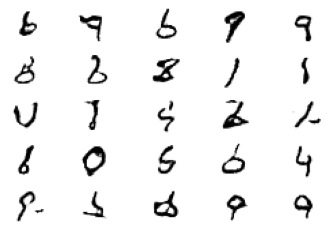

In [10]:
from keras.models import load_model
from numpy.random import randn 
from matplotlib import pyplot

def generate_latent_points(latent_dim, n_samples):
    x_input = randn(latent_dim*n_samples)
    x_input = x_input.reshape(n_samples, latent_dim)
    return x_input

def save_plot(examples,n):
    for i in range(n*n):
        pyplot.subplot(n,n,1+i)
        pyplot.axis('off')
        pyplot.imshow(examples[i,:,:,0], cmap='gray_r')
    pyplot.show()

model=load_model('generator_model_070.h5')
latent_points=generate_latent_points(100,25)
X = model.predict(latent_points)
save_plot(X,5)